# Problem Statement

It is a Regression Problem,in which need to predict Price of each homes(Target Feature) With 79 explanatory variables describing almost every aspect of residential homes.on basis of these variable's trained Machine Learning model with almost every Machine Leaning algorithm and tried to predicted the right price of House which helps to lots of customers to buy their dream house.

![](house.jpeg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
import os
os.chdir("G:\\kaggle data set\\house-prices-advanced-regression-techniques")

# Load Train Dataset

In [2]:
train = pd.read_csv("train.csv")
train = train.drop(["Id"],axis=1)
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# EDA

# Check Distribution of Target Feature

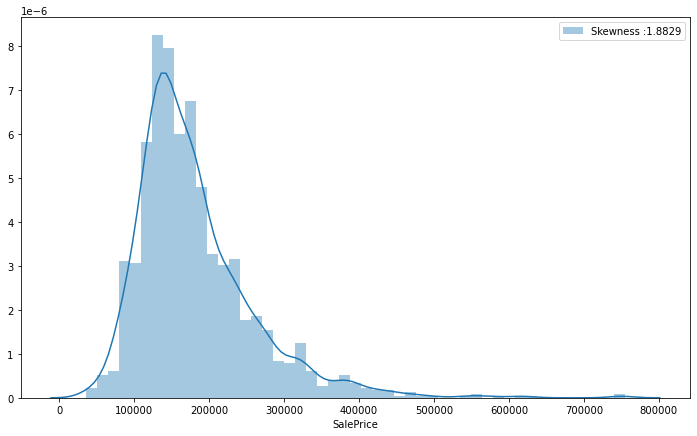

In [3]:
plt.figure(figsize=(12,7))
dist_target = sns.distplot(train["SalePrice"])
dist_target.legend(["Skewness :{:.4f}".format(train["SalePrice"].skew())])
plt.show()

In [4]:
# null values in train data for each columns:

nan_features = [features for features in train.columns if train[features].isnull().sum()>=1]
train[nan_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
# Percentage of null values in each NAN Columns
train[nan_features].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [6]:
# Featutes Information like(Dtype and Number of non null counts) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#All Numericals Features

numerical_features = train.select_dtypes(include=["float64","int64"])
numerical_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3         836   


In [8]:
#All categorical Features.

categorical_features = train.select_dtypes(include=["object"])
categorical_features

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex

In [9]:
# Name of those feature's having Yearly Data.
year_feature_names = [feature for feature in numerical_features if "Yr" in feature or "Year" in feature]
year_feature_names

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

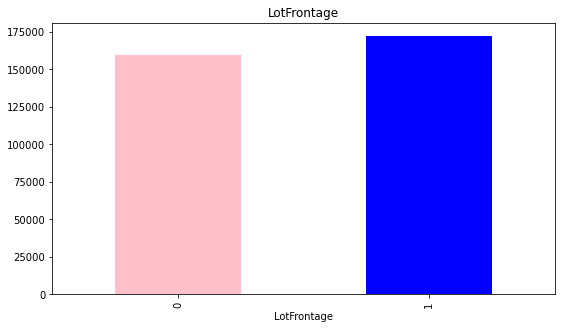

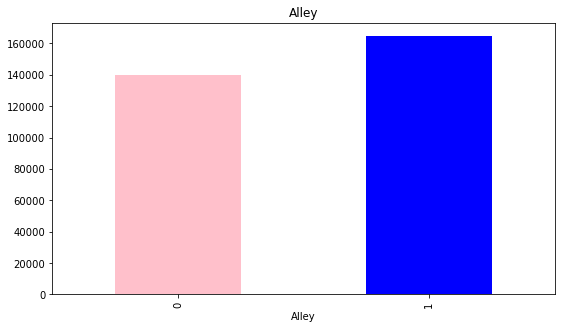

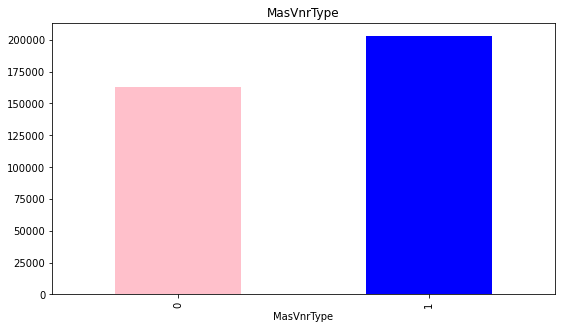

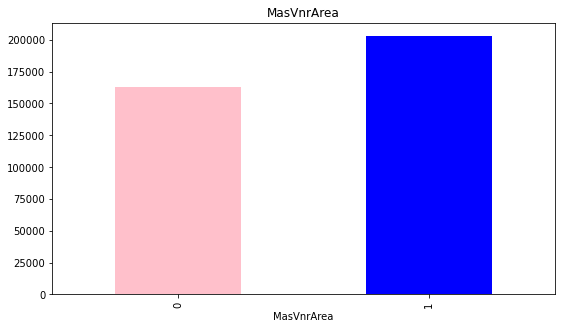

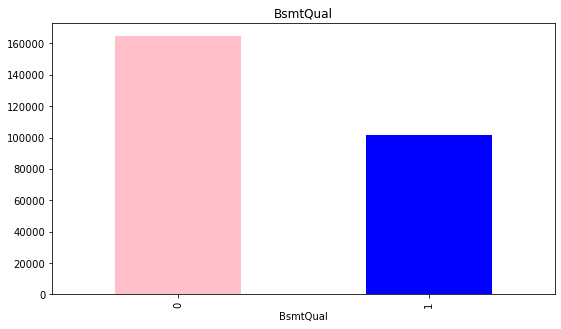

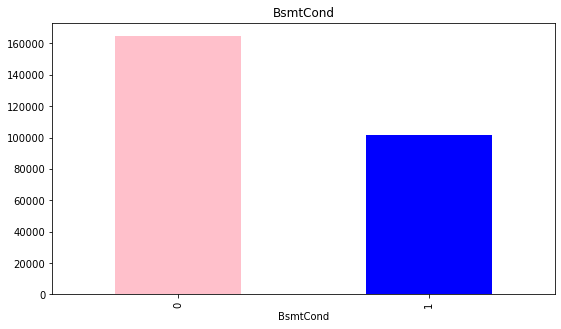

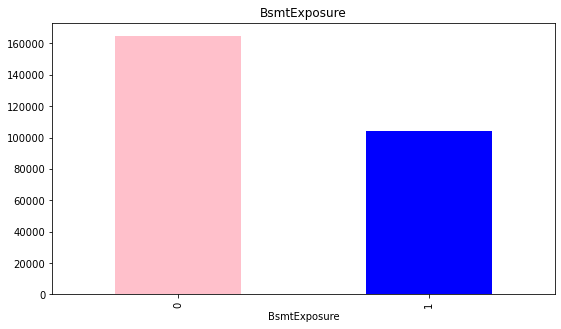

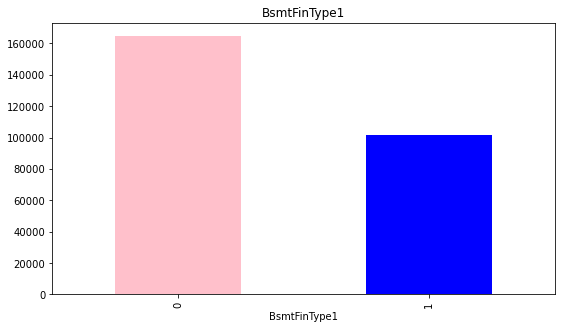

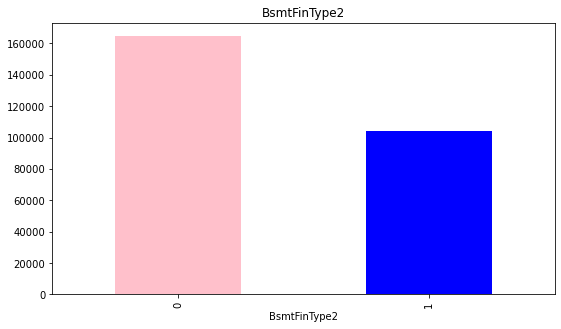

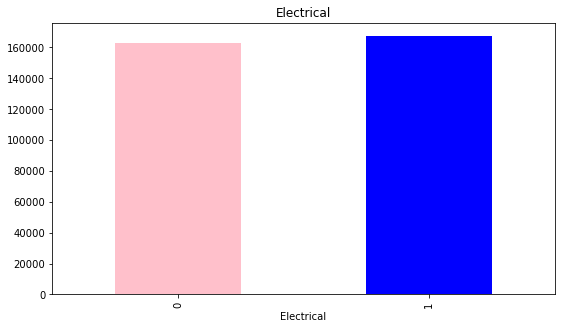

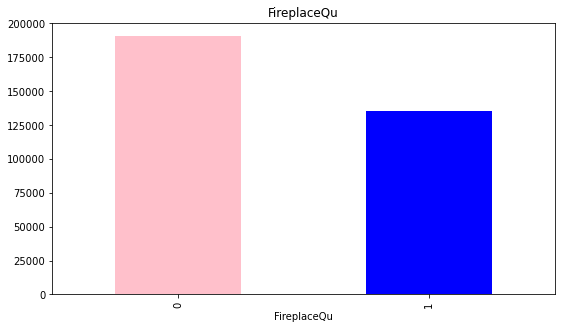

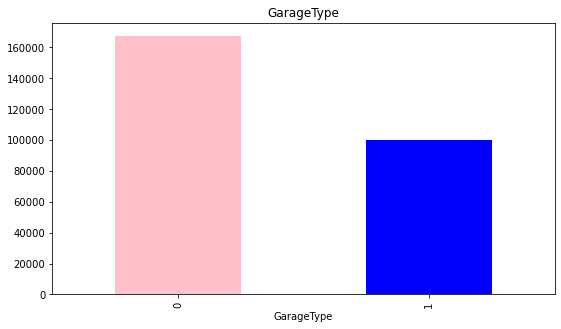

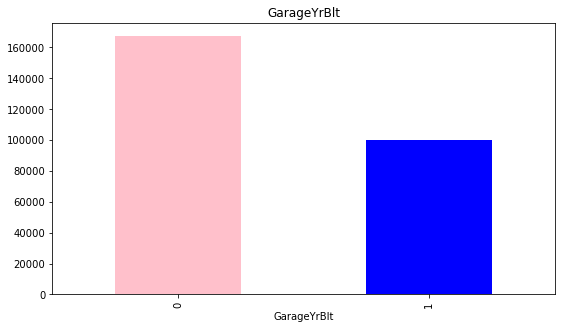

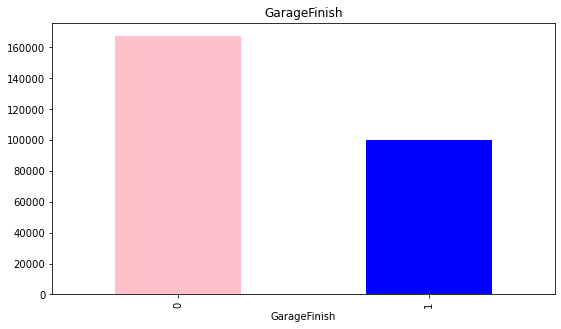

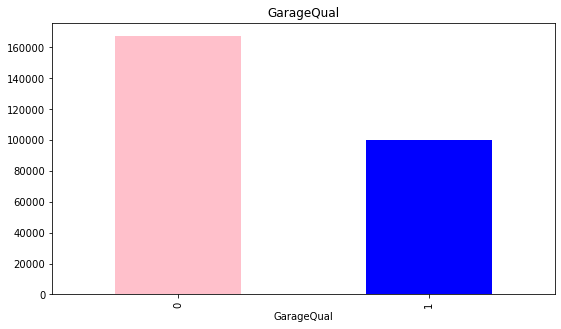

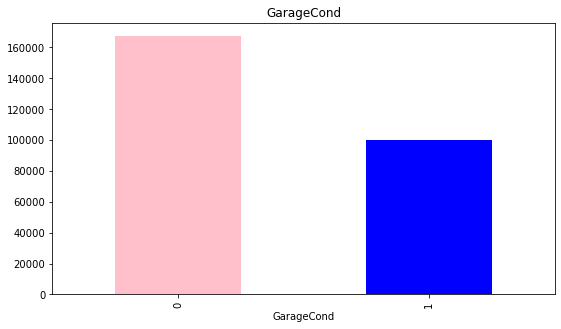

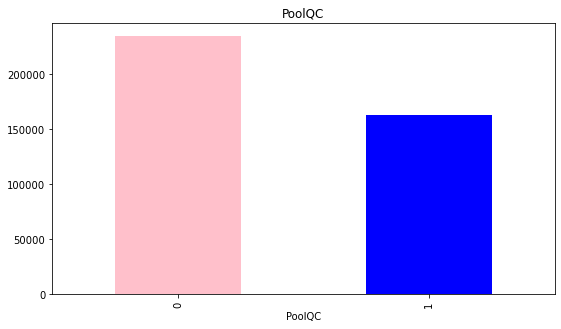

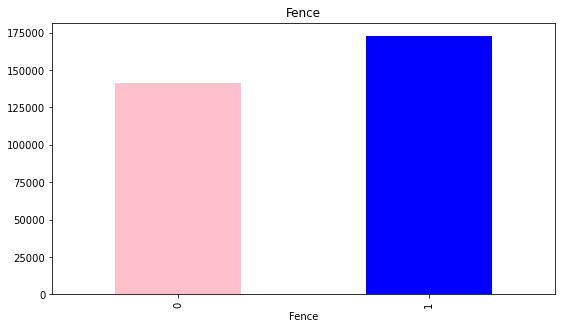

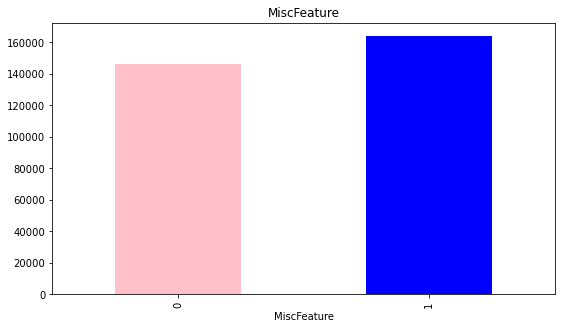

In [10]:
# Check NAN Values are important for Target Feature.

train_copy = train.copy()

for feature in nan_features:
    train_copy[feature] = np.where(train_copy[feature].isnull(),1,0)
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["pink","b"],figsize=(9,5))
    plt.title(feature)
    plt.show()

From Graph's it's Clearly visible that missing value has also Impact on Dependent variable,so we need to replace these nan value with something meaningfull.

In [11]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


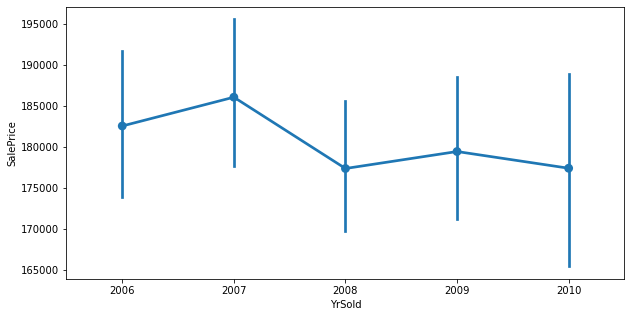

In [12]:
# Sale Price range from min to max according to year.
plt.figure(figsize=(10,5))
sns.pointplot(train["YrSold"],train["SalePrice"])

one of the 2007 Sold House Sale's Price was Highest in all 5 years of Data and 2010 had highest range of Sale's Price.

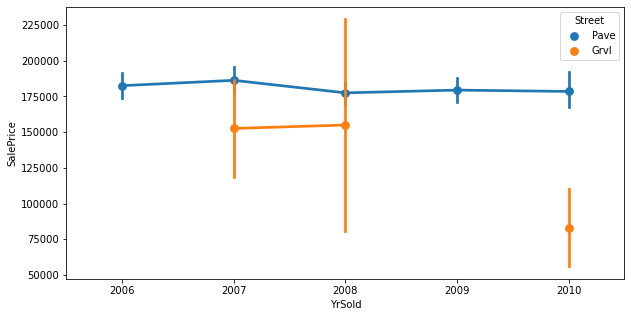

In [13]:
# Sale Price range from min to max in every year with Street
plt.figure(figsize=(10,5))
sns.pointplot(train["YrSold"],train["SalePrice"],hue=train["Street"])

from upper graph it's clear that Pavel Street Sale Price range aren't varying so much, But in Gravel Street Sale's Price are varying.

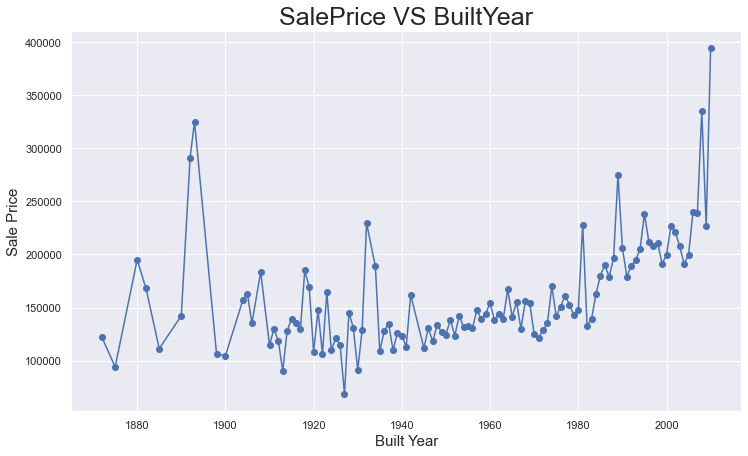

In [14]:
# Average SalePrice in Every Built Year.

sns.set(style='darkgrid')
plt.figure(figsize=(12,7))
plt.plot(train_copy.groupby("YearBuilt")["SalePrice"].median(),marker="o")
plt.title("SalePrice VS BuiltYear",fontsize=25)
plt.xlabel("Built Year",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)
plt.show()

from upper graph it's clear that if House is newly Built than the chance is to get high sale price

Text(0, 0.5, 'SalePrice')

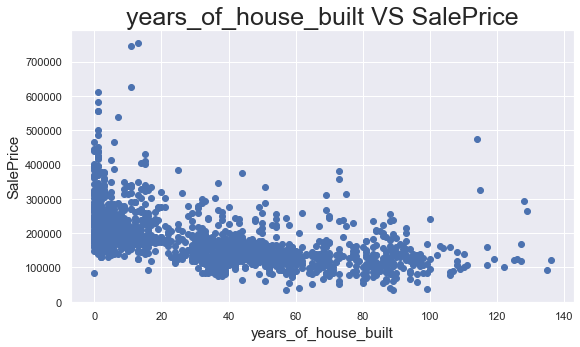

In [15]:
# Graph between years_of_house_built at the year of Sold and SalePrice.


train_copy["years_of_house_built"] = train_copy["YrSold"]-train_copy["YearBuilt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_house_built"],train_copy["SalePrice"])
plt.title("years_of_house_built VS SalePrice",fontsize=25)
plt.xlabel("years_of_house_built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)

from upper graph can see that if house is 0 to 20 year old than the price of sale's is very high

Text(0, 0.5, 'SalePrice')

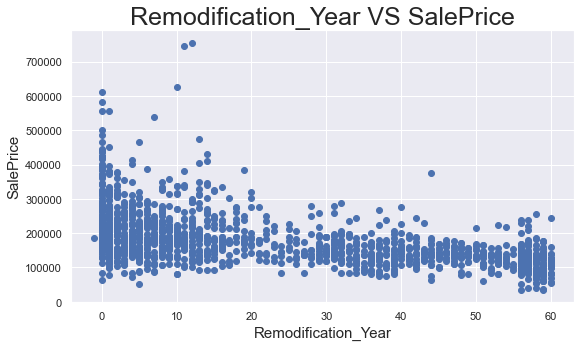

In [16]:
# Graph between years_of_Remodification at the year of Sold  and SalePrice.

train_copy["years_of_RemodAdd"] = train_copy["YrSold"]-train_copy["YearRemodAdd"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_RemodAdd"],train_copy["SalePrice"])
plt.title("Remodification_Year VS SalePrice",fontsize=25)
plt.xlabel("Remodification_Year",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


from upper graph it's clear that if Number of Remodification year is less tham 15 year's than the saling price's also High.

Text(0, 0.5, 'SalePrice')

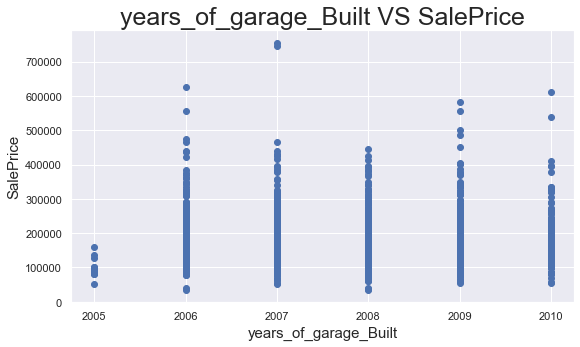

In [17]:
# Graph between years_of_garage_Built at the year of Sold  and SalePrice.

train_copy["years_of_garage_Built"] = train_copy["YrSold"]-train_copy["GarageYrBlt"]

sns.set(style='darkgrid')
plt.figure(figsize=(9,5))
plt.scatter(train_copy["years_of_garage_Built"],train_copy["SalePrice"])
plt.title("years_of_garage_Built VS SalePrice",fontsize=25)
plt.xlabel("years_of_garage_Built",fontsize=15)
plt.ylabel("SalePrice",fontsize=15)


In which year garage was built it's not impacting so much the Price of sale.

In [18]:
# taking those feature's having the unique value less than 25 in continuous feature.

discrete_features = [feature for feature in numerical_features if len(train[feature].unique())<25]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

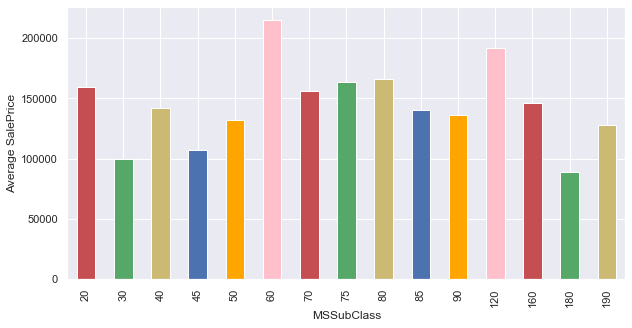

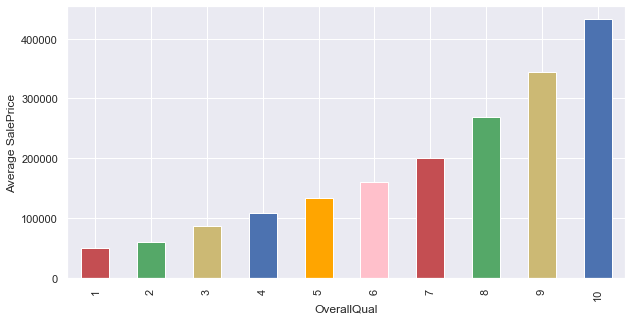

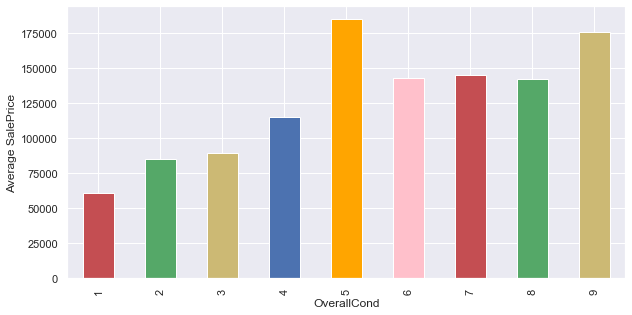

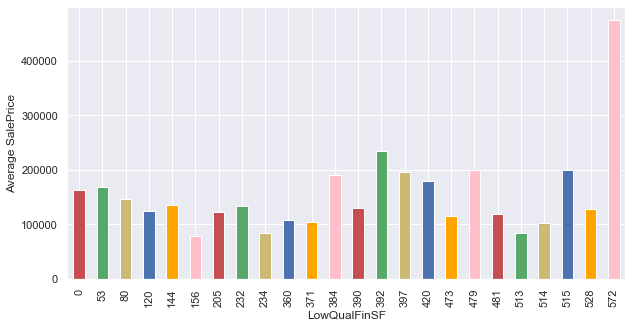

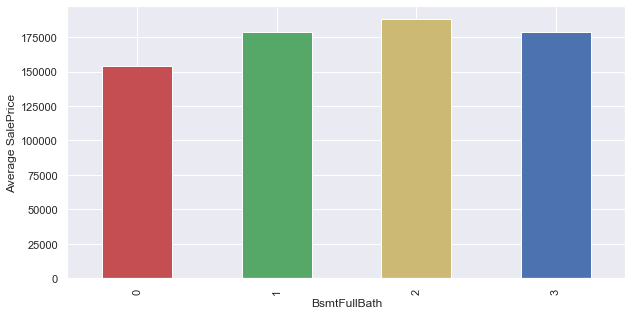

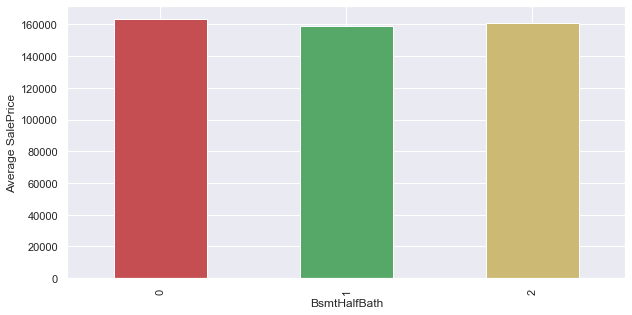

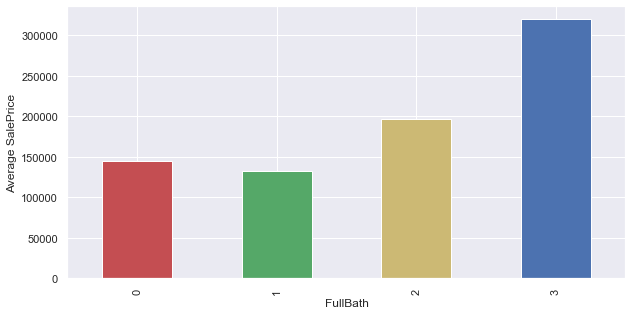

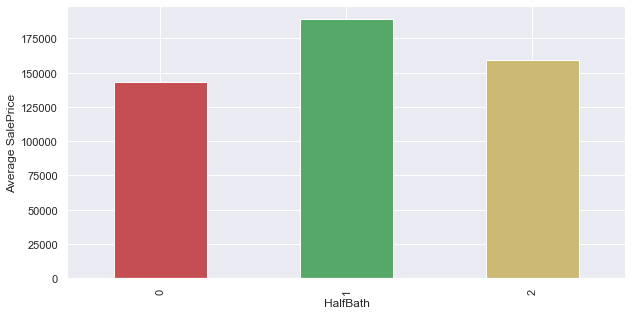

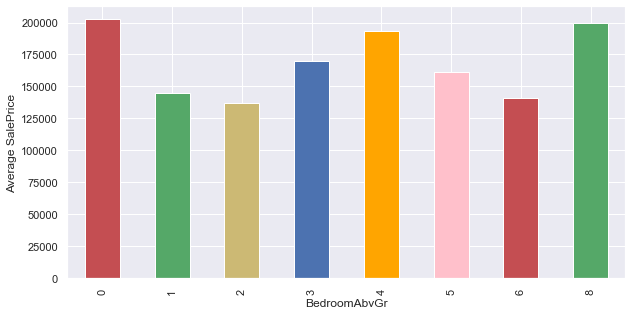

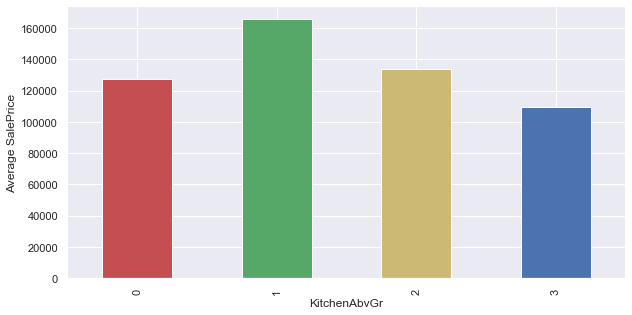

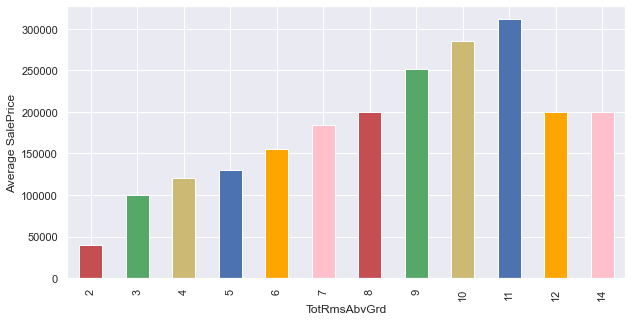

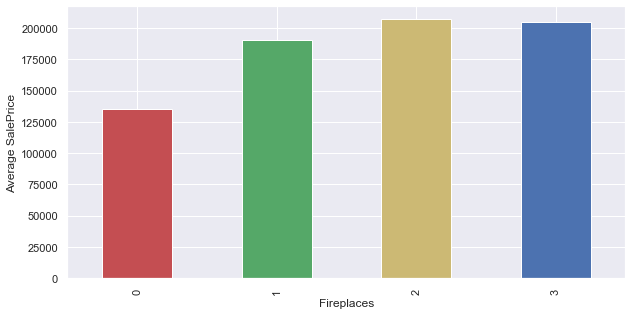

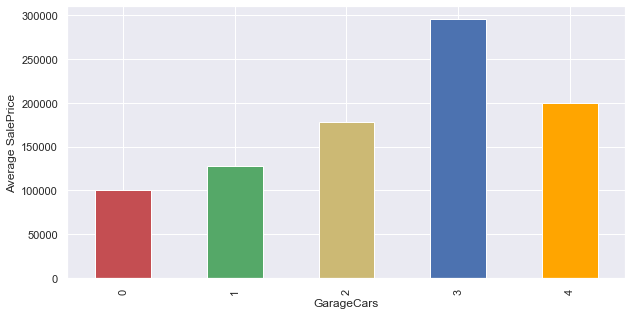

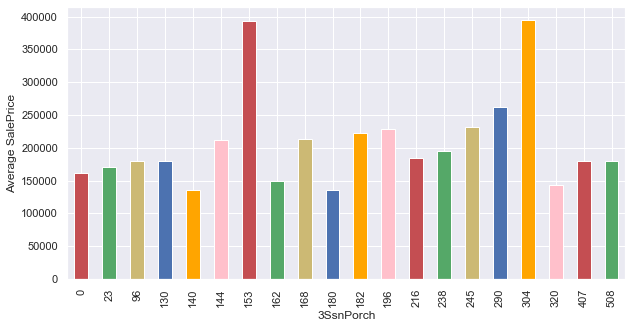

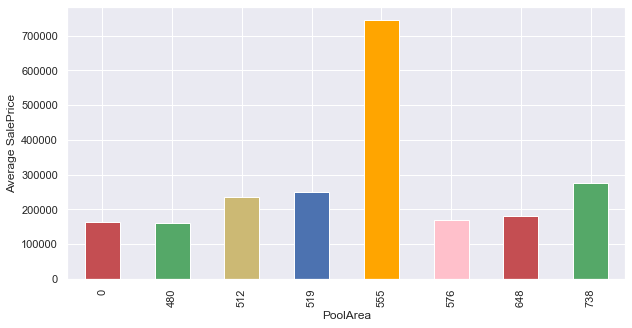

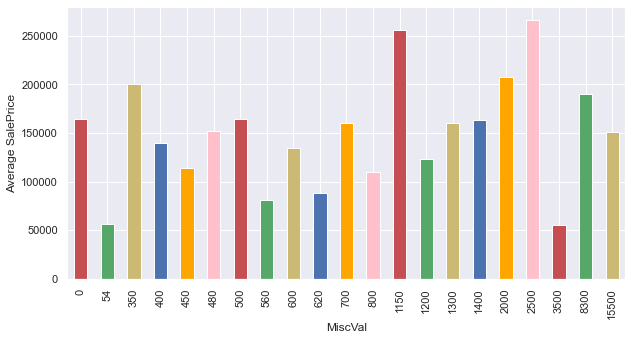

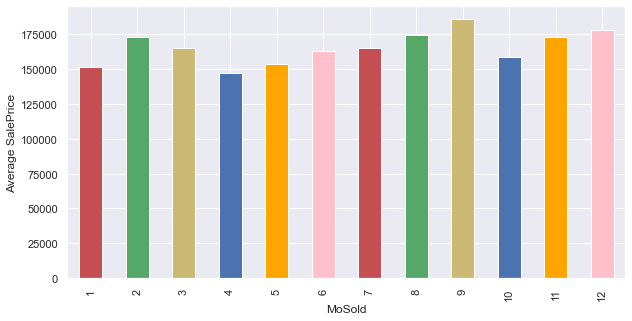

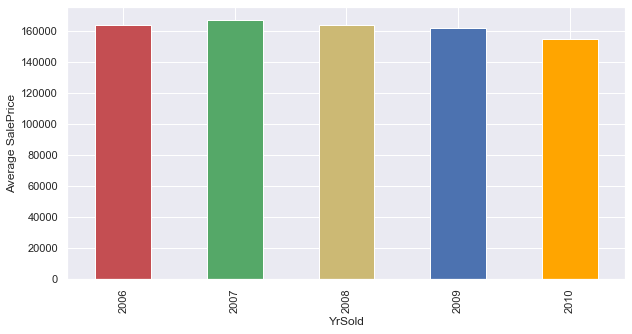

In [19]:
# Make bar chart of discrete features and try to get some information.

for feature in discrete_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].median().plot.bar(color=["r","g","y","b","orange","pink"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average SalePrice")
    plt.show()
    

1- from upper graph one thing is clear if Overall Quality is increasing from 1 to 10 than Price of House also Increasing.

2- if full Bathrooms are 3 than Price's also High.

3- In Total rooms above grade feature house price is increasing from 2 to 11 Grade but grade 12 and 14 aren't impacting the sales Price so much in comparision of 9,10,11 grade.

4- if fire places are 2 or 3 both are impacting the Price equally more Fire places doesn't mean that they would give higher sale price.

5- if garage are three price is also high but more than 3 garge aren't giving high sale prices.

In [20]:
#check how many of unique values are present in categorical features.
for feature in categorical_features:
    print(feature,":",len(train[feature].unique()),"unique values")

MSZoning : 5 unique values
Street : 2 unique values
Alley : 3 unique values
LotShape : 4 unique values
LandContour : 4 unique values
Utilities : 2 unique values
LotConfig : 5 unique values
LandSlope : 3 unique values
Neighborhood : 25 unique values
Condition1 : 9 unique values
Condition2 : 8 unique values
BldgType : 5 unique values
HouseStyle : 8 unique values
RoofStyle : 6 unique values
RoofMatl : 8 unique values
Exterior1st : 15 unique values
Exterior2nd : 16 unique values
MasVnrType : 5 unique values
ExterQual : 4 unique values
ExterCond : 5 unique values
Foundation : 6 unique values
BsmtQual : 5 unique values
BsmtCond : 5 unique values
BsmtExposure : 5 unique values
BsmtFinType1 : 7 unique values
BsmtFinType2 : 7 unique values
Heating : 6 unique values
HeatingQC : 5 unique values
CentralAir : 2 unique values
Electrical : 6 unique values
KitchenQual : 4 unique values
Functional : 7 unique values
FireplaceQu : 6 unique values
GarageType : 7 unique values
GarageFinish : 4 unique value

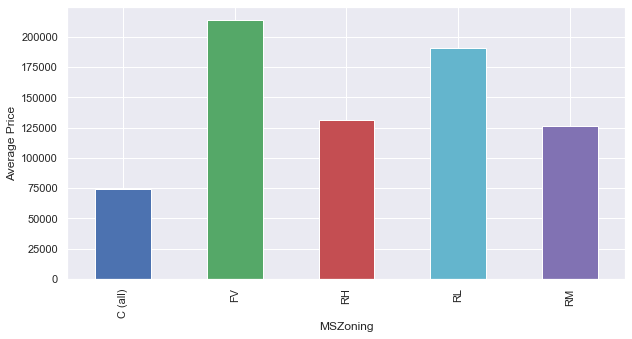

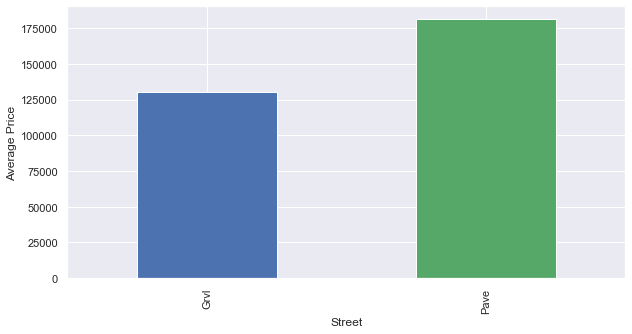

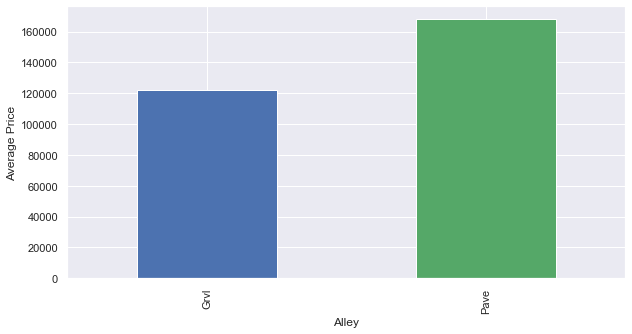

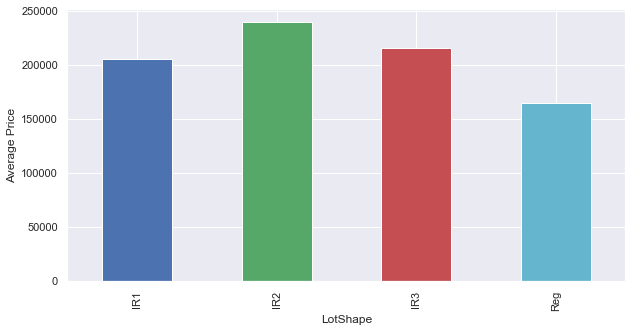

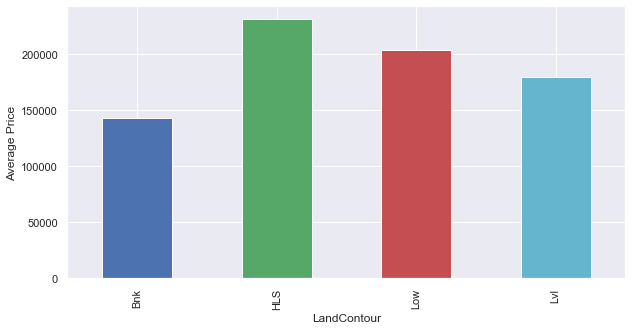

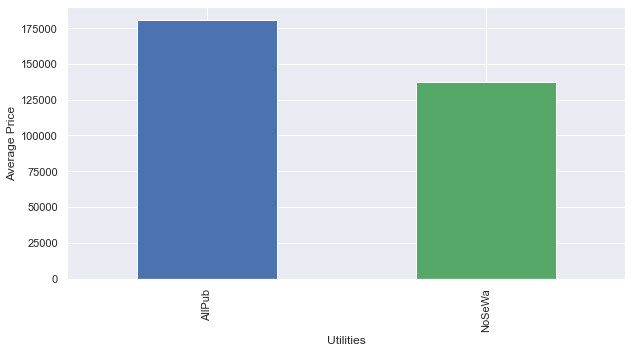

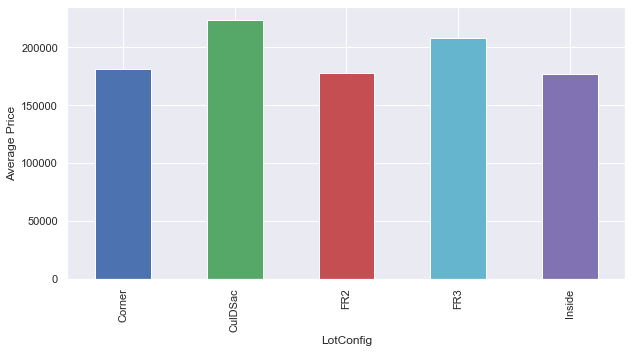

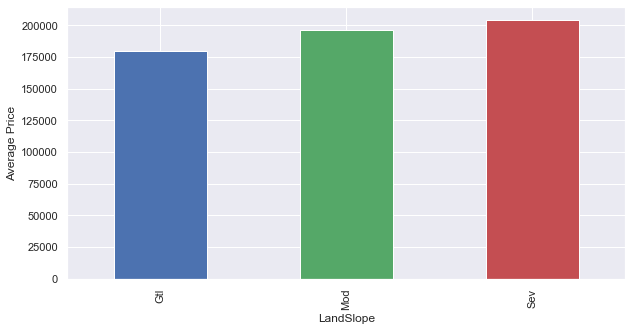

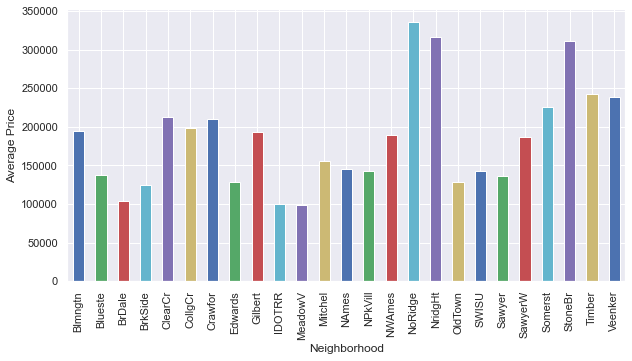

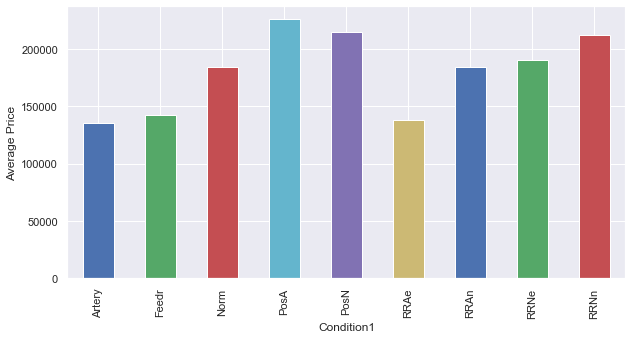

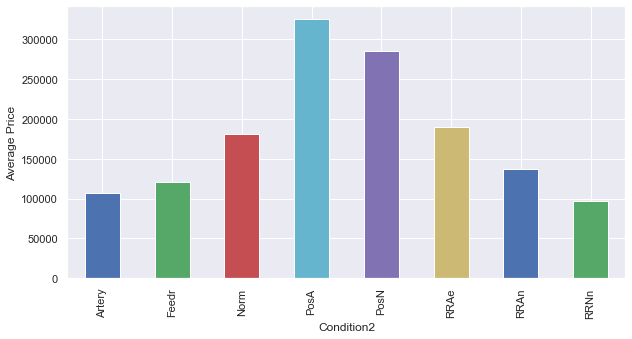

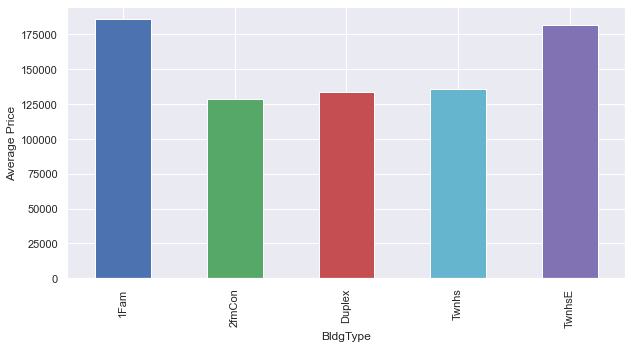

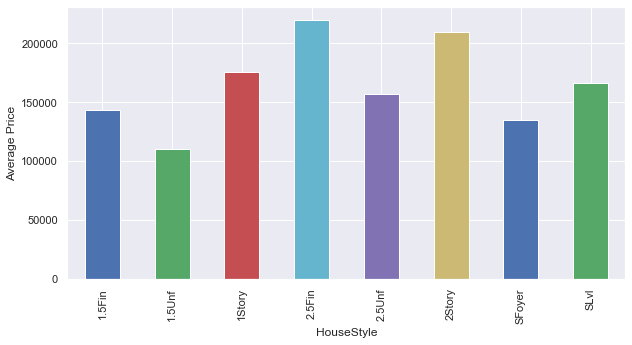

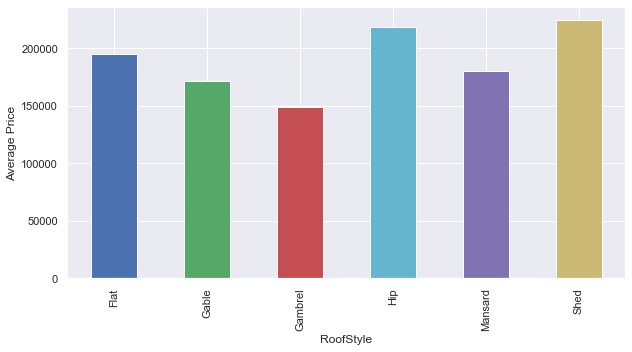

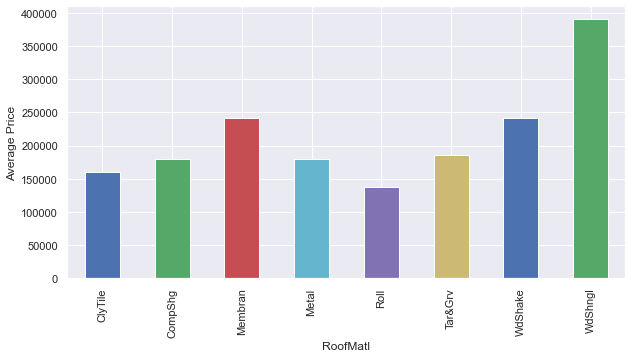

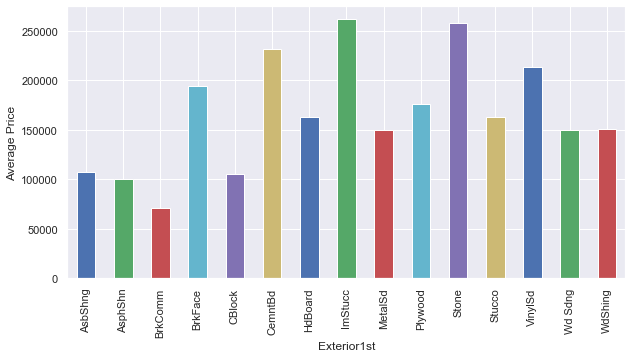

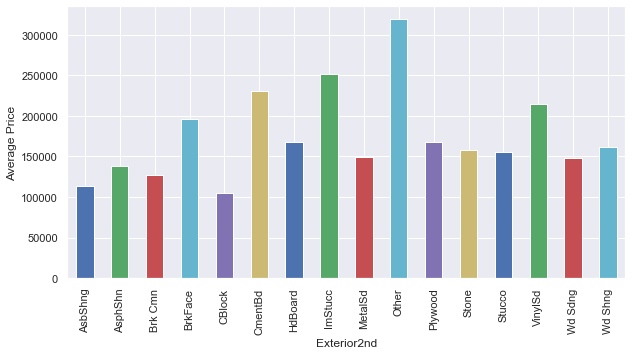

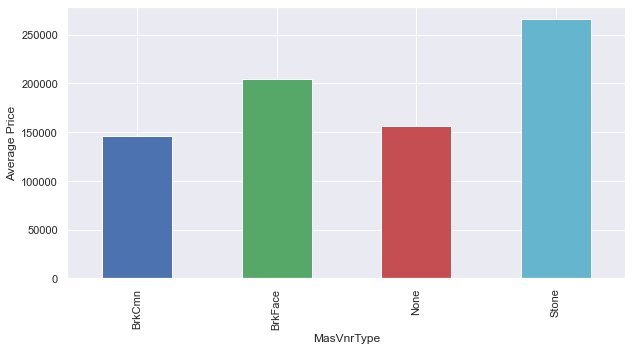

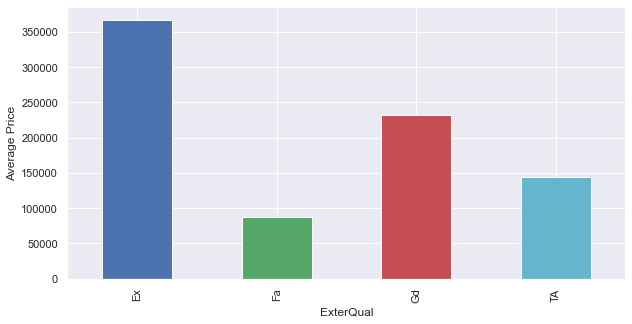

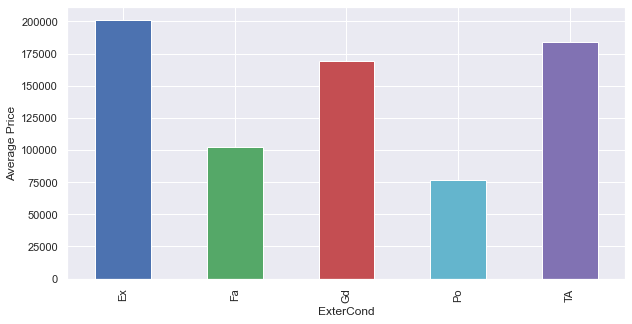

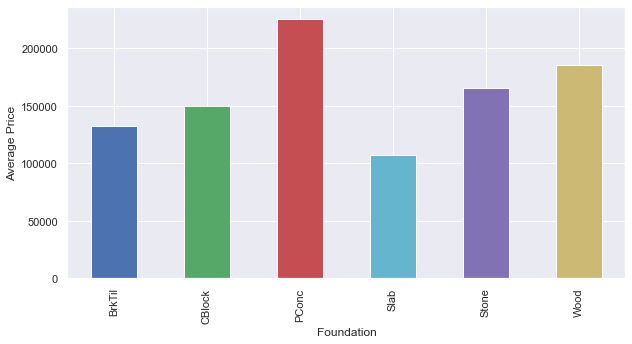

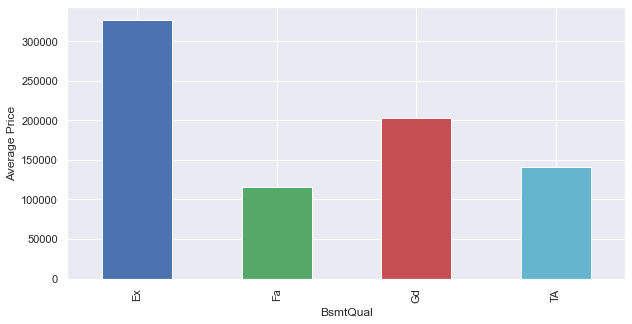

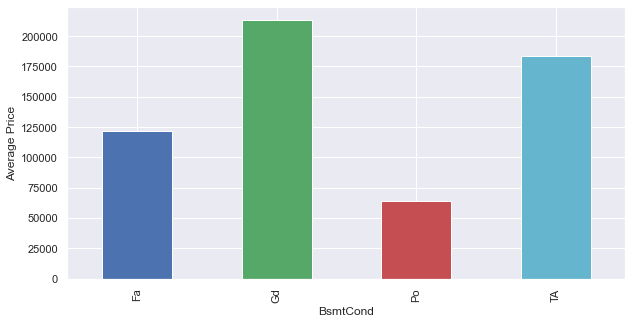

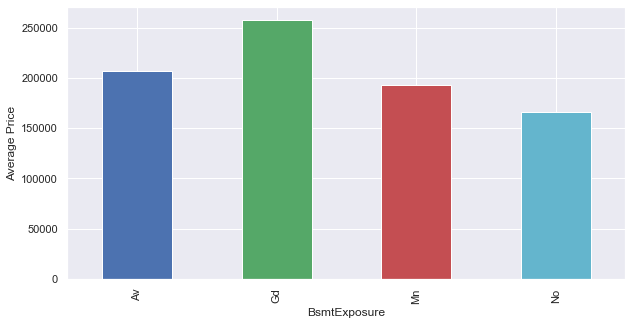

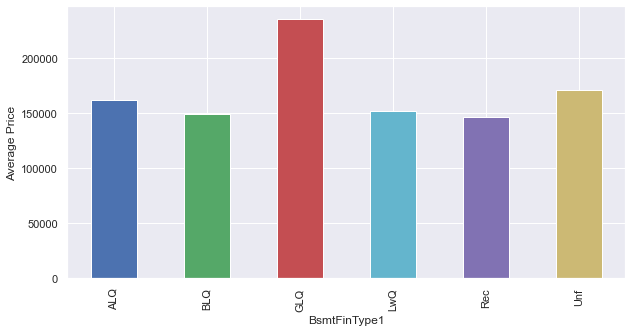

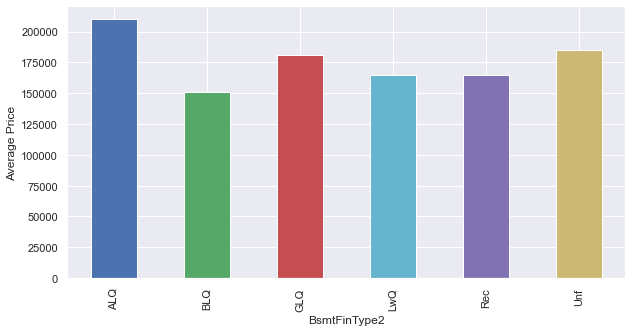

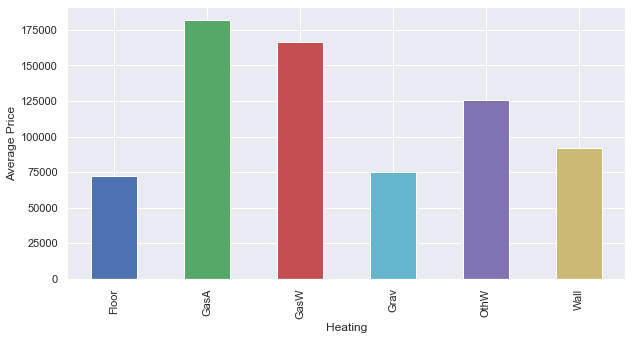

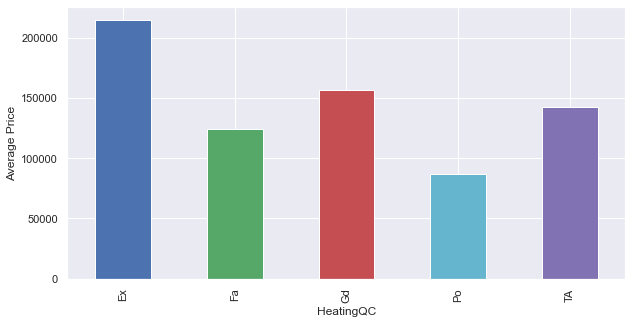

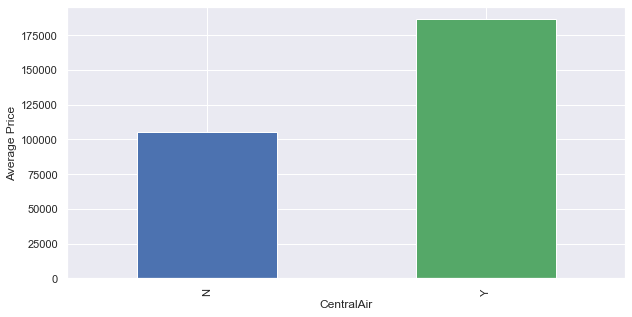

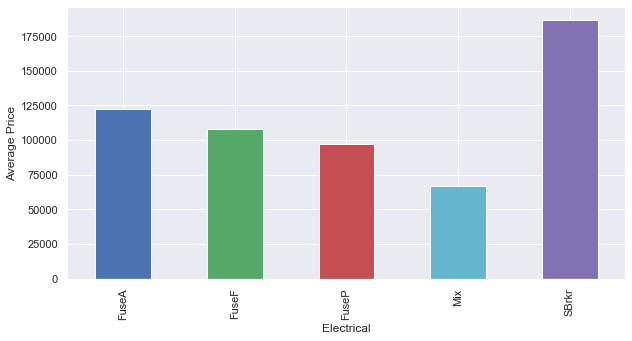

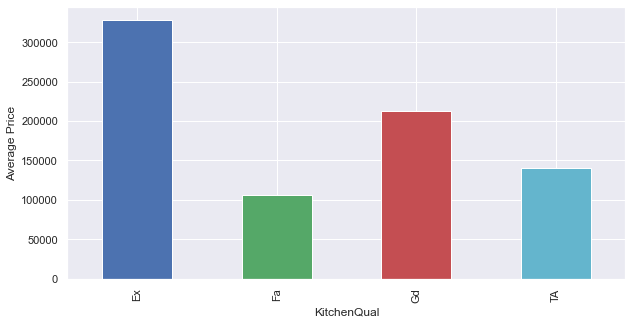

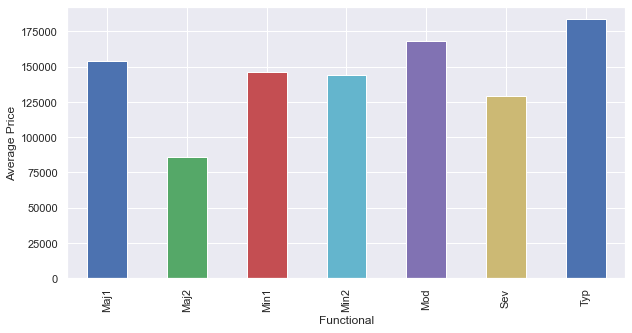

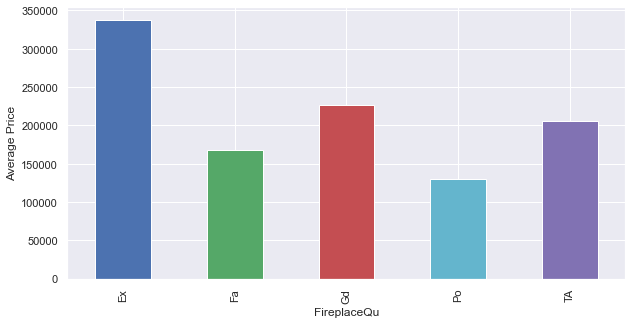

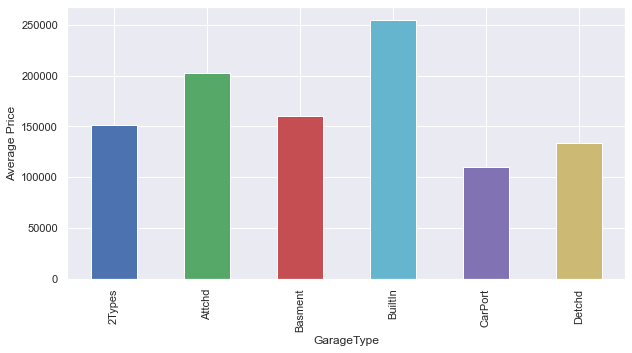

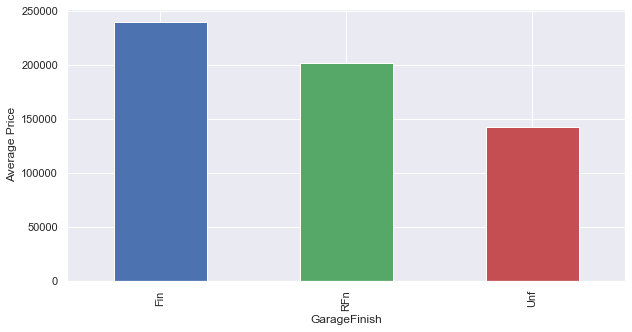

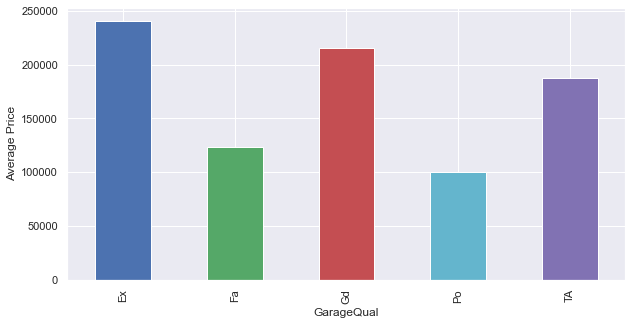

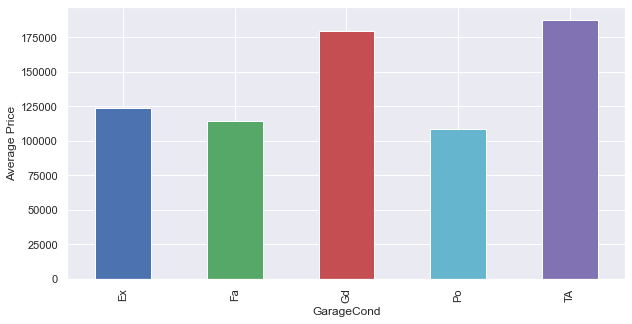

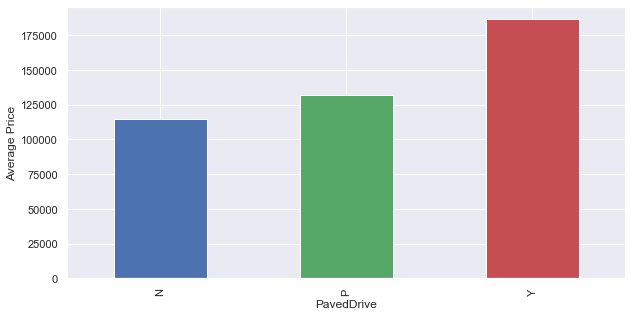

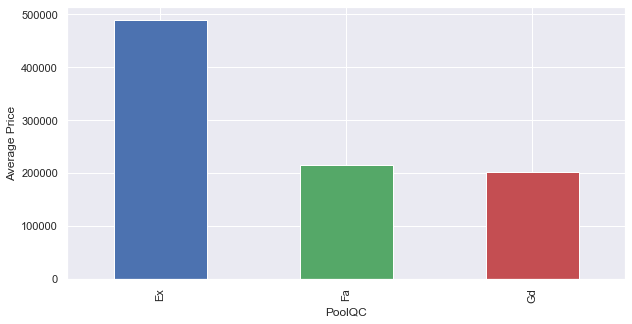

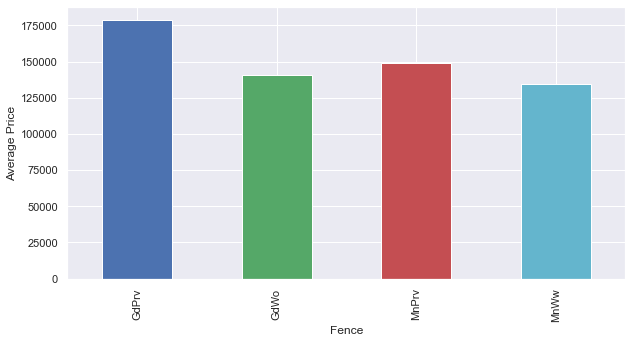

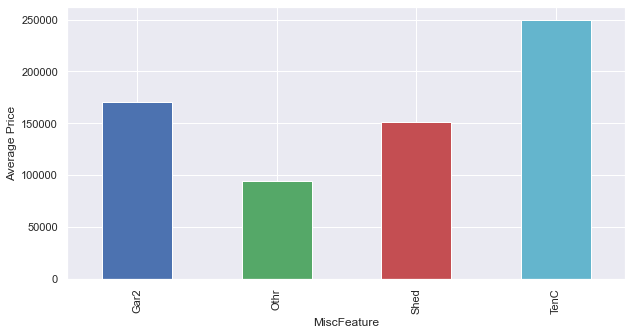

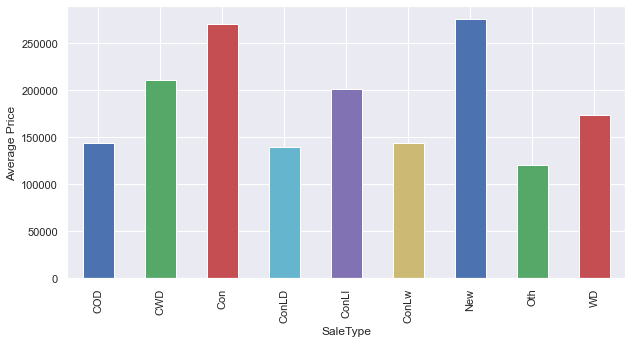

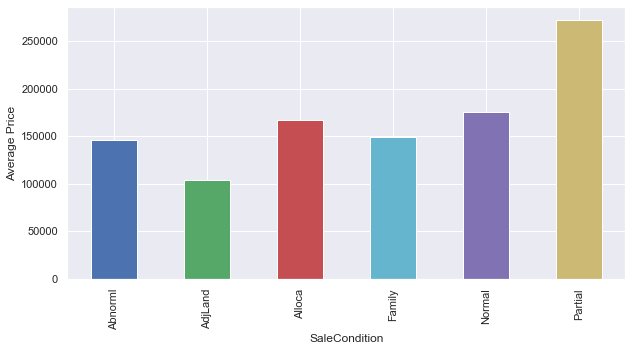

In [21]:
for feature in categorical_features:
    train_copy = train.copy()
    train_copy.groupby(feature)["SalePrice"].mean().plot.bar(color=["b","g","r","c","m","y"],figsize=(10,5))
    plt.xlabel(feature)
    plt.ylabel("Average Price")
    plt.show()

1- from upper graph Floating Village Residential Zoning showing the Highest Selling Price it could be because Floating Residential are very expensive,Residential Low Density zoning showing 2nd Highest Price.

2- If all Type of utilities are available than Average Price is also High.

3- If Stone is used in Masonry than price is also high in comparison of Brick Common,Brick Face and Cinder Block.

4- from graph it's clear that if Exterior Quality is excellent than the House Price is also High.
5- If Central Air is also Available than the Price is also High.

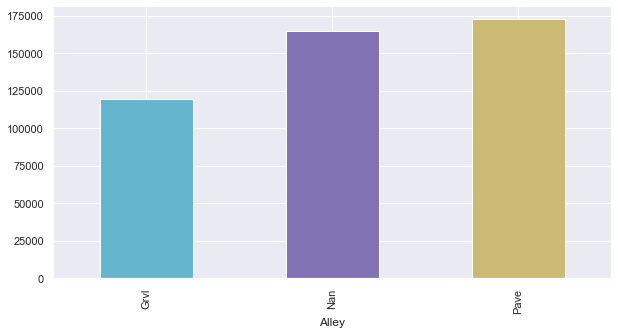

In [22]:
train_copy = train.copy()

train_copy["Alley"] = train_copy["Alley"].fillna("Nan")


train_copy.groupby("Alley")["SalePrice"].median().plot.bar(color=["c","m","y"],figsize=(10,5))

# Bivariate Analysis

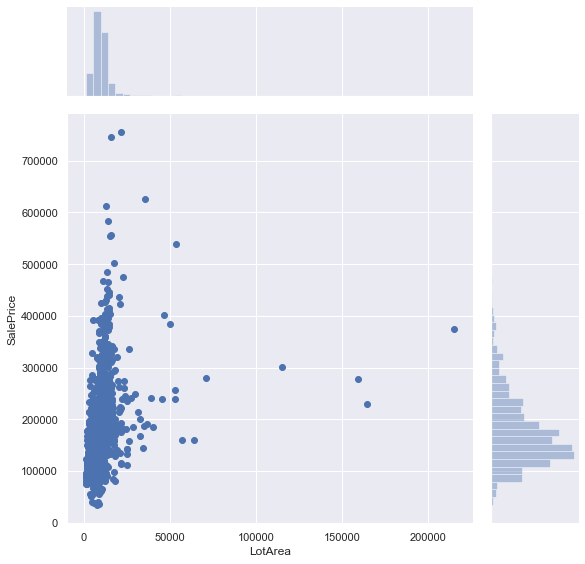

In [23]:
# scatter and histogram between LotArea and SalePrice
sns.jointplot(train["LotArea"],train["SalePrice"],ratio=4,height=8)

if LotArea is Greater it's not mean Sale Price would also be High. and almost all data lieing between 0 to 50000 squarefeet LotArea

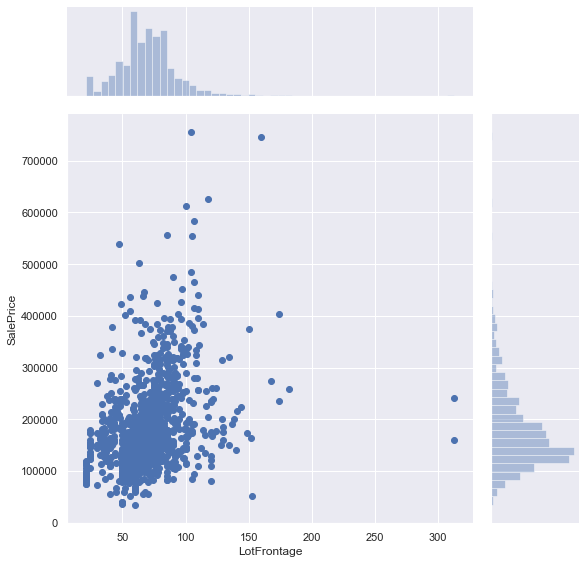

In [24]:
# scatter and histogram between LotFrontage and SalePrice
sns.jointplot(train["LotFrontage"],train["SalePrice"],ratio=4,height=8)

Mostly all records from LotFrontage are 0 to 150 feet, Big Lot Frontage area not impacting so much the Price.

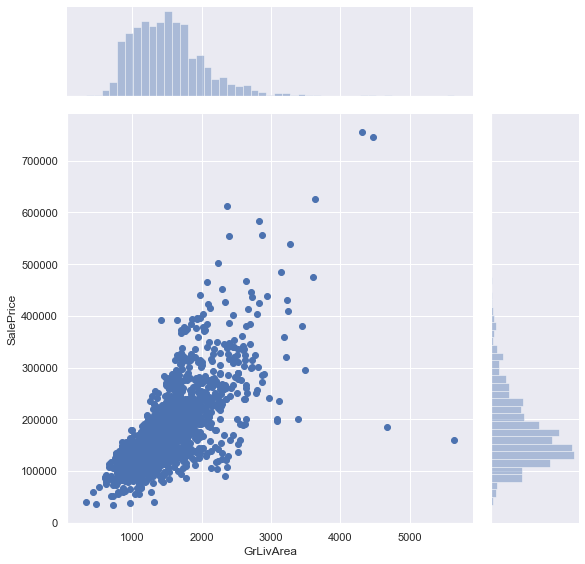

In [25]:
# scatter and histogram between LotFrontage and SalePrice
sns.jointplot(train["GrLivArea"],train["SalePrice"],ratio=4,height=8)

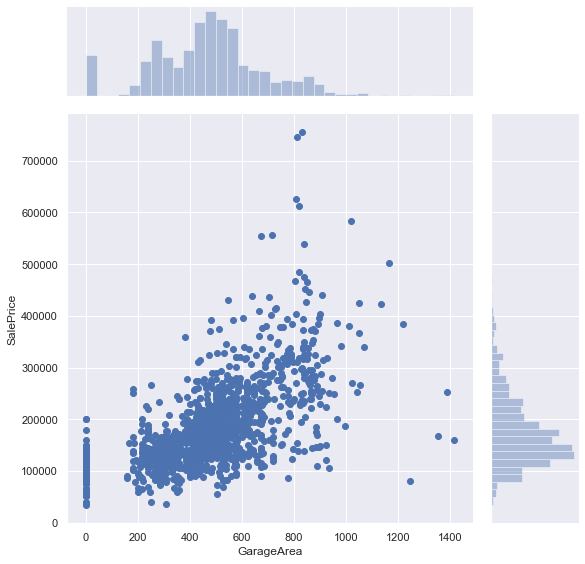

In [26]:
# scatter and histogram between GarageArea and SalePrice
sns.jointplot(train["GarageArea"],train["SalePrice"],ratio=4,height=8)

Some Hosue's don't have Garage Area instead of that the Price is similar to some of those have Garage Area.

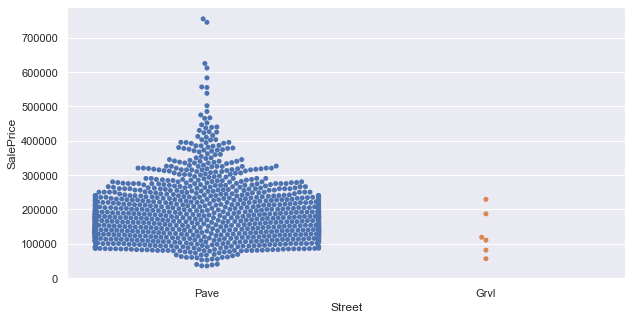

In [27]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["Street"],train["SalePrice"])
# Mostly records are from Paved category and from Garvel category 6 records.

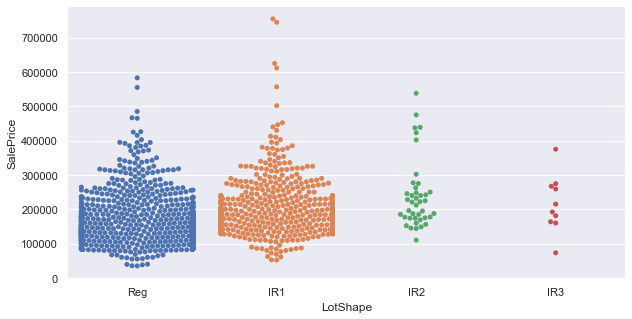

In [28]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LotShape"],train["SalePrice"])
# Mostly of the records in LotShape are from Regular and Slightly Regulary category and Slightly Regulary category has the Highest Sale's Price

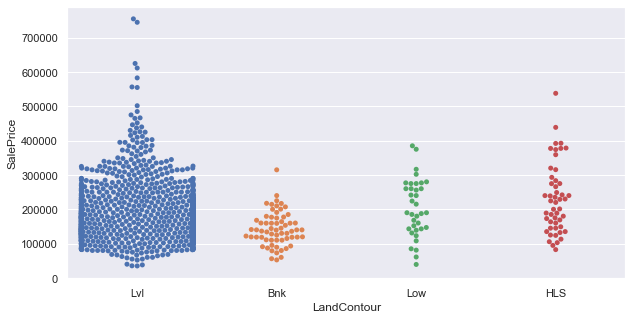

In [29]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LandContour"],train["SalePrice"])
# Mostly of the records in LandContour are from Level category and Level category has highest Sale's Price.

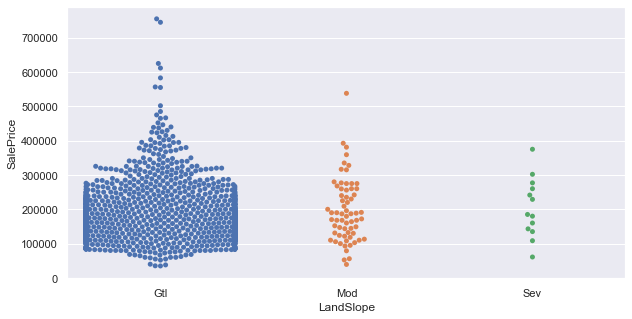

In [30]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["LandSlope"],train["SalePrice"])
# with severe Slope Sale's Price is low, 

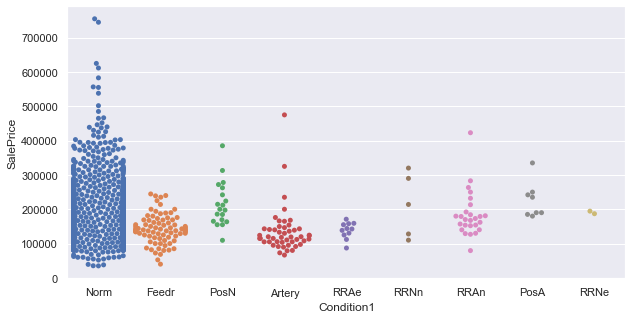

In [31]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["Condition1"],train["SalePrice"])
# Mostly of the records in Condition1 are from Normal category and At Normal Condition Sale Price is low.

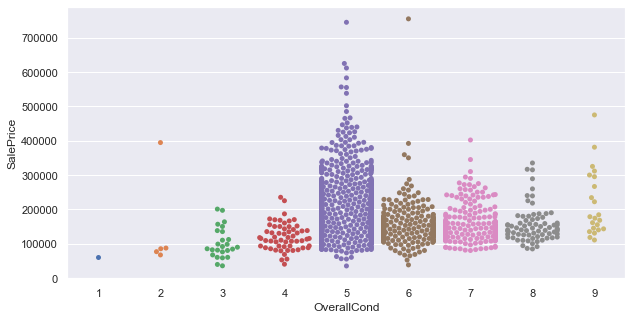

In [32]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["OverallCond"],train["SalePrice"])
# Mostly of the records in OverallCond are from 5th Overall Condition category and as Overall Condition is increasing minimum  Sale's Price also increseing. 

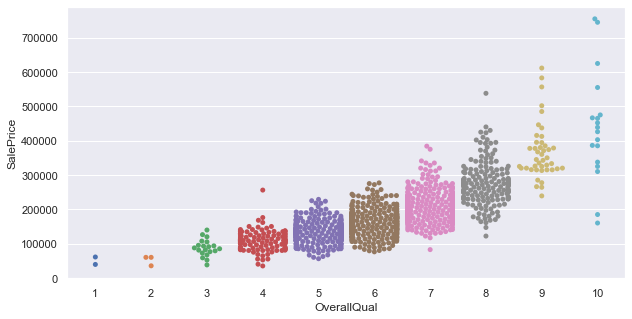

In [33]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["OverallQual"],train["SalePrice"])

# Mostly House's are from 5th to 8th Overall Quality and can see exponentially growth in Sale's Price as Overall Quality increasing.

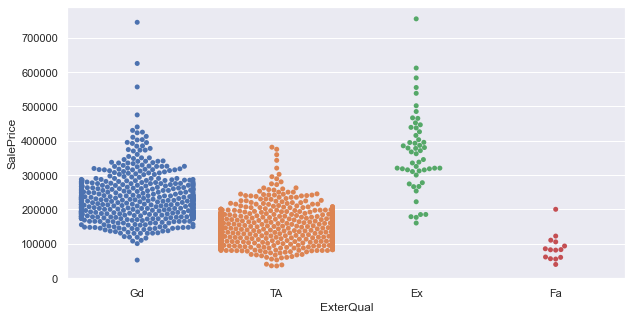

In [34]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["ExterQual"],train["SalePrice"])

# Mostly House's are from Good and Average Exterior Quality and can see with Good and Excellent Exterior Quality House's have a High Sales Price.

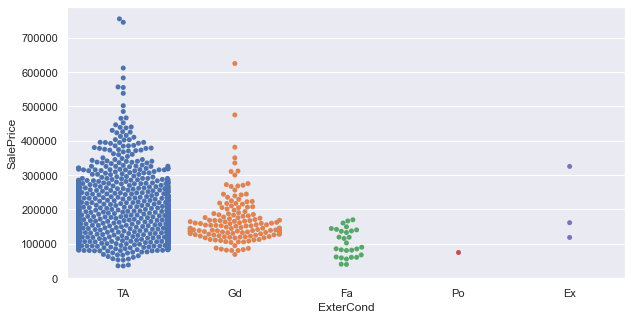

In [35]:
plt.figure(figsize=(10,5))
sns.swarmplot(train["ExterCond"],train["SalePrice"])

# Mostly House's are from Average Exterior Condition and can see Excelent Exterior Condition not having the High Sale's Price.

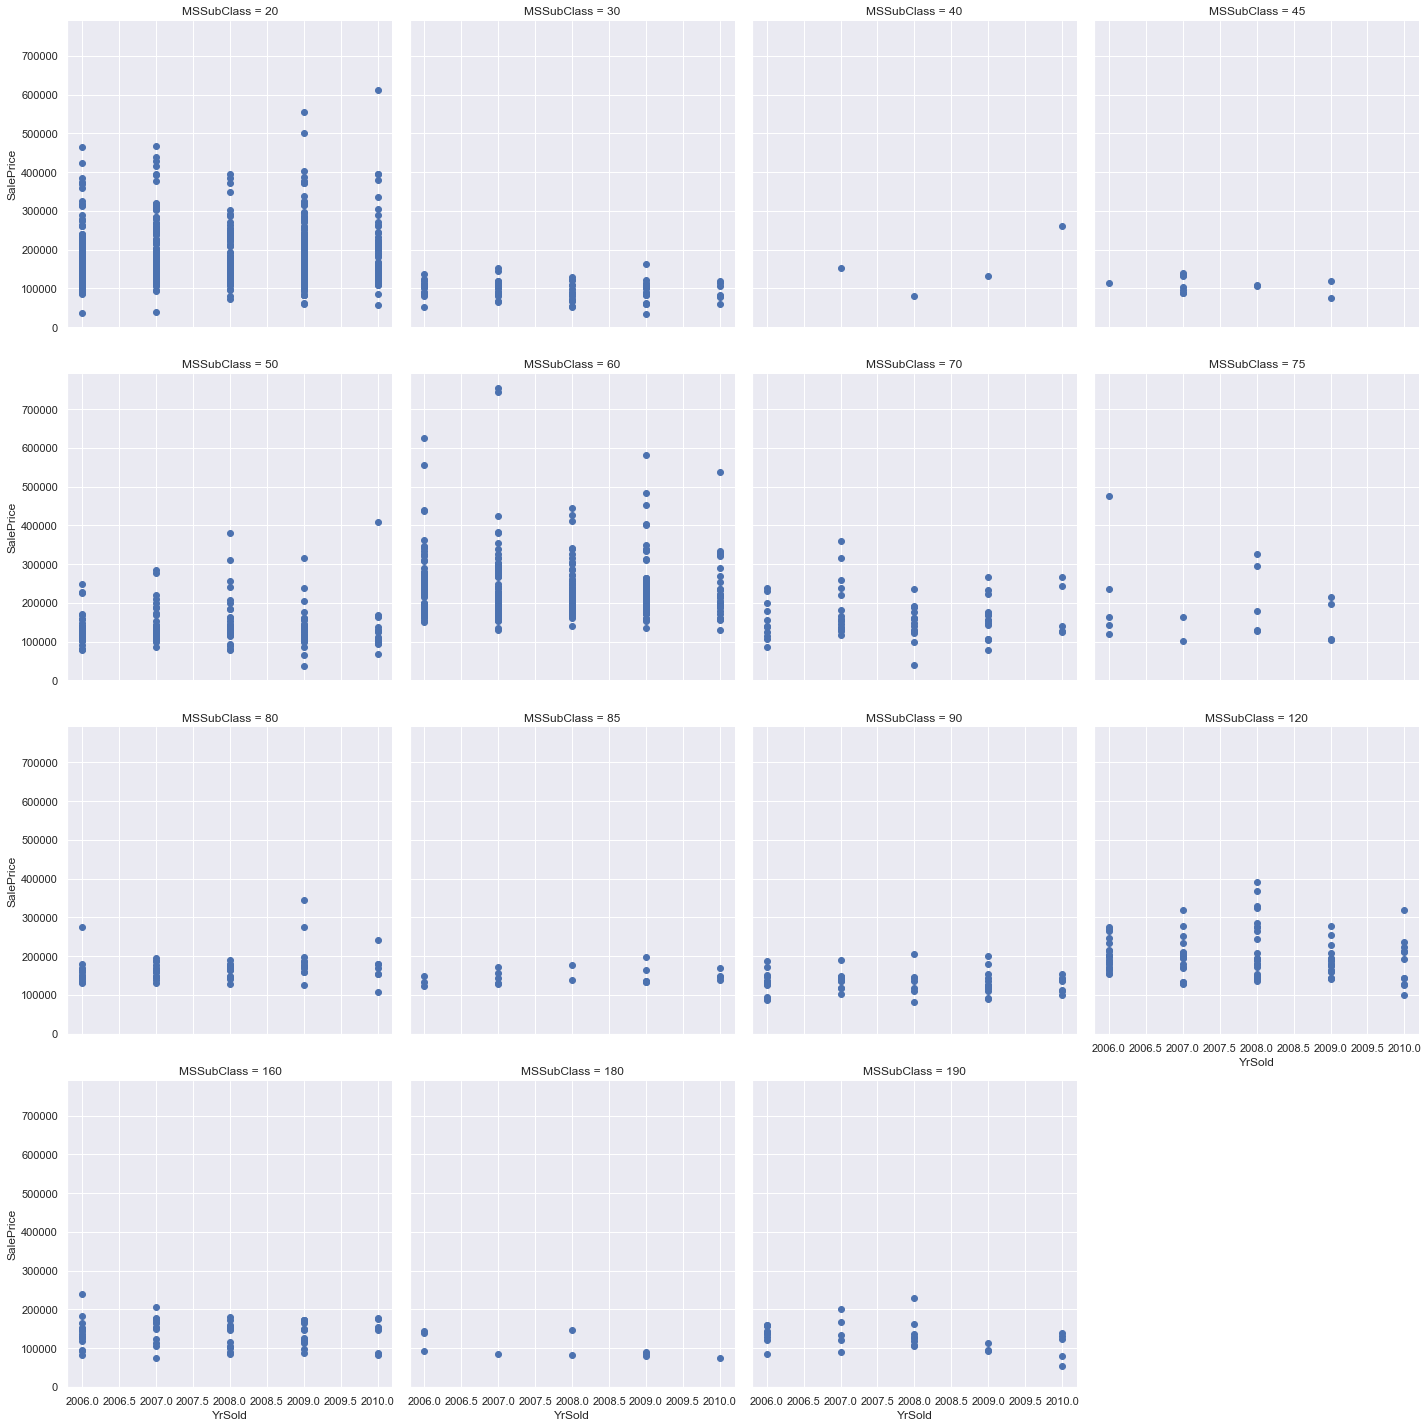

In [36]:
#Check Sale Price for MSSubClass in every year
fg = sns.FacetGrid(train,col="MSSubClass",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

At MSSubClass 20 and 60 Sales Price are High.

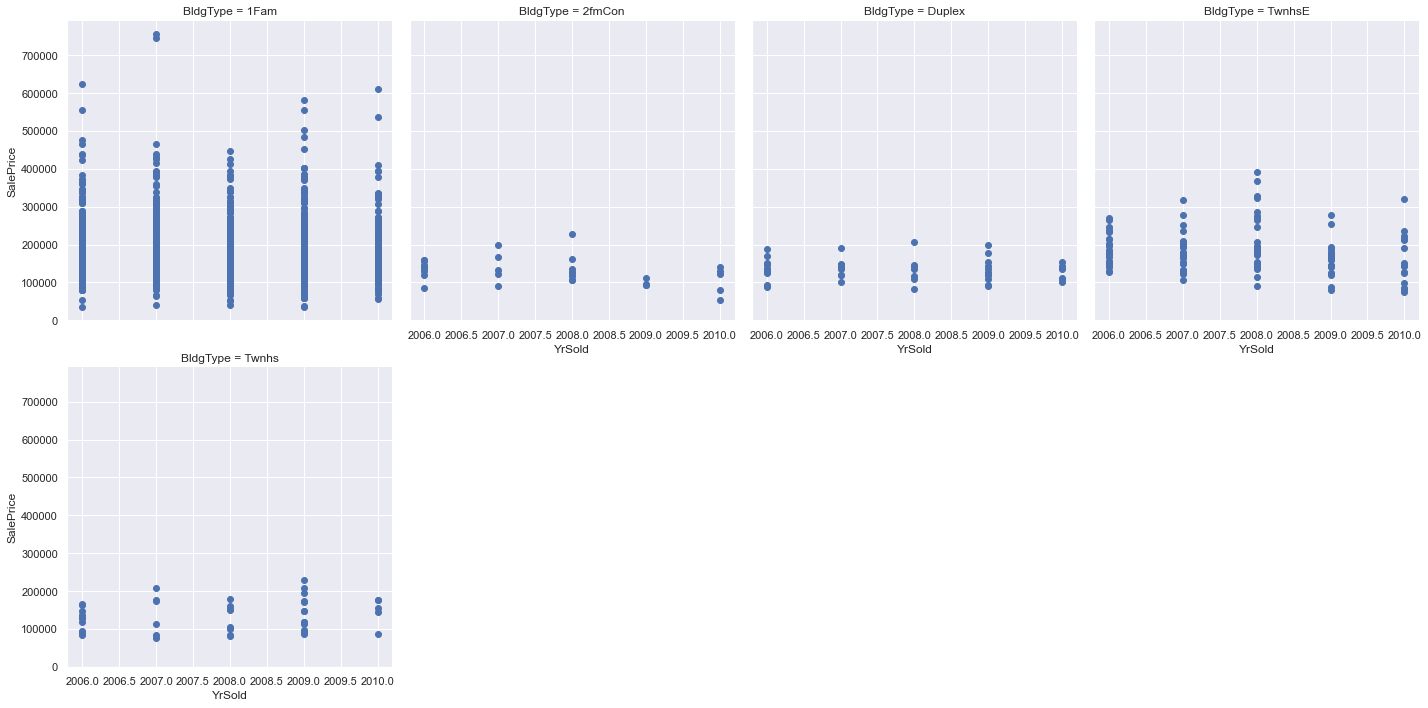

In [37]:
#Check Sale Price for BuildingType in every year
fg = sns.FacetGrid(train,col="BldgType",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

 As can see in graph some category in BuildingType just have few records and price is also not that much, mostly records are from Single Family Detached Category

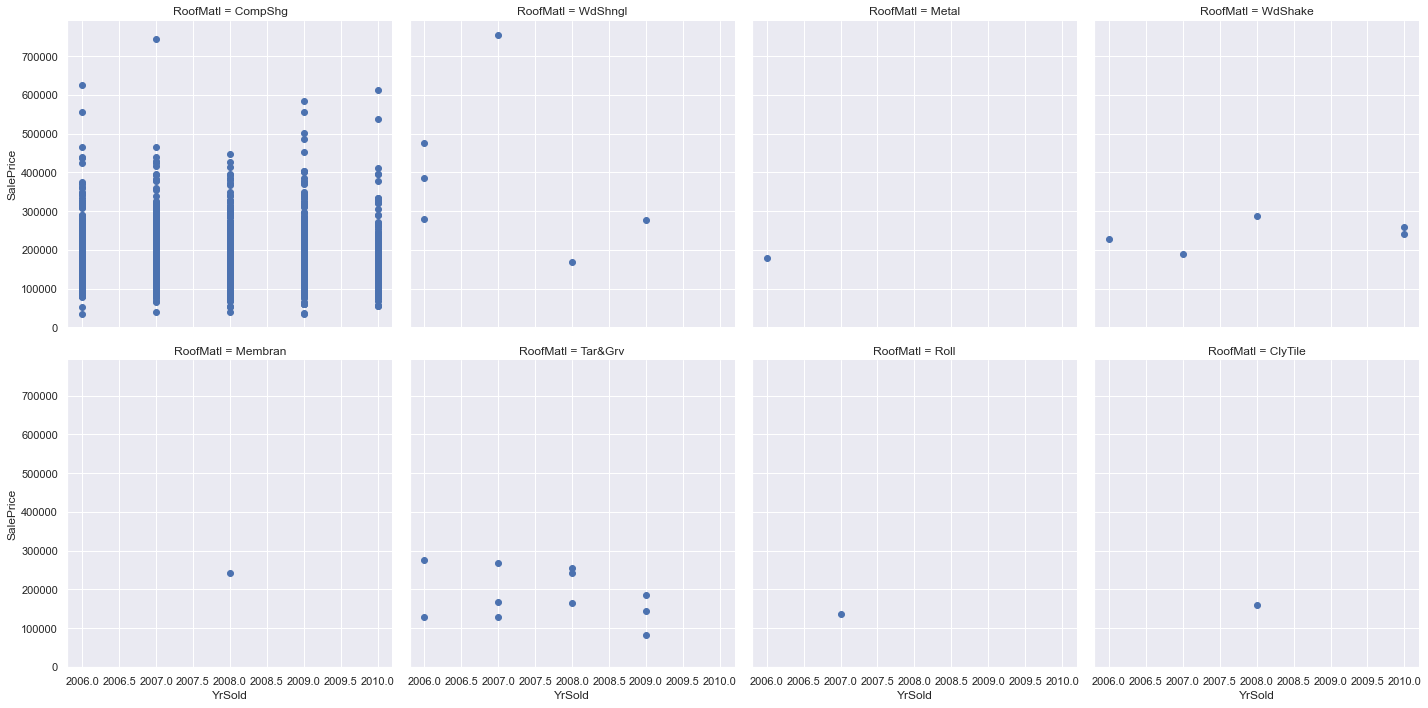

In [38]:
#Check Sale Price for Roof material in every year
fg = sns.FacetGrid(train,col="RoofMatl",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

In Roof Material feature mostly records are from Standard Composite Shingle Category and this category has also high Sale's Prices

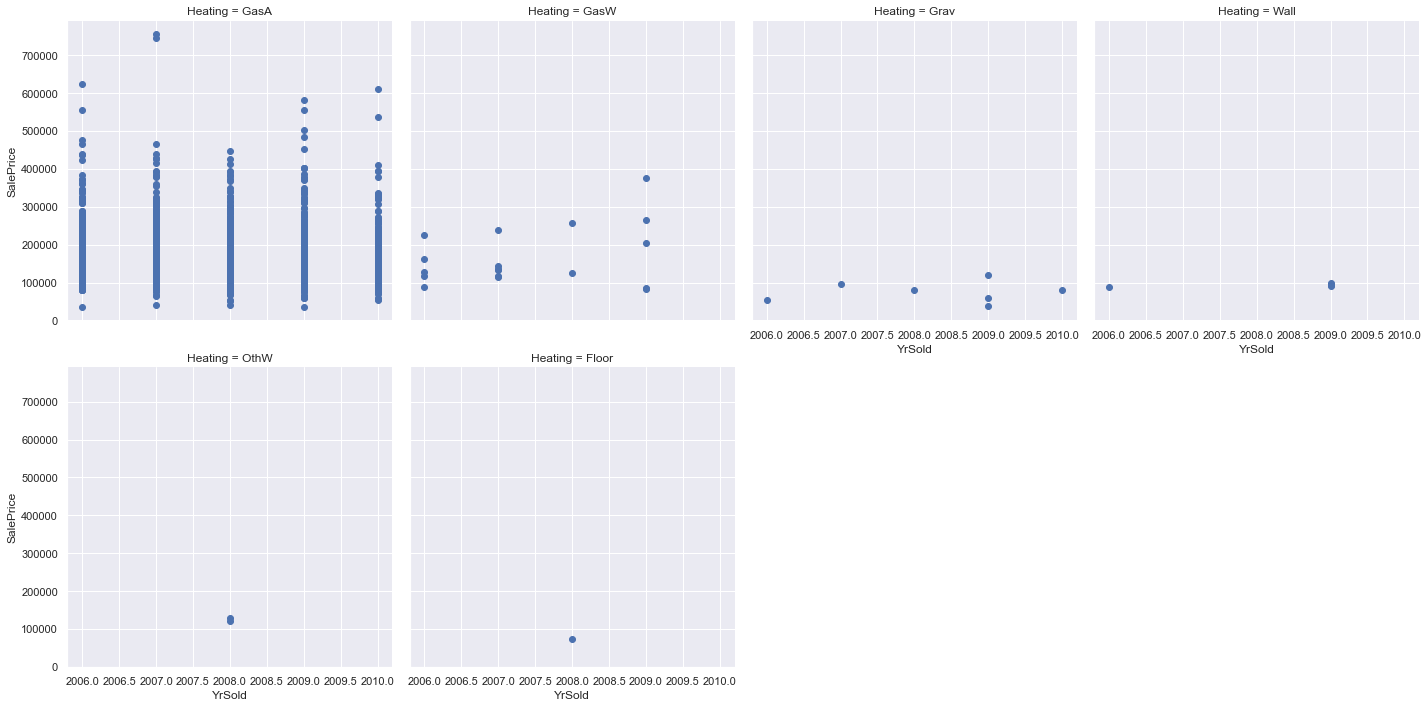

In [39]:
#Check Sale Price forType of heating in every year
fg = sns.FacetGrid(train,col="Heating",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

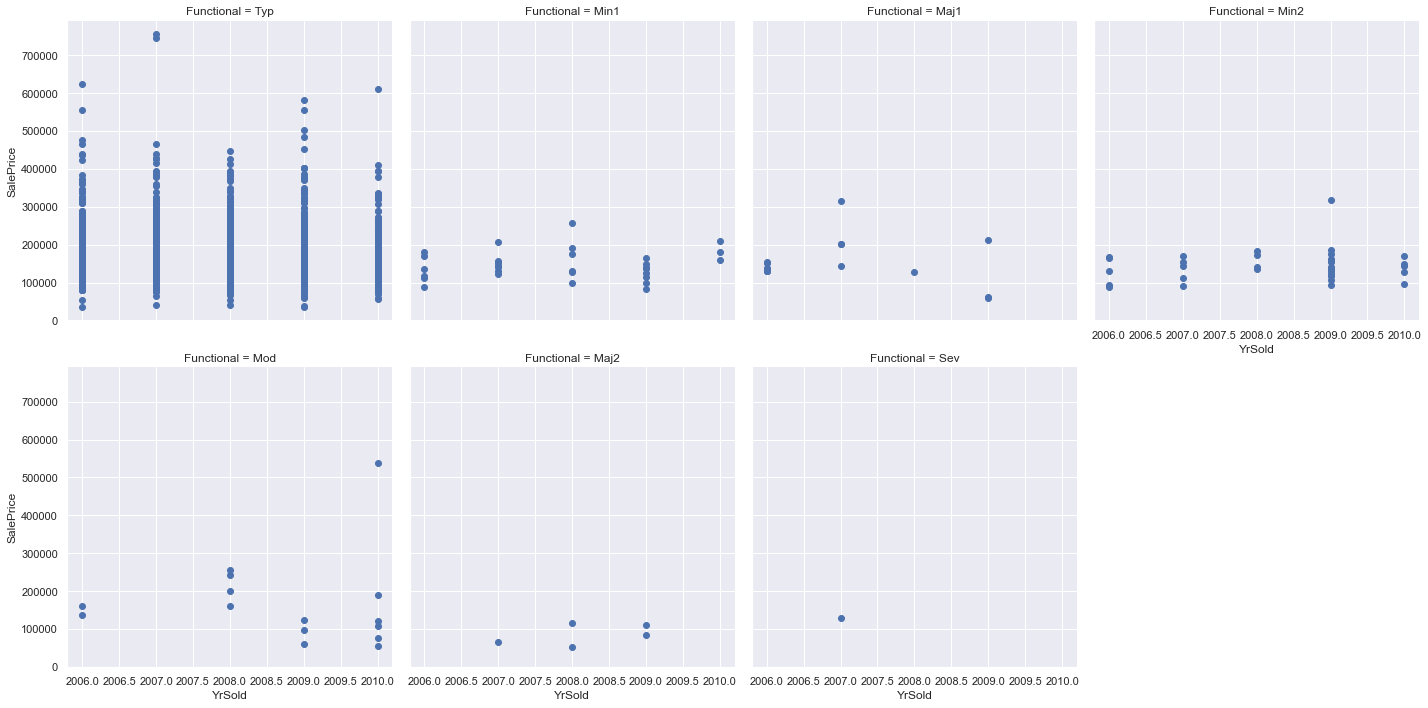

In [40]:
#Check Sale Price for Home functionality in every year
fg = sns.FacetGrid(train,col="Functional",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

Most of records are from Typical Functionality category this category also having high Price range.

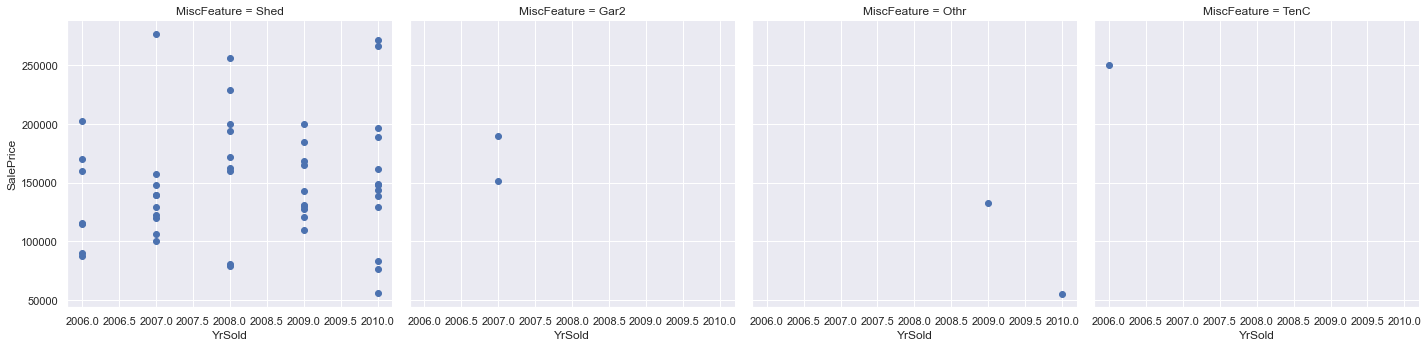

In [41]:
#Check Sale Price for other Miscellaneous feature in each year
fg = sns.FacetGrid(train,col="MiscFeature",col_wrap=4,height=5)
fg.map(plt.scatter,"YrSold","SalePrice")

As can see from upper graph few records are having Miscellaneous feature and these feature's are Sale Price ranging between 50k to 250k it's lower price range.

# Load Test Dataset

In [42]:
test = pd.read_csv("test.csv")
test = test.drop(["Id"],axis=1)
test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   
4            0.0        Gd        TA      PConc       Gd       TA   


# Combine Train and Test Datasets

In [43]:
df = pd.concat([train,test])
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


# Check Null Values by Visualization

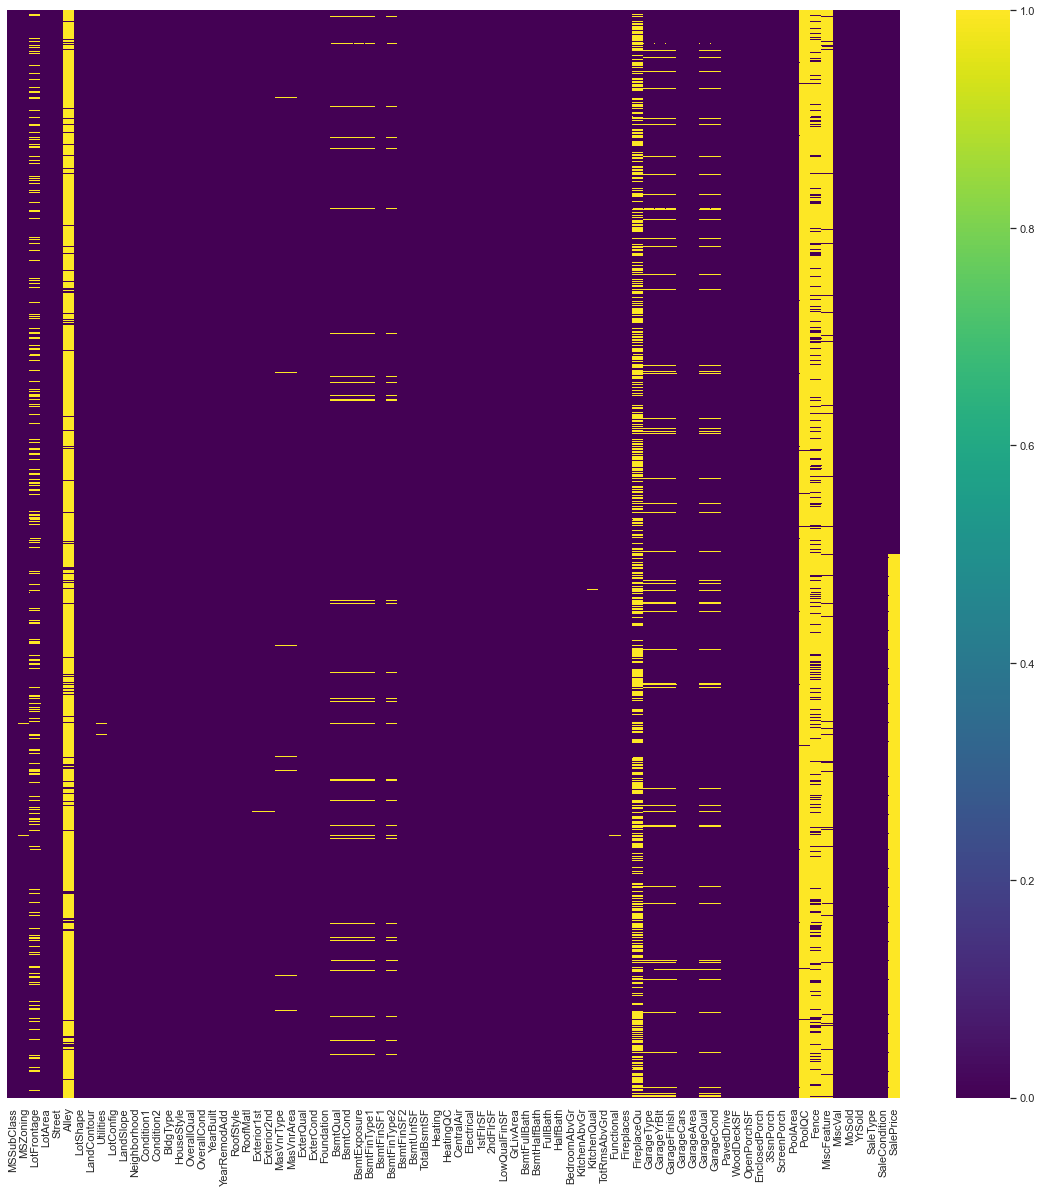

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [45]:
# null values in  each columns:

df_nan_features = [features for features in df.columns if df[features].isnull().sum()>=1]
df_nan_features

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [46]:
df[df_nan_features].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [47]:
# Percentage of null values in each NAN Columns
df[df_nan_features].isnull().mean()

MSZoning        0.001370
LotFrontage     0.166495
Alley           0.932169
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
SaleType        0.000343
SalePrice       0.499829
dtype: float64

In [48]:
# Droping those Columns have more than 80% null values
df = df.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1455         160       RM         21.0     1894   Pave      Reg         Lvl   
1456          20       RL        160.0    20000   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   
1458          60       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1454    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1455    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1456    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1457    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1458    AllPub    Inside       Mod      Mitchel       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1454    Twnhs     2Story            4            7       1970          1970   
1455   TwnhsE     2Story            4            5       1970          1970   
1456     1Fam     1Story            5            7       1960          1996   
1457     1Fam     SFoyer            5            5       1992          1992   
1458     1Fam     2Story            7            5       1993          1994   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1454     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1455     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1456     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1457     Gable  CompShg     HdBoard     Wd Shng       None         0.0   
1458     Gable  CompShg     HdBoard     HdBoard    BrkFace        94.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd         

#  Function to Handle Missing Value

In [49]:
# Function for MEAN Imputing in Nan values

def impute_mean(data_frame,feature_name):
    mean_value = data_frame[feature_name].mean()
    data_frame[feature_name+"_mean"] =  data_frame[feature_name].fillna(mean_value)

In [50]:
# Function for MEDIAN Imputing in Nan values

def impute_median(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name+"_median"] =  data_frame[feature_name].fillna(median_value)

In [51]:
# Second Function for MEDIAN Imputing in Nan values

def impute_median_2(data_frame,feature_name):
    median_value = data_frame[feature_name].median()
    data_frame[feature_name] = data_frame[feature_name].fillna(median_value)

In [52]:
# For Function for MODE Imputing in Nan values

def impute_mode(data_frame,feature_name):
    mode_value = data_frame[feature_name].mode()
    data_frame[feature_name] =  data_frame[feature_name].fillna(mode_value[0])

In [53]:
# Funtioc for Imputing Nan values by RANDOM method.

def impute_random(data_frame,feature_name):
    data_frame[feature_name+"_random"] = data_frame[feature_name]
    random_state = data_frame[feature_name].dropna().sample(data_frame[feature_name].isnull().sum(),random_state = 0)
    random_state.index =data_frame[data_frame[feature_name].isnull()].index
    data_frame.loc[data_frame[feature_name].isnull(),feature_name+"_random"] = random_state

In [54]:
# Function for make histogram

def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

In [55]:
# Function for make Boxplot

def boxplot(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.boxplot(data_frame[feature_name])

# Handling Missing Value.

In [56]:
df_nan_features = [features for features in df.columns if df[features].isnull().sum()>=1]
df_nan_features

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SalePrice']

In [57]:
df[df_nan_features].isnull().mean()

MSZoning        0.001370
LotFrontage     0.166495
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
MasVnrArea      0.007879
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinSF1      0.000343
BsmtFinType2    0.027407
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Electrical      0.000343
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageCars      0.000343
GarageArea      0.000343
GarageQual      0.054471
GarageCond      0.054471
SaleType        0.000343
SalePrice       0.499829
dtype: float64

In [58]:
continuous_features = df.select_dtypes(include=["float64","int64"])
continuous_features

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0       706.0         0.0      150.0   
1             1976         0.0       978.0         0.0      284.0   
2             2002       162.0       486.0         0.0      434.0   
3             1970         0.0       216.0         0.0      540.0   
4             2000       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1454          1970         0.0         0.0         0.0      546.0   
1455          1970         0.0       252.0         0.0      294.0   
1456          1996         0.0      1224.0         0.0        0.0   
1457          1992         0.0       337.0         0.0      575.0   
1458          1994        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0       1710           1.0   
1          1262.0      1262         0             0       1262           0.0   
2           920.0       920       866             0       1786           1.0   
3           756.0       961       756             0       1717           1.0   
4          1145.0      1145      1053             0       2198           1.0   
...           ...       ...       ...           ...        ...           ...   
1454        546.0       546       546             0       1092           0.0   
1455        546.0       546       546             0       1092           0.0   
1456       1224.0      1224         0             0       1224           1.0   
1457        912.0       970         0             0        970           0.0   
1458        996.0       996      1004             0       2000           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         2         1             3             1   
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             1   
1455           0.0         1         1             3             1   
1456           0.0         1         0             4             1   
1457           1.0         1         0             3             1   
1458           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0         2.0       548.0   
1                6           1       1976.0         2.0       460.0   
2                6           1       2001.0         2.0       608.0   
3                7           1       1998.0         3.0       642.0   
4                9           1       2000.0         3.0       836.0   


In [59]:
continuous_nan_features = [feature for feature in continuous_features.columns if continuous_features[feature].isnull().sum()>=1]
continuous_nan_features

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [60]:
categorical_features = df.select_dtypes(include=["object"])
categorical_features

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1454      MeadowV       Norm       Norm    Twnhs     2Story     Gable   
1455      MeadowV       Norm       Norm   TwnhsE     2Story     Gable   
1456      Mitchel       Norm       Norm     1Fam     1Story     Gable   
1457      Mitchel       Norm       Norm     1Fam     SFoyer     Gable   
1458      Mitchel       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1454  CompShg     CemntBd     CmentBd       None        TA        TA   
1455  CompShg     CemntBd     CmentBd       None        TA        TA   
1456  CompShg     VinylSd     VinylSd       None        TA        TA   
1457  CompShg     HdBoard     Wd Shng       None        TA        TA   
1458  CompShg     HdBoard     HdBoard    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1454     CBlock       TA       TA           No          Unf          Unf   
1455     CBlock       TA       TA           No          Rec          Unf   
1456     CBlock       TA       TA           No          ALQ          Unf   
1457      PConc       Gd       TA           Av          GLQ          Unf   
1458      PConc       Gd       TA           Av          LwQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [61]:
# null values in categorical features for each columns:

categorical_nan_features = [features for features in categorical_features.columns if categorical_features[features].isnull().sum()>=1]
categorical_nan_features

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [62]:
# Percentage of null values in categorical features for each columns

df[categorical_nan_features].isnull().mean()

MSZoning        0.001370
Utilities       0.000685
Exterior1st     0.000343
Exterior2nd     0.000343
MasVnrType      0.008222
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinType2    0.027407
Electrical      0.000343
KitchenQual     0.000343
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
SaleType        0.000343
dtype: float64

#some categorical features are having null values, reason could be for null values is some of House's don't have these category for Example Fire place Quality feature having lots of nan because some house's don't have Fire Place's so there Quality would have Nan. 
so fill all these categorical feature with new category .

In [63]:
#MasVnrType feature
df[df["MasVnrType"].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
234           60       RL          NaN     7851   Pave      Reg         Lvl   
529           20       RL          NaN    32668   Pave      IR1         Lvl   
650           60       FV         65.0     8125   Pave      Reg         Lvl   
936           20       RL         67.0    10083   Pave      Reg         Lvl   
973           20       FV         95.0    11639   Pave      Reg         Lvl   
977          120       FV         35.0     4274   Pave      IR1         Lvl   
1243          20       RL        107.0    13891   Pave      Reg         Lvl   
1278          60       RL         75.0     9473   Pave      Reg         Lvl   
231           60       RL          NaN    12891   Pave      IR1         Lvl   
246           20       FV         90.0     7993   Pave      IR1         Lvl   
422           60       RL         70.0     8749   Pave      Reg         Lvl   
532           60       RL          NaN     7750   Pave      Reg         Lvl   
544           20       RL         87.0    10037   Pave      Reg         Lvl   
581           60       FV          NaN     7500   Pave      Reg         Lvl   
851           60       RL         59.0    15810   Pave      IR1         Lvl   
865           80       RL          NaN    11950   Pave      IR1         Lvl   
880           20       RL         85.0     9965   Pave      Reg         Lvl   
889           60       FV        112.0    12217   Pave      IR1         Lvl   
908          120       FV         30.0     5330   Pave      IR2         Lvl   
1132          20       RL         68.0     8298   Pave      IR1         HLS   
1150          20       RL        124.0    27697   Pave      Reg         Lvl   
1197          60       RL        103.0    12867   Pave      IR1         Lvl   
1226          20       RL         49.0    15218   Pave      IR1         Lvl   
1402          20       RL         75.0     8050   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
234     AllPub    Inside       Gtl      Gilbert       Norm       Norm   
529     AllPub   CulDSac       Gtl      Crawfor       Norm       Norm   
650     AllPub    Inside       Gtl      Somerst       Norm       Norm   
936     AllPub    Inside       Gtl      SawyerW       Norm       Norm   
973     AllPub    Corner       Gtl      Somerst       Norm       Norm   
977     AllPub    Inside       Gtl      Somerst       Norm       Norm   
1243    AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1278    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
231     AllPub    Corner       Gtl      Gilbert       Norm       Norm   
246     AllPub    Inside       Gtl      Somerst       Norm       Norm   
422     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
532     AllPub    Inside       Gtl      Gilbert       RRAn       Norm   
544     AllPub    Corner       Gtl      Somerst      Feedr       Norm   
581     AllPub    Inside       Gtl      Somerst       Norm       Norm   
851     AllPub    Inside       Gtl      Gilbert       RRAn       Norm   
865     AllPub    Corner       Gtl      Gilbert       Norm       Norm   
880     AllPub       FR2       Gtl      Somerst      Feedr       Norm   
889     AllPub    Inside       Gtl      Somerst       Norm       Norm   
908     AllPub    Inside       Gtl      Somerst       Norm       Norm   
1132    AllPub    Inside       Gtl       Timber       Norm       Norm   
1150    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1197    AllPub    Corner       Gtl      NridgHt       Norm       Norm   
1226    AllPub   CulDSac       Gtl      Somerst       RRAn       Norm   
1402    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
234      1Fam     2Story            6            5       2002          2002   
529      1Fam     1Story            6         

In [64]:
# MasVnrType and MasVnrArea both feature have some relation.

In [65]:
df["MasVnrType"].isna().sum()

24

In [66]:
df["MasVnrArea"].isna().sum()

23

In [67]:
# fill nan value in MasVnrType by new category.
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [68]:
# fill nan value in MasVnrArea by 0.
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [69]:
# fill na in FireplaceQu feature by No Fireplace
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")

In [70]:
# Some of House's don't have Basement so fill nan by No Basement in some feature like 
                                                                #(BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2)

df["BsmtQual"] = df["BsmtQual"].fillna("No Basement")
df["BsmtCond"] = df["BsmtCond"].fillna("No Basement")
df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")

In [71]:
# Similarly fill nan in Continous features related to Basement by 0 because some of House don't have basement.
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0)
df["BsmtFinSF2"] = df["BsmtFinSF2"].fillna(0)
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0)
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)

In [72]:
#BsmtHalfBath
df["BsmtHalfBath"].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [73]:
df[df["BsmtFullBath"].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
660          20       RM         99.0     5940   Pave      IR1         Lvl   
728          20       RL        123.0    47007   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
660    AllPub       FR3       Gtl      BrkSide      Feedr       Norm     1Fam   
728    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
660     1Story            4            7       1946          1950     Gable   
728     1Story            5            7       1959          1996     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
660  CompShg     MetalSd      CBlock       None         0.0        TA   
728  CompShg     Plywood     Plywood       None         0.0        TA   

    ExterCond Foundation     BsmtQual     BsmtCond BsmtExposure BsmtFinType1  \
660        TA      PConc  No Basement  No Basement  No Basement  No Basement   
728        TA       Slab  No Basement  No Basement  No Basement  No Basement   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
660         0.0  No Basement         0.0        0.0          0.0    GasA   
728         0.0  No Basement         0.0        0.0          0.0    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660        TA          Y      FuseA       896         0             0   
728        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

      FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
660  No Fireplace     Detchd       1946.0          Unf         1.0   
728            Gd     Attchd       1959.0          Unf         2.0   

     GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
660       280.0         TA         TA          Y           0            0   
728       624.0         TA         TA          Y           0          372   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
660              0          0            0         0        0       4    2008   
728              0          0            0         0        0       7    2008   

    SaleType SaleCondition  SalePrice  
660    ConLD       Abnorml        NaN  
728       WD        Normal        NaN

In [74]:
# fill na value in BsmtHalfBath by 0.
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)

In [75]:
#BsmtfullBath
print("No. of Nan in BsmtfullBath :", df["BsmtFullBath"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["BsmtFullBath"].value_counts())

No. of Nan in BsmtfullBath : 2
***************************************
Value_Count
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64


In [76]:
# fill na value in BsmtFullBath by 0.
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)

In [77]:
# Electrical feature

print("No. of Nan in Electrical feature :", df["Electrical"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["Electrical"].value_counts())

No. of Nan in Electrical feature : 1
***************************************
Value_Count
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


In [78]:
# fill na value in Electrical by Mode.
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [79]:
# Kitchen Qual feature

print("No. of Nan in Kitchen Qual feature :", df["KitchenQual"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["KitchenQual"].value_counts())

No. of Nan in Kitchen Qual feature : 1
***************************************
Value_Count
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64


In [80]:
df[df["KitchenQual"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
95          50       RL         72.0    10632   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
95    AllPub    Inside       Gtl      ClearCr       Norm       Norm     1Fam   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
95     1.5Fin            5            3       1917          1950     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
95  CompShg     Wd Sdng     Wd Sdng       None         0.0        TA   

   ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
95        TA     BrkTil       Gd       Fa           No          Unf   

    BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
95         0.0          Unf         0.0      689.0        689.0    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
95        Gd          N      SBrkr       725       499             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
95       1224           0.0           0.0         1         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
95             1         NaN             6        Mod           0   

     FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
95  No Fireplace     Detchd       1917.0          Unf         1.0       180.0   

   GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
95         Fa         Fa          N           0            0            248   

    3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
95          0            0         0        0       1    2010      COD   

   SaleCondition  SalePrice  
95        Normal        NaN

In [81]:
# fill na value in KitchenQual by Mode.
df["KitchenQual"] = df["KitchenQual"].fillna("TA")

In [82]:
# Functional feature

print("No. of Nan in Functional feature :", df["Functional"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["Functional"].value_counts())

No. of Nan in Functional feature : 2
***************************************
Value_Count
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


In [83]:
# fill na value in KitchenQual by Mode.
df["Functional"] = df["Functional"].fillna("Typ")

In [84]:
#Some of House's don't have Garage so fill nan by No Garage in some feature like (GarageType,GarageFinish,GarageCond,GarageQual)

df["GarageType"] = df["GarageType"].fillna("No Garage")
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
df["GarageCond"] = df["GarageCond"].fillna("No Garage")
df["GarageQual"] = df["GarageQual"].fillna("No Garage")

In [85]:
#GarageYrBlt 

df["GarageYrBlt"].isnull().sum()

159

In [86]:
df[df["GarageYrBlt"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
39            90       RL         65.0     6040   Pave      Reg         Lvl   
48           190       RM         33.0     4456   Pave      Reg         Lvl   
78            90       RL         72.0    10778   Pave      Reg         Lvl   
88            50  C (all)        105.0     8470   Pave      IR1         Lvl   
89            20       RL         60.0     8070   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1433          50  C (all)         60.0     8520   Grvl      Reg         Bnk   
1449         180       RM         21.0     1470   Pave      Reg         Lvl   
1453         160       RM         21.0     1526   Pave      Reg         Lvl   
1454         160       RM         21.0     1936   Pave      Reg         Lvl   
1457          85       RL         62.0    10441   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
39      AllPub    Inside       Gtl      Edwards       Norm       Norm   
48      AllPub    Inside       Gtl      OldTown       Norm       Norm   
78      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
88      AllPub    Corner       Gtl       IDOTRR      Feedr      Feedr   
89      AllPub    Inside       Gtl      CollgCr       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1433    AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
1449    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1453    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1454    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1457    AllPub    Inside       Gtl      Mitchel       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
39     Duplex     1Story            4            5       1955          1955   
48     2fmCon     2Story            4            5       1920          2008   
78     Duplex     1Story            4            5       1968          1968   
88       1Fam     1.5Fin            3            2       1915          1982   
89       1Fam     1Story            4            5       1994          1995   
...       ...        ...          ...          ...        ...           ...   
1433     1Fam     1.5Fin            3            5       1916          1950   
1449    Twnhs     SFoyer            4            6       1970          1970   
1453    Twnhs     2Story            4            5       1970          1970   
1454    Twnhs     2Story            4            7       1970          1970   
1457     1Fam     SFoyer            5            5       1992          1992   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
39       Gable  CompShg     AsbShng     Plywood       None         0.0   
48       Gable  CompShg     MetalSd     MetalSd       None         0.0   
78         Hip  CompShg     HdBoard     HdBoard       None         0.0   
88         Hip  CompShg     Plywood     Plywood       None         0.0   
89       Gable  CompShg     VinylSd     VinylSd       None         0.0   
...        ...      ...         ...         ...        ...         ...   
1433     Gable  CompShg     MetalSd     MetalSd       None         0.0   
1449     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1453     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1454     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1457     Gable  CompShg     HdBoard     Wd Shng       None         0.0   

     ExterQual ExterCond Foundation     BsmtQual     BsmtCond BsmtExposure  \
39          TA        TA      PConc  No Basement  No Basement  No Basement   
48          TA        TA     BrkTil           TA           TA           No   
78          TA        TA     CBlock           TA           TA           No   
88          Fa        Fa     C

In [87]:
# In some of house's has no garage than GarageYrBlt should be zero it's continuous feature can't assign no garage.
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)

In [88]:
# Similarly GarageArea also zero  some of house's has no garage
df["GarageArea"]=df["GarageArea"].fillna(0)

In [89]:
# GarageCars feature

print("No. of Nan in GarageCars feature :", df["GarageCars"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["GarageCars"].value_counts())

No. of Nan in GarageCars feature : 1
***************************************
Value_Count
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64


In [90]:
# fill na value in GarageCars by 0.

df["GarageCars"] = df["GarageCars"].fillna(0)

In [91]:
# MSZoning feature

print("No. of Nan in MSZoning feature :", df["MSZoning"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["MSZoning"].value_counts())

No. of Nan in MSZoning feature : 4
***************************************
Value_Count
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [92]:
# fill na value in MSZoning by Mode.

df["MSZoning"] = df["MSZoning"].fillna("RL")

In [93]:
# Utilities feature

print("No. of Nan in Utilities feature :", df["Utilities"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["Utilities"].value_counts())

No. of Nan in Utilities feature : 2
***************************************
Value_Count
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [94]:
# fill na value in Utilities by Mode.

df["Utilities"] = df["Utilities"].fillna("AllPub")

In [95]:
# Exterior1st feature

print("No. of Nan in Exterior1st feature :", df["Exterior1st"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["Exterior1st"].value_counts())

No. of Nan in Exterior1st feature : 1
***************************************
Value_Count
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64


In [96]:
# fill na value in Exterior1st by Mode.

df["Exterior1st"] = df["Exterior1st"].fillna("VinylSd")

In [97]:
# Exterior2nd feature

print("No. of Nan in Exterior2nd feature :", df["Exterior2nd"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["Exterior2nd"].value_counts())

No. of Nan in Exterior2nd feature : 1
***************************************
Value_Count
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [98]:
# fill na value in Exterior2nd by Mode.

df["Exterior2nd"] = df["Exterior2nd"].fillna("VinylSd")

In [99]:
# SaleType feature

print("No. of Nan in SaleType feature :", df["SaleType"].isnull().sum())

print("***************************************")

print("Value_Count")
print(df["SaleType"].value_counts())

No. of Nan in SaleType feature : 1
***************************************
Value_Count
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


In [100]:
# fill na value in Exterior2nd by Mode.

df["SaleType"] = df["SaleType"].fillna("WD")

In [101]:
df[categorical_nan_features].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [102]:
df.shape

(2919, 76)

In [103]:
# Handling Missing Values in LotFrontage Feature

df[df["LotFrontage"].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
7             60       RL          NaN    10382   Pave      IR1         Lvl   
12            20       RL          NaN    12968   Pave      IR2         Lvl   
14            20       RL          NaN    10920   Pave      IR1         Lvl   
16            20       RL          NaN    11241   Pave      IR1         Lvl   
24            20       RL          NaN     8246   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1387          20       RL          NaN    11088   Pave      Reg         Lvl   
1390          60       RL          NaN    21533   Pave      IR2         Lvl   
1440          20       RL          NaN    50102   Pave      IR1         Low   
1441          20       RL          NaN     8098   Pave      IR1         Lvl   
1448          90       RL          NaN    11836   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
7       AllPub    Corner       Gtl       NWAmes       PosN       Norm   
12      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
14      AllPub    Corner       Gtl        NAmes       Norm       Norm   
16      AllPub   CulDSac       Gtl        NAmes       Norm       Norm   
24      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1387    AllPub    Corner       Gtl      CollgCr       Norm       Norm   
1390    AllPub       FR2       Gtl      CollgCr      Feedr       Norm   
1440    AllPub    Inside       Mod       Timber       Norm       Norm   
1441    AllPub    Inside       Gtl       Timber       Norm       Norm   
1448    AllPub    Corner       Gtl      Mitchel       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
7        1Fam     2Story            7            6       1973          1973   
12       1Fam     1Story            5            6       1962          1962   
14       1Fam     1Story            6            5       1960          1960   
16       1Fam     1Story            6            7       1970          1970   
24       1Fam     1Story            5            8       1968          2001   
...       ...        ...          ...          ...        ...           ...   
1387     1Fam     1Story            8            5       2002          2002   
1390     1Fam     2Story            7            5       1996          1997   
1440     1Fam     1Story            6            5       1958          1958   
1441     1Fam     1Story            6            5       2000          2000   
1448   Duplex     1Story            5            5       1970          1970   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
7        Gable  CompShg     HdBoard     HdBoard      Stone       240.0   
12         Hip  CompShg     HdBoard     Plywood       None         0.0   
14         Hip  CompShg     MetalSd     MetalSd    BrkFace       212.0   
16       Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0   
24       Gable  CompShg     Plywood     Plywood       None         0.0   
...        ...      ...         ...         ...        ...         ...   
1387       Hip  CompShg      Stucco      Stucco       None         0.0   
1390     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1440     Gable  Tar&Grv     Plywood     Plywood       None         0.0   
1441     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1448     Gable  CompShg     Plywood     Plywood       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
7           TA        TA     CBlock       Gd       TA           Mn   
12          TA        TA     CBlock       TA       TA           No   
14          TA        TA     CBlock       TA       TA           No   
16          TA        TA     CBlock       TA       TA         

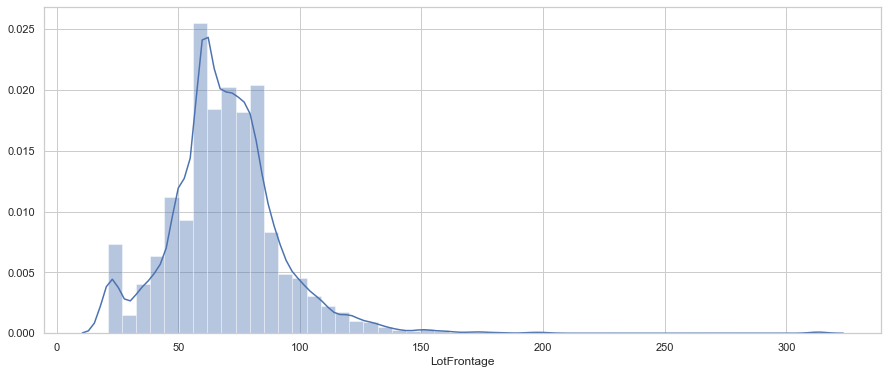

In [104]:
histogram(df,"LotFrontage")

In [105]:
impute_median(df,"LotFrontage")
impute_mean(df,"LotFrontage")
impute_random(df,"LotFrontage")

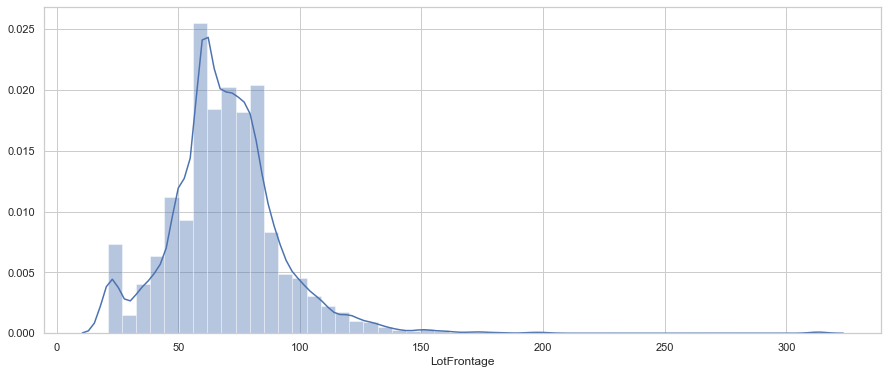

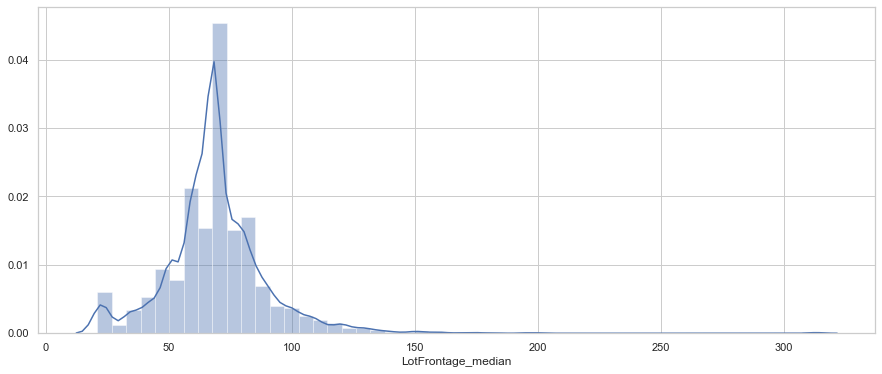

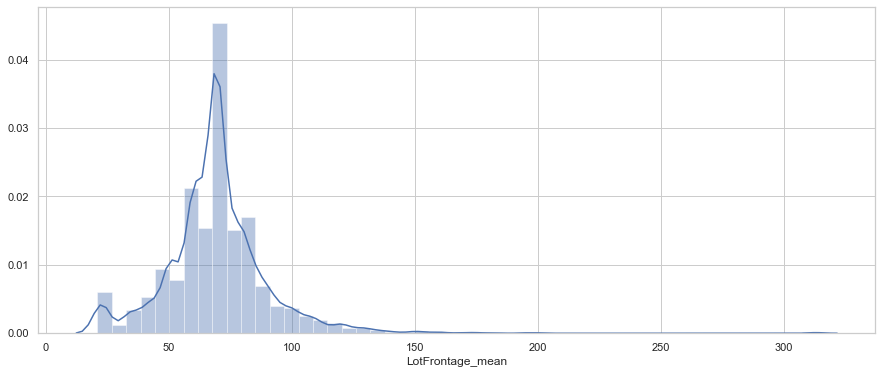

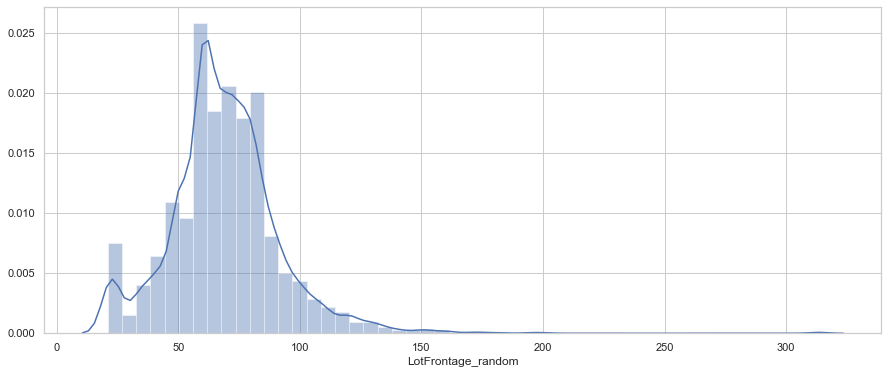

In [106]:
histogram(df,"LotFrontage")
histogram(df,"LotFrontage_median")
histogram(df,"LotFrontage_mean")
histogram(df,"LotFrontage_random")

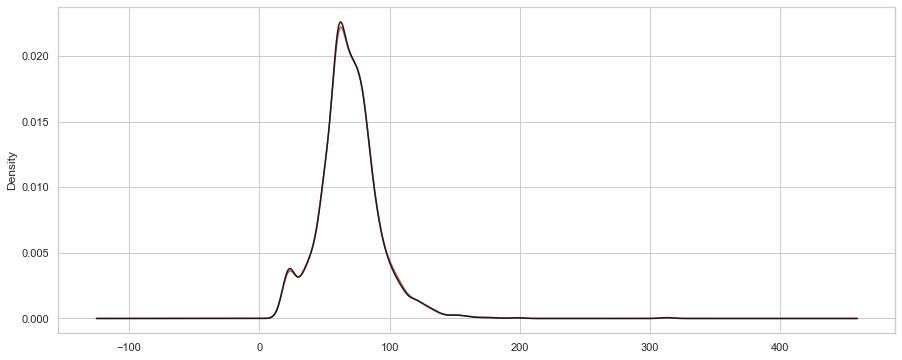

In [107]:
# Feature LotFrontage having more than 10% Null values so replace nan values by Random Sampling Method.

plt.figure(figsize=(15,6))
df["LotFrontage"].plot(kind="kde",c="r")
df["LotFrontage_random"].plot(kind="kde",c = "k")

After Missing Value Imputation Distribution hasn't changed by Random Sampling 

In [108]:
print(df["LotFrontage"].std())
print(df["LotFrontage_random"].std())
 # std also same after Random Sampling

23.34490470692737
23.10783185762143


In [109]:
df["LotFrontage"] = df["LotFrontage_random"] 

In [110]:
df["LotFrontage"].isnull().sum()

0

In [111]:
df = df.drop(["LotFrontage_random","LotFrontage_mean","LotFrontage_median"], axis=1)
df.shape

(2919, 76)

In [112]:
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

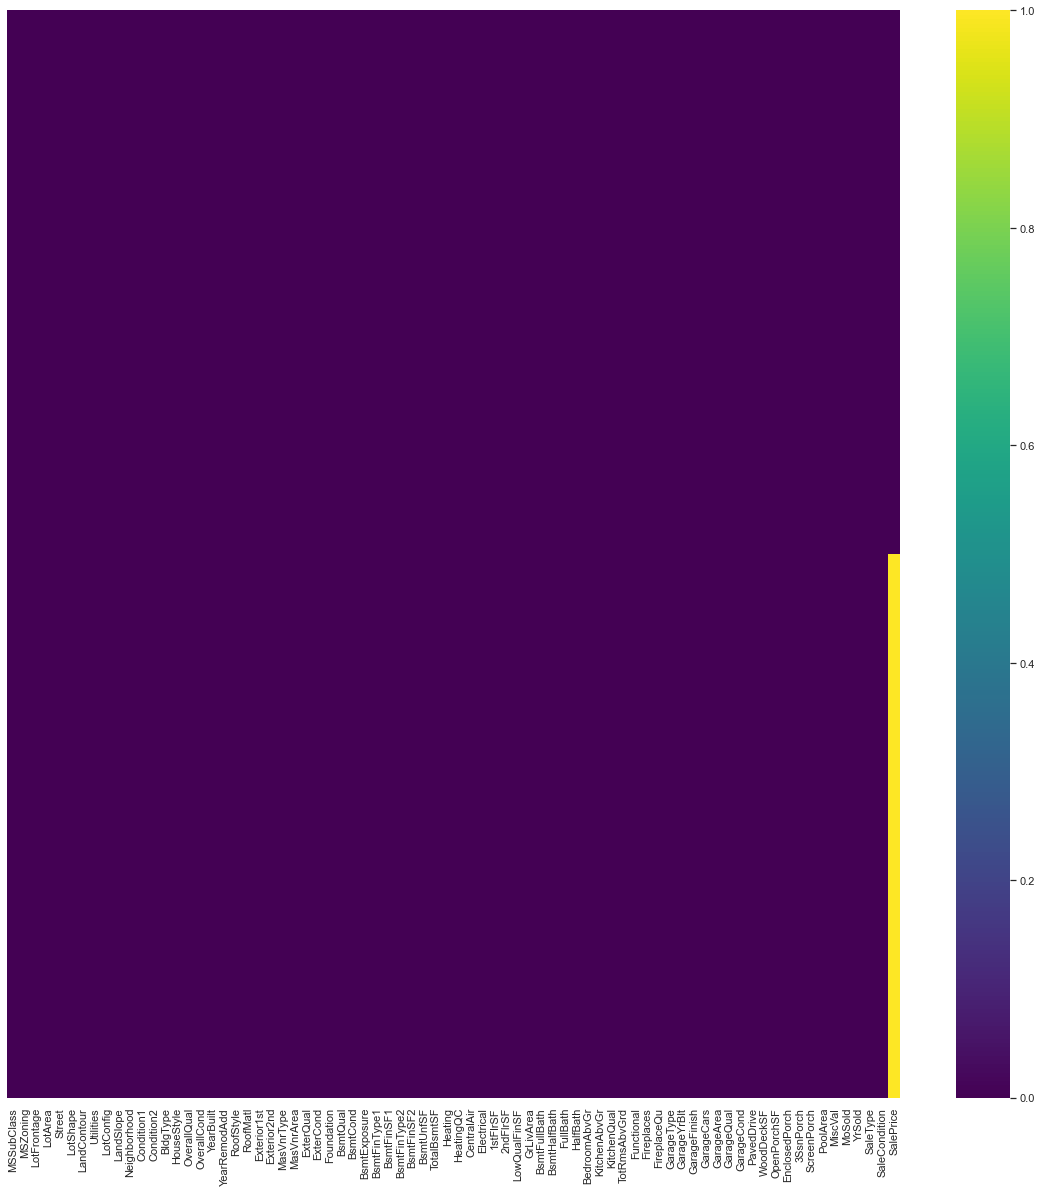

In [113]:
#check again for null values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

# Handle Outliers and Transformation

In [114]:
#function for detect Outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*1.5)
    return (lower_bridge,upper_bridge)
    

In [115]:
#function for detect Outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)-(IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*3)
    return (lower_bridge,upper_bridge)
    

In [116]:
#function for detect Outliers when feature has Noramally Distributed (by mean-+3std)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_boundary,upper_boundary)
    

In [117]:
#function for check data is Noramally Distributed by QQ-Plot

from scipy  import  stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("original_dist")
    

In [118]:
# funtion for LOG Transformation Technique 

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")

In [119]:
# function for Reciprocal Transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name]
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")

In [120]:
# function for SquareRoot Transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")   

In [121]:
# function for Exponential Transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")

In [122]:
# function for Box Cox Transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name],parameter = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")

# LotFrontage Feature

In [123]:
df["LotFrontage"].describe()

count    2919.000000
mean       69.041453
std        23.107832
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

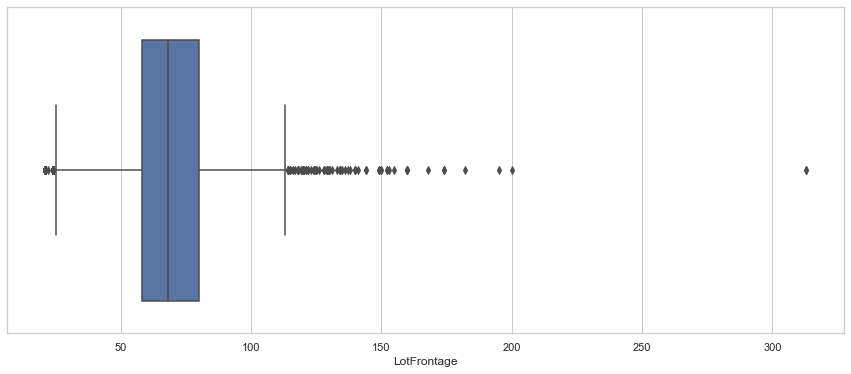

In [124]:
# Detect outliers by boxplot 

boxplot(df,"LotFrontage")

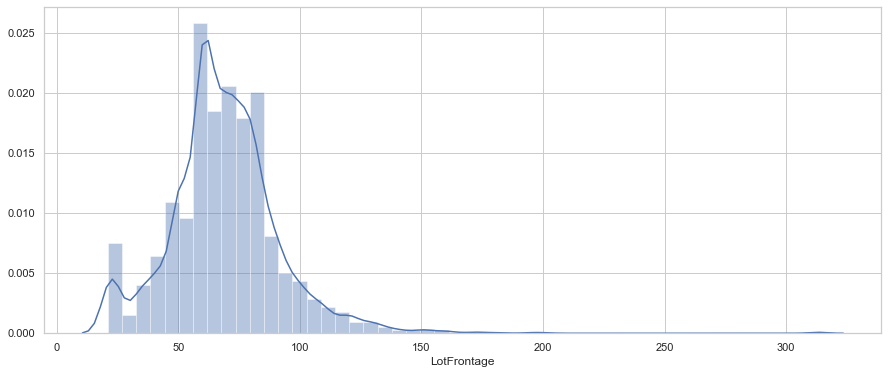

In [125]:
# check Distribution by Histogram.

histogram(df,"LotFrontage")

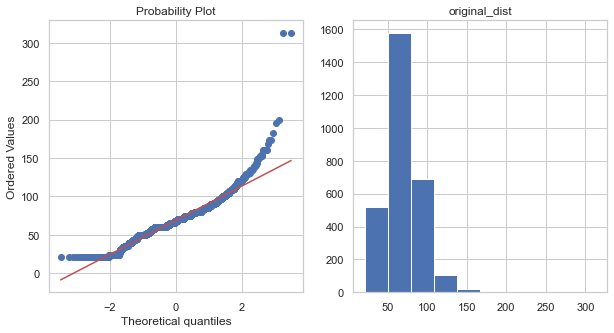

In [126]:
#Check LotFrontage feature Distribution by QQ-plot
original_dist(df,"LotFrontage")

In [127]:
#LotFrontage distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"LotFrontage")

(-0.2820430206203639, 138.3649481251082)

In [128]:
# In LotFrontage more than 138.36 value consider as outliers
df.loc[df["LotFrontage"]>=138.36,"LotFrontage"] = 138.36

In [129]:
df[df["LotFrontage"]>=138.36]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
7             60       RL       138.36    10382   Pave      IR1         Lvl   
171           20       RL       138.36    31770   Pave      IR1         Lvl   
197           75       RL       138.36    25419   Pave      Reg         Lvl   
231           60       RL       138.36    15138   Pave      IR1         Lvl   
277           20       RL       138.36    19138   Pave      Reg         Lvl   
313           20       RL       138.36   215245   Pave      IR3         Low   
496           20       RL       138.36    12692   Pave      IR1         Lvl   
807           70       RL       138.36    21384   Pave      Reg         Lvl   
909           60       RL       138.36    12589   Pave      IR2         Lvl   
934           20       RL       138.36    27650   Pave      IR2         HLS   
975          160       FV       138.36     2651   Pave      Reg         Lvl   
1107          60       RL       138.36    23257   Pave      IR3         HLS   
1127          20       RL       138.36    14572   Pave      IR3         Lvl   
1182          60       RL       138.36    15623   Pave      IR1         Lvl   
1211          50       RL       138.36    12134   Pave      IR1         Bnk   
1298          60       RL       138.36    63887   Pave      IR3         Bnk   
1337          30       RM       138.36     4118   Pave      IR1         Bnk   
286           60       RL       138.36    12732   Pave      IR1         Lvl   
780           85       RL       138.36    14137   Pave      Reg         Lvl   
799           20       RL       138.36    18160   Grvl      Reg         Lvl   
804          190       RL       138.36    41600   Pave      IR1         Lvl   
1053          20       RL       138.36    20064   Pave      IR1         Low   
1130          20       RL       138.36    19958   Pave      Reg         Lvl   
1139          20       RL       138.36    43500   Pave      Reg         Lvl   
1439          80       RL       138.36    11080   Pave      Reg         Lvl   
1456          20       RL       138.36    20000   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
7       AllPub    Corner       Gtl       NWAmes       PosN       Norm   
171     AllPub    Corner       Gtl        NAmes       Norm       Norm   
197     AllPub    Corner       Gtl        NAmes     Artery       Norm   
231     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
277     AllPub    Corner       Gtl      Gilbert       Norm       Norm   
313     AllPub    Inside       Sev       Timber       Norm       Norm   
496     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
807     AllPub    Inside       Gtl      BrkSide       Norm       Norm   
909     AllPub    Inside       Gtl      Gilbert       Norm       Norm   
934     AllPub    Inside       Mod        NAmes       PosA       Norm   
975     AllPub       FR2       Gtl      Somerst       Norm       Norm   
1107    AllPub   CulDSac       Gtl      Gilbert       Norm       Norm   
1127    AllPub    Corner       Gtl      Gilbert       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1211    AllPub    Inside       Mod      Gilbert       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
1337    AllPub    Corner       Mod      OldTown      Feedr       Norm   
286     AllPub   CulDSac       Gtl       NWAmes       PosN       Norm   
780     AllPub    Corner       Gtl      Mitchel       Norm       Norm   
799     AllPub    Inside       Gtl      Gilbert       Norm       Norm   
804     AllPub       FR2       Gtl      Gilbert       Norm       Norm   
1053    AllPub    Inside       Sev      ClearCr       Norm       Norm   
1130    AllPub    Inside       Gtl       Timber       Norm       Norm   
1139    AllPub    Inside       Gtl      Mitchel     Artery       Norm   
1439    AllPub    Corner       Gtl      Mitchel

Apply Some Transformation Techniques on LotFrontage for make distribution as Normally Distributed and check Distribution by QQ-plot.

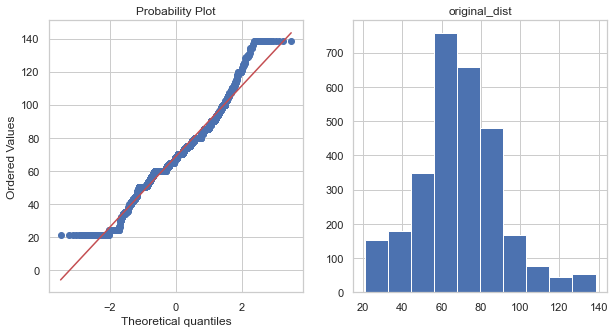

In [130]:
original_dist(df,"LotFrontage")

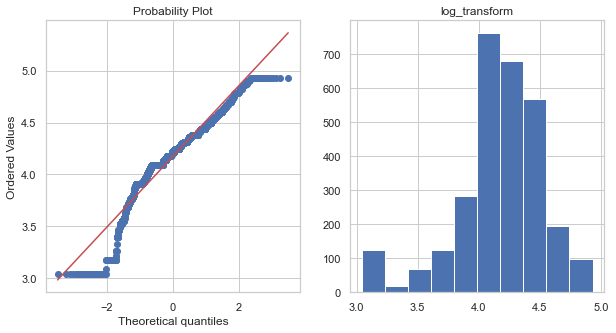

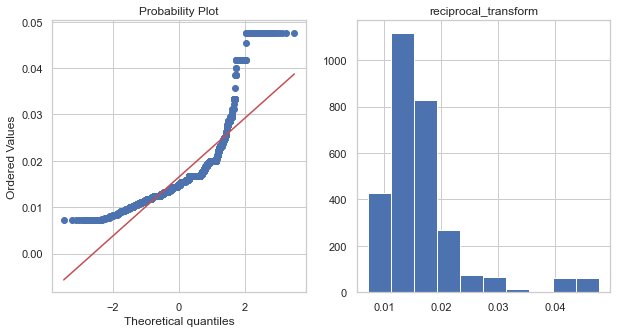

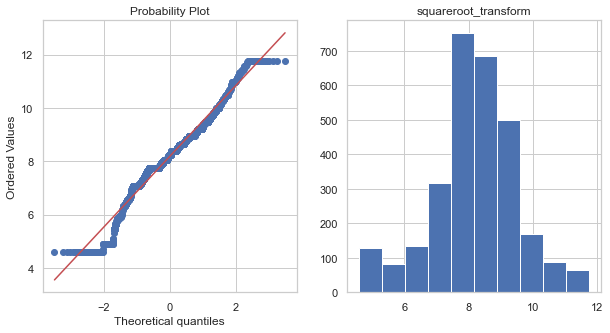

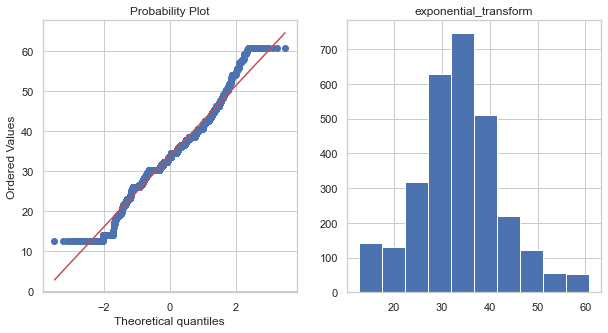

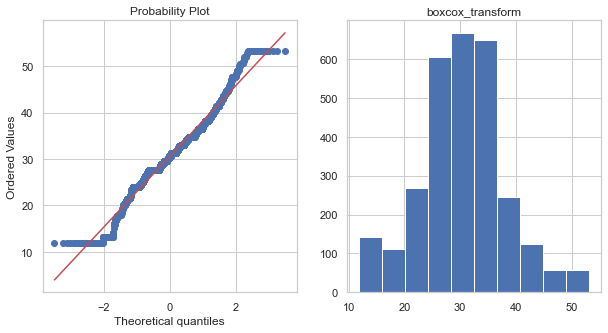

In [131]:
log_transform(df,"LotFrontage")

reciprocal_transform(df,"LotFrontage")

squareroot_transform(df,"LotFrontage")

exponential_transform(df,"LotFrontage")

boxcox_transform(df,"LotFrontage")

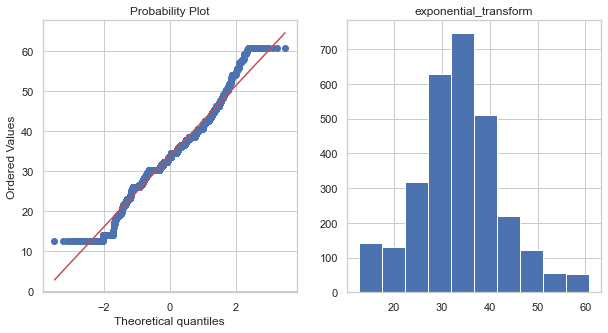

In [132]:
#After Apply Exponential Transformation LotFrontage Feature looks more Normally distributed so apply on main dataset.

if 0 in df["LotFrontage"].unique():
    pass
else:
    df["LotFrontage"] = df["LotFrontage"]**(1/1.2)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df["LotFrontage"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    df["LotFrontage"].hist()
    plt.title("exponential_transform")

# LotArea Feature

In [133]:
df["LotArea"].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

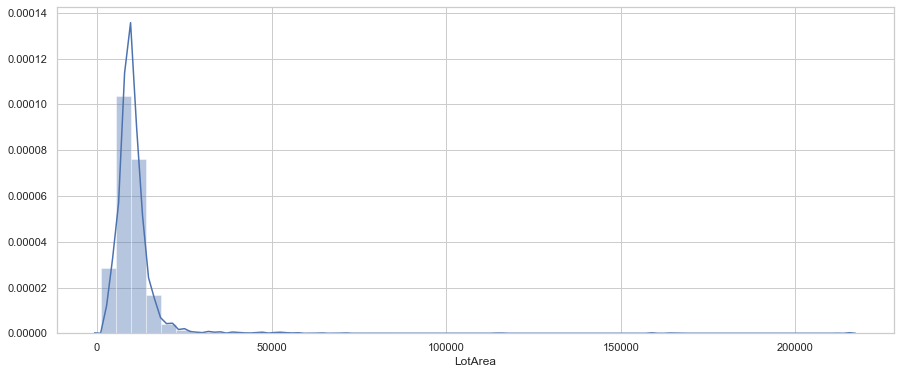

In [134]:
# check Distribution by Histogram.

histogram(df,"LotArea")

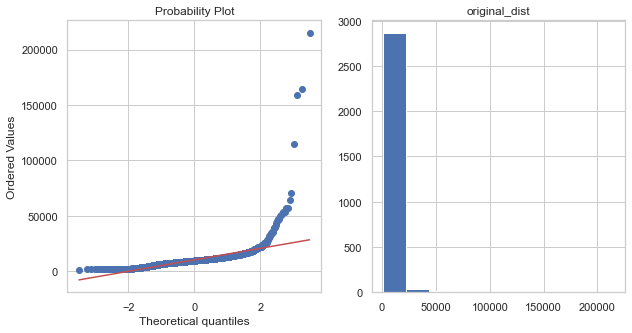

In [135]:
#Check LotFrontage feature Distribution by QQ-plot

original_dist(df,"LotArea")

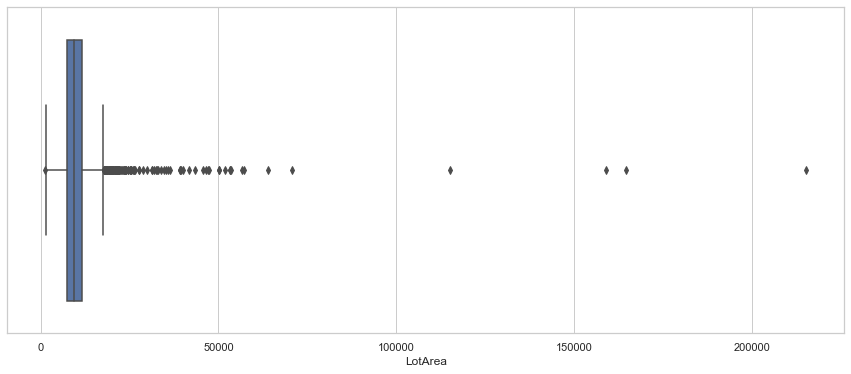

In [136]:
# Detect outliers by boxplot 

boxplot(df,"LotArea")

In [137]:
#LotArea distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"LotArea")

(-13492.874997152216, 33829.10315748109)

In [138]:
# In LotArea more than 33829.10315 value consider as outliers

df.loc[df["LotArea"]>=33829.10315,"LotArea"]=33829.10315

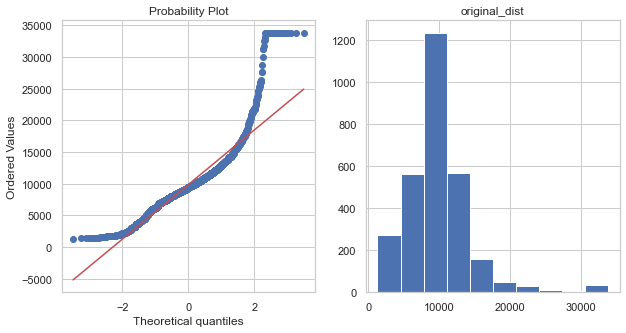

In [139]:
original_dist(df,"LotArea")

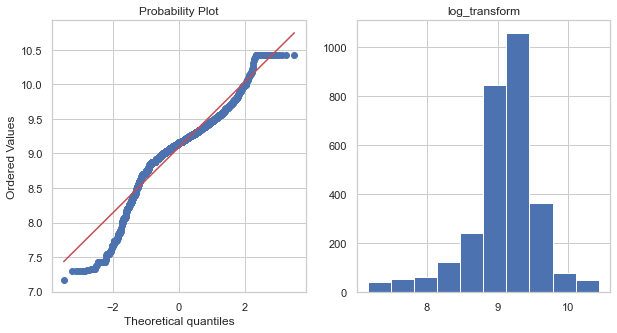

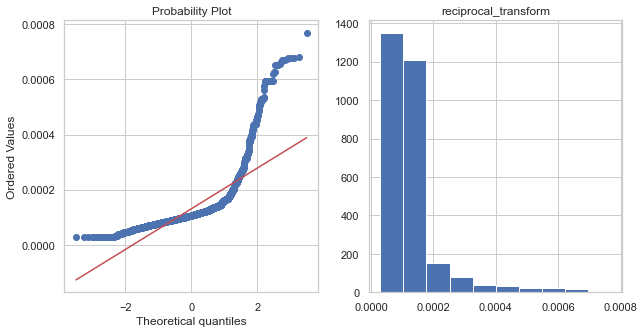

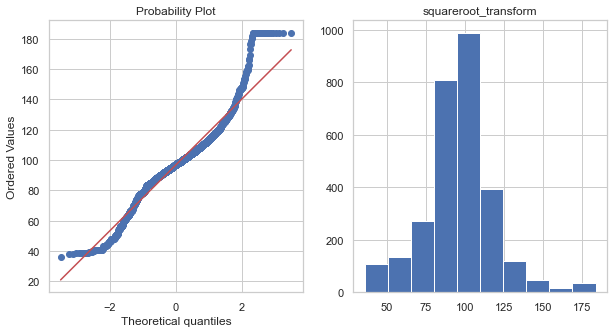

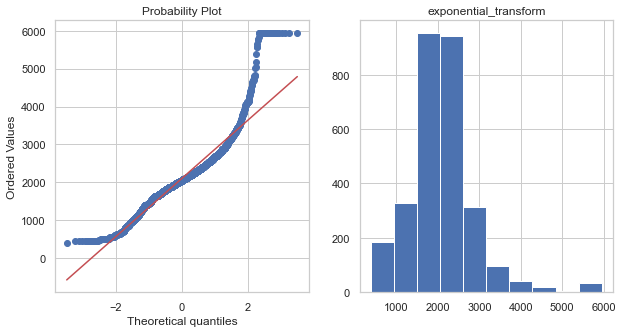

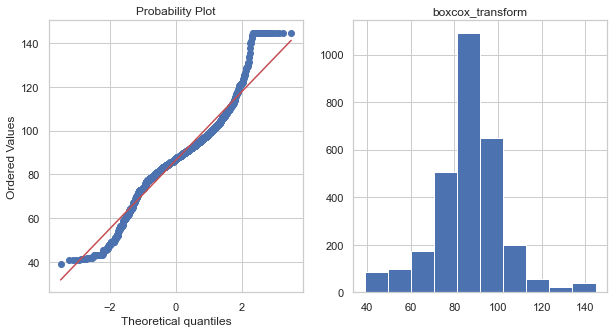

In [140]:
#Apply Some Transformation Techniques on LotArea for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"LotArea")

reciprocal_transform(df,"LotArea")

squareroot_transform(df,"LotArea")

exponential_transform(df,"LotArea")

boxcox_transform(df,"LotArea")

After squareroot and boxcox Transformation LotArea feature seems to more Normally Distributed so apply one transformation on main dataset

In [141]:
# Apply boxcox Transformation on LotArea feature
if 0 in df["LotArea"].unique():
    pass
else:
    df["LotArea"],parameter = stats.boxcox(df["LotArea"])

# MasVnrArea Feature

In [142]:
df[df["MasVnrArea"]==0]

MSSubClass MSZoning  LotFrontage     LotArea Street LotShape  \
1             20       RL    38.539699   87.734482   Pave      Reg   
3             70       RL    30.324434   87.551771   Pave      IR1   
5             50       RL    40.536767  102.296906   Pave      IR1   
8             50       RM    26.483486   73.266201   Pave      Reg   
9            190       RL    26.050037   79.148712   Pave      Reg   
...          ...      ...          ...         ...    ...      ...   
1453         160       RM    12.642979   41.680147   Pave      Reg   
1454         160       RM    12.642979   45.959162   Pave      Reg   
1455         160       RM    12.642979   45.548057   Pave      Reg   
1456          20       RL    60.838075  117.473293   Pave      Reg   
1457          85       RL    31.164470   90.724159   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5            Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
8            Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9            Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
...          ...       ...       ...       ...          ...        ...   
1453         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1          Norm     1Fam     1Story            6            8       1976   
3          Norm     1Fam     2Story            7            5       1915   
5          Norm     1Fam     1.5Fin            5            5       1993   
8          Norm     1Fam     1.5Fin            7            5       1931   
9        Artery   2fmCon     1.5Unf            5            6       1939   
...         ...      ...        ...          ...          ...        ...   
1453       Norm    Twnhs     2Story            4            5       1970   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5             1995     Gable  CompShg     VinylSd     VinylSd       None   
8             1950     Gable  CompShg     BrkFace     Wd Shng       None   
9             1950     Gable  CompShg     MetalSd     MetalSd       None   
...            ...       ...      ...         ...         ...        ...   
1453          1970     Gable  CompShg     CemntBd     CmentBd       None   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1            0.0        TA        TA     CBlock       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
5            0.0        TA        TA       Wood       Gd       TA   
8            0.0        TA        TA     BrkTil       TA       TA   
9            0.0        TA        TA     BrkTil       TA       TA   
...          ...       ...       ...

In [143]:
df["MasVnrArea"].describe()

count    2919.000000
mean      101.396026
std       178.854579
min         0.000000
25%         0.000000
50%         0.000000
75%       163.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

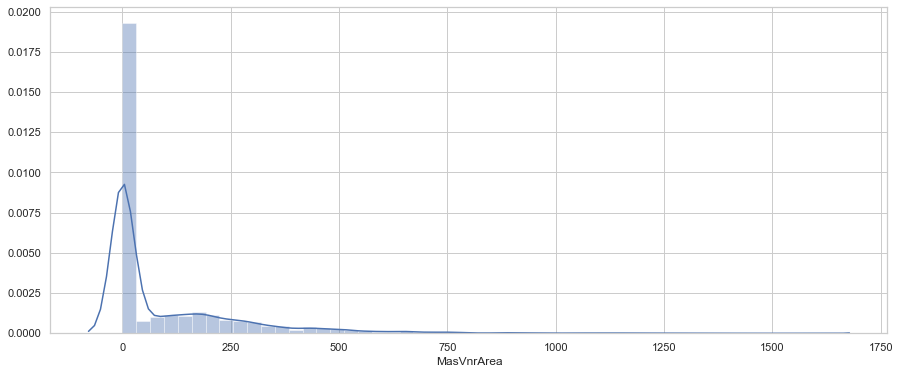

In [144]:
histogram(df,"MasVnrArea")

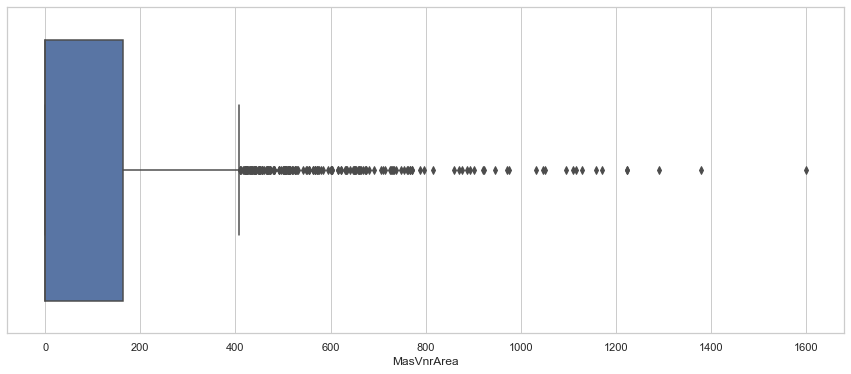

In [145]:
# Detect outliers by boxplot 

boxplot(df,"MasVnrArea")

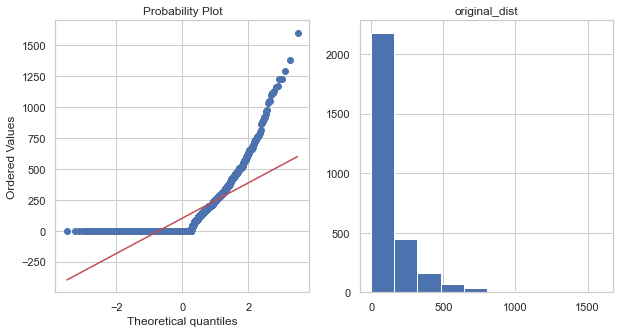

In [146]:
#check Distribution by QQ-plot

original_dist(df,"MasVnrArea")

In [147]:
# MasVnrArea feature is Right skewed ,so detect outliers by 3*IQR

outlier_IQR3(df,"MasVnrArea")

(-490.5, 654.0)

In [148]:
# In MasVnrArea more than 654.0 value consider as outliers

df.loc[df["MasVnrArea"]>=654,"MasVnrArea"]=654

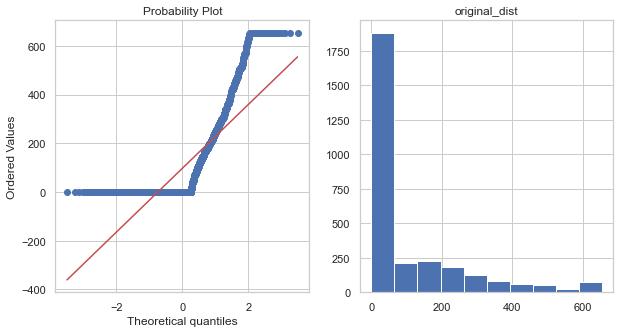

In [149]:
original_dist(df,"MasVnrArea")

# BsmtFinSF1 Feature

In [150]:
df["BsmtFinSF1"].describe()

count    2919.000000
mean      441.272011
std       455.606014
min         0.000000
25%         0.000000
50%       368.000000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

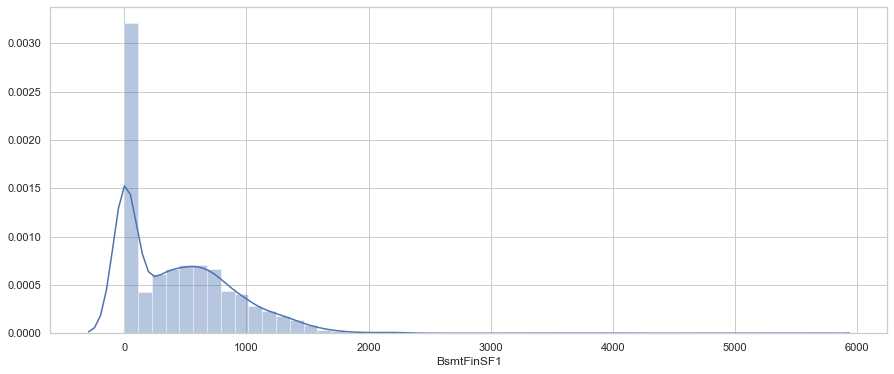

In [151]:
#check Distribution of BsmtFinSF1 feature by Histogram.

histogram(df,"BsmtFinSF1")

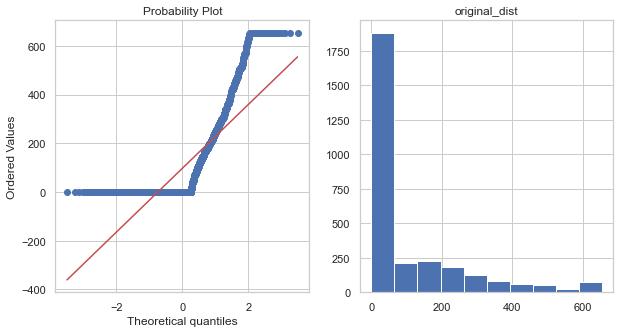

In [152]:
#Check Distribution by QQ-plot
original_dist(df,"MasVnrArea")

In [153]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,'BsmtFinSF1')

(-1099.5, 1832.5)

In [154]:
# In BsmtFinSF1 more than 1832.5 value consider as outliers


df.loc[df["BsmtFinSF1"]>=1832.5,"BsmtFinSF1"]=1832.5

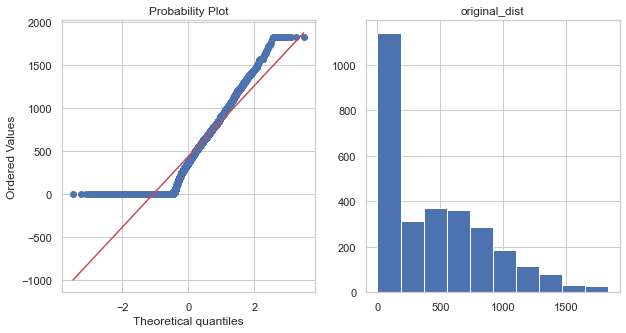

In [155]:
original_dist(df,"BsmtFinSF1")

# BsmtFinSF2 Feature

In [156]:
df["BsmtFinSF2"].describe()

count    2919.000000
mean       49.565262
std       169.179104
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

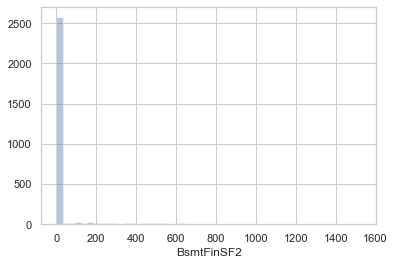

In [157]:
#Check Distribution by Histogram.
sns.distplot(df["BsmtFinSF2"],kde=False)

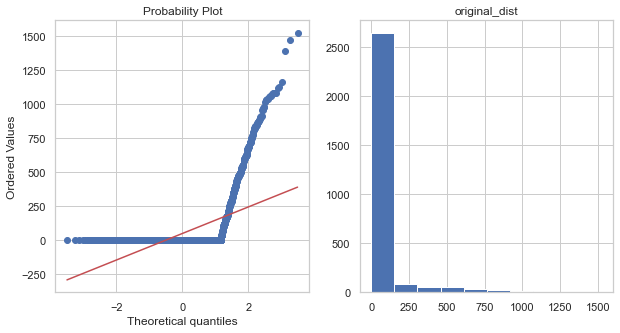

In [158]:
#check Distribution by QQ-plot
original_dist(df,"BsmtFinSF2")

In [159]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"BsmtFinSF2")

(0.0, 0.0)

Because min=0 , 0.25 = 0 so that's why outlier_IQR also 0 , now check by outlier_normally

# BsmtUnfSF Feature

In [160]:
df["BsmtUnfSF"].describe()

count    2919.000000
mean      560.579993
std       439.590889
min         0.000000
25%       220.000000
50%       467.000000
75%       805.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

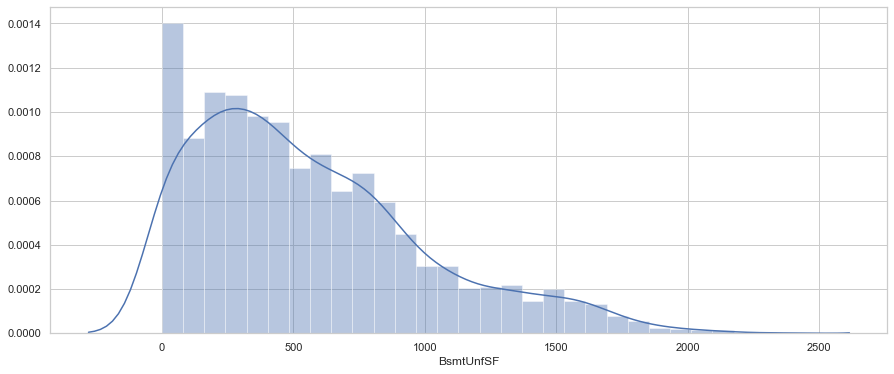

In [161]:
#Check Distribution by Histogram.
histogram(df,"BsmtUnfSF")

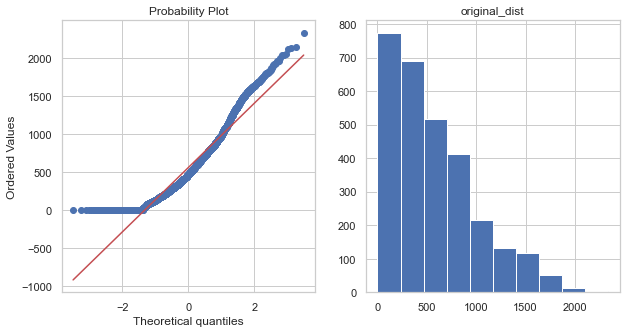

In [162]:
#check Distribution by QQ-plot
original_dist(df,"BsmtUnfSF")

In [163]:
# BsmtFinSF1 feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,"BsmtUnfSF")

(-657.5, 1682.5)

In [164]:
# In BsmtUnfSF more than 1682.5 value consider as outliers


df.loc[df["BsmtUnfSF"]>=1682.5,"BsmtUnfSF"] =1682.5

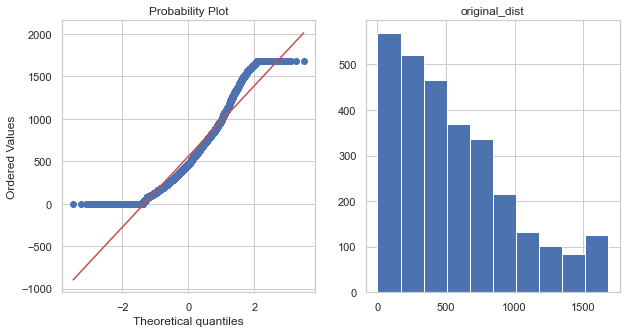

In [165]:
original_dist(df,"BsmtUnfSF")

# TotalBsmtSF Feature

In [166]:
df["TotalBsmtSF"].describe()

count    2919.000000
mean     1051.417266
std       441.120498
min         0.000000
25%       793.000000
50%       989.000000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

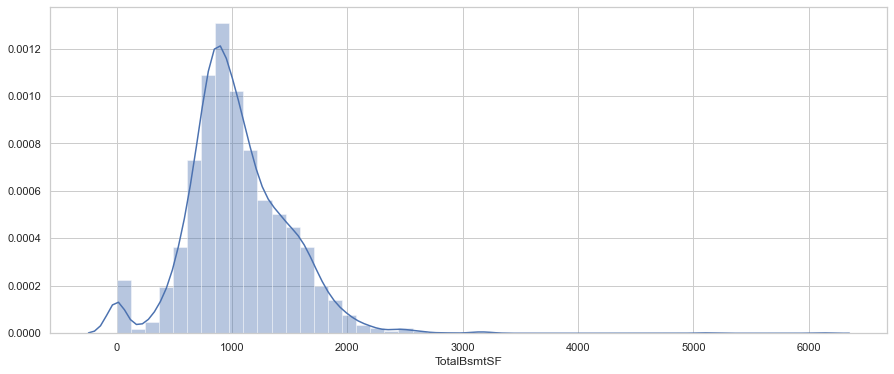

In [167]:
#check Distribution by Histogram.

histogram(df,"TotalBsmtSF")

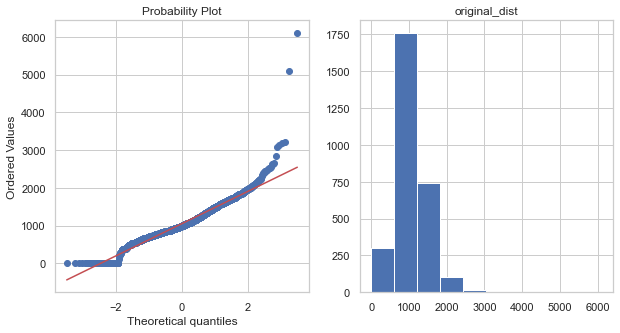

In [168]:
#check Distribution by QQ-plot.

original_dist(df,"TotalBsmtSF")

In [169]:
#TotalBsmtSF distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"TotalBsmtSF")

(-271.9442285010207, 2374.7787608751214)

In [170]:
# In BsmtUnfSF more than 2374.77 value consider as outliers

df.loc[df["TotalBsmtSF"]>=2374.77,"TotalBsmtSF"] =2374.77

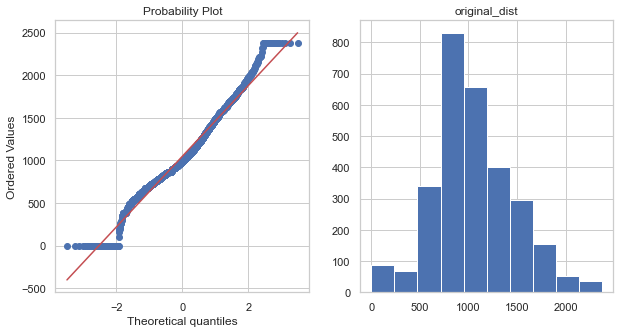

In [171]:
original_dist(df,"TotalBsmtSF")

# 1stFlrSF Feature

In [172]:
df["1stFlrSF"].describe()

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
25%       876.000000
50%      1082.000000
75%      1387.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64

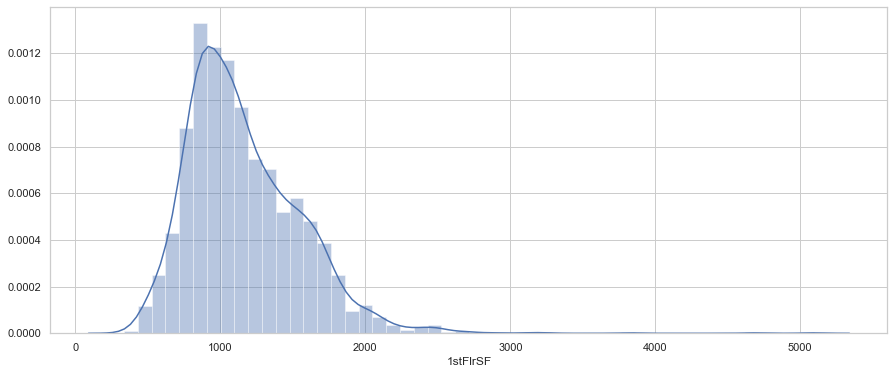

In [173]:
#check Distribution by Histogram.

histogram(df,"1stFlrSF")

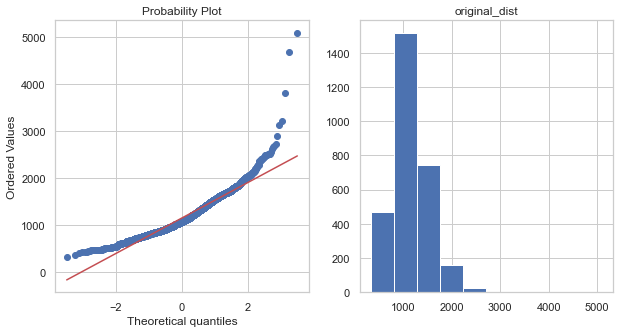

In [174]:
#check Distribution by QQ-plot.

original_dist(df,"1stFlrSF")

In [175]:
#1stFlrSF distribution seems to normally distributed. so detect outliers (by mean-+3std)
outlier_normally(df,"1stFlrSF")

(-17.50452993604881, 2336.66794206349)

In [176]:
# In 1stFlrSF more than 2336.667 value consider as outliers

df.loc[df["1stFlrSF"]>=2336.667,"1stFlrSF"]=2336.667

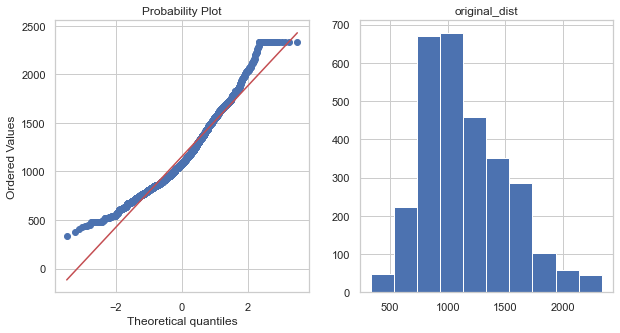

In [177]:
original_dist(df,"1stFlrSF")

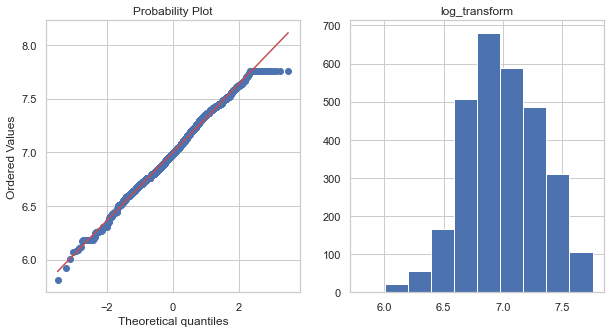

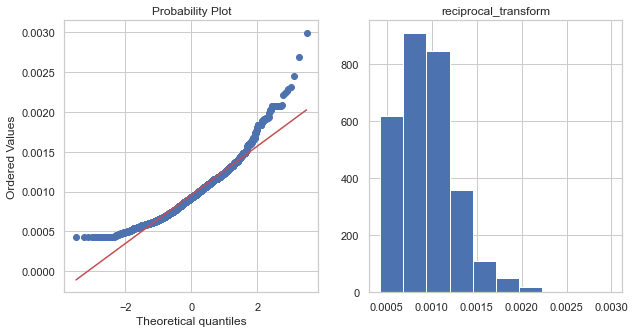

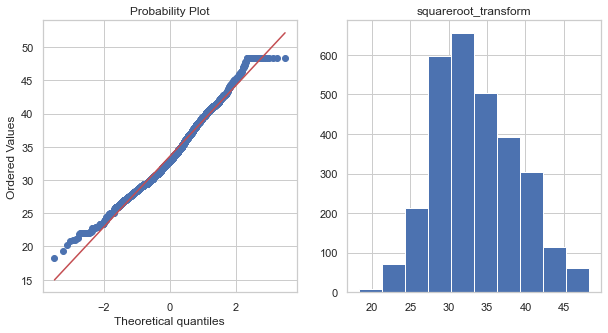

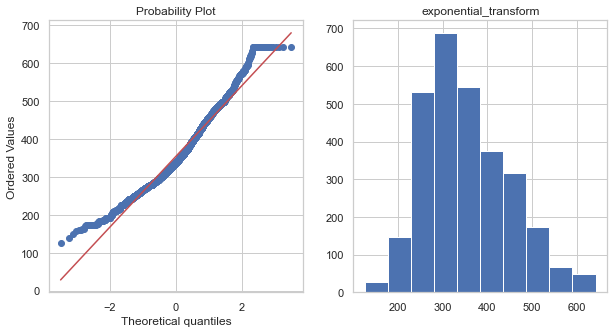

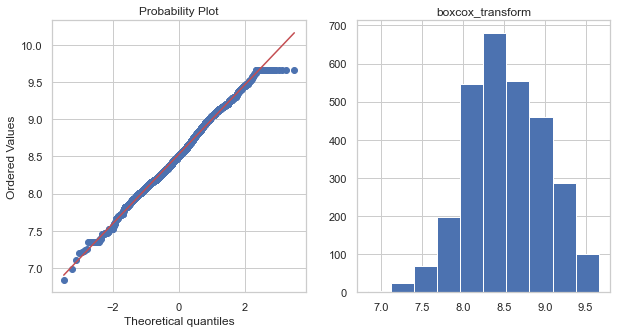

In [178]:
#Apply Some Transformation Techniques on 1stFlrSF for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"1stFlrSF")

reciprocal_transform(df,"1stFlrSF")

squareroot_transform(df,"1stFlrSF")

exponential_transform(df,"1stFlrSF")

boxcox_transform(df,"1stFlrSF")

After boxcox Transformation 1stFlrSF feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset

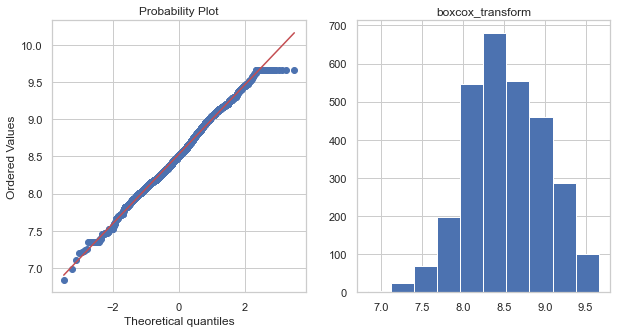

In [179]:
if 0 in df["1stFlrSF"].unique():
    pass
else:
    df["1stFlrSF"],parameter = stats.boxcox(df["1stFlrSF"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df["1stFlrSF"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    df["1stFlrSF"].hist()
    plt.title("boxcox_transform")

# 2ndFlrSF Feature

In [180]:
df["2ndFlrSF"].describe()

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
25%         0.000000
50%         0.000000
75%       704.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

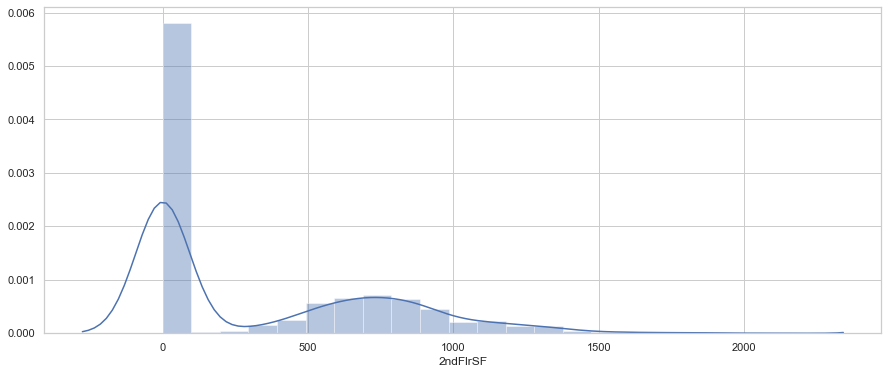

In [181]:
#check Distribution by Histogram.

histogram(df,"2ndFlrSF")

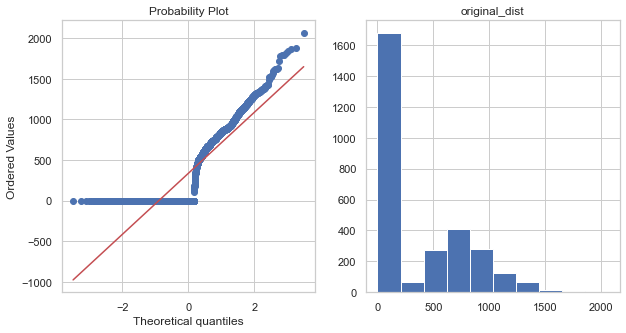

In [182]:
original_dist(df,"2ndFlrSF")

In [183]:
# 2ndFlrSF feature is right skewed so detect ouliers by 1.5*IQR

outlier_IQR(df,"2ndFlrSF")

(-1056.0, 1760.0)

In [184]:
# In 2ndFlrSF more than 1760 value consider as outliers

df.loc[df["2ndFlrSF"]>=1760,"2ndFlrSF"]=1760

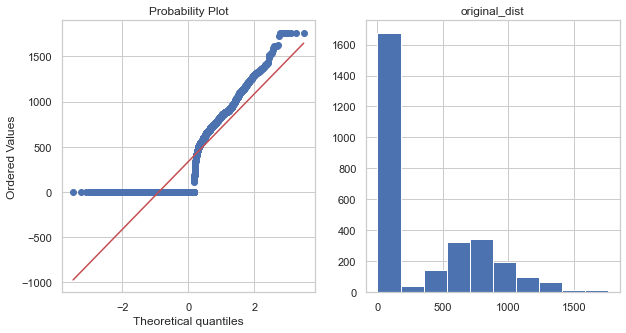

In [185]:
original_dist(df,"2ndFlrSF")

# LowQualFinSF Feature

In [186]:
df["LowQualFinSF"].describe()

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64

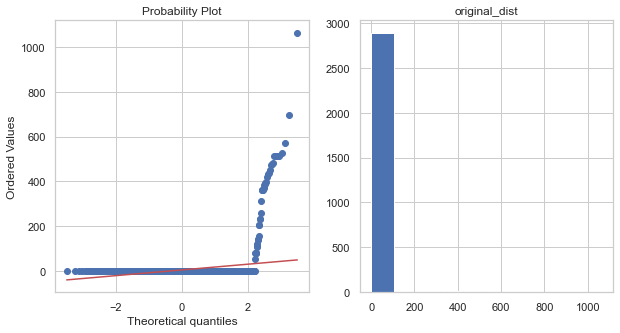

In [187]:
original_dist(df,"LowQualFinSF")

In [188]:
outlier_normally(df,"LowQualFinSF")

(-134.49605765367193, 143.88488944538142)

In [189]:
# In LowQualFinSF more than 143.88 value consider as outliers

df.loc[df["LowQualFinSF"]>=143.88,"LowQualFinSF"]=143.88

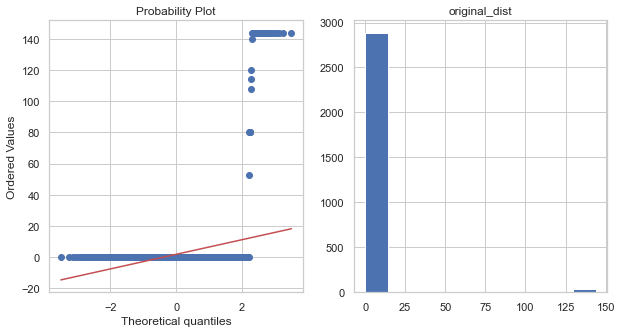

In [190]:
original_dist(df,"LowQualFinSF")

# GrLivArea Feature

In [191]:
df["GrLivArea"].describe()

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1743.500000
max      5642.000000
Name: GrLivArea, dtype: float64

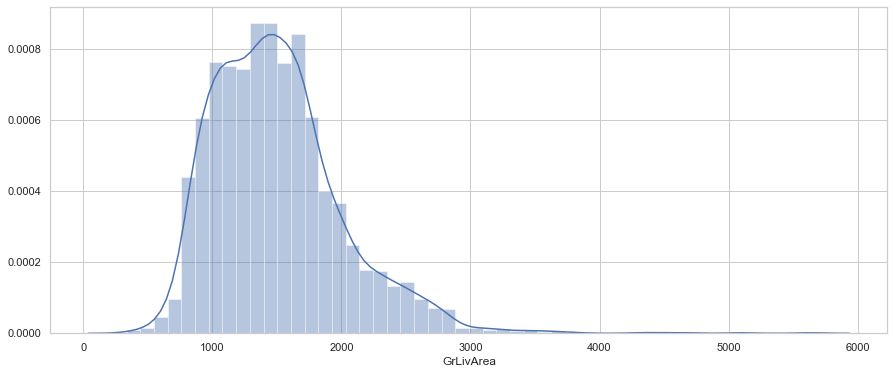

In [192]:
#check Distribution by Histogram.

histogram(df,"GrLivArea")

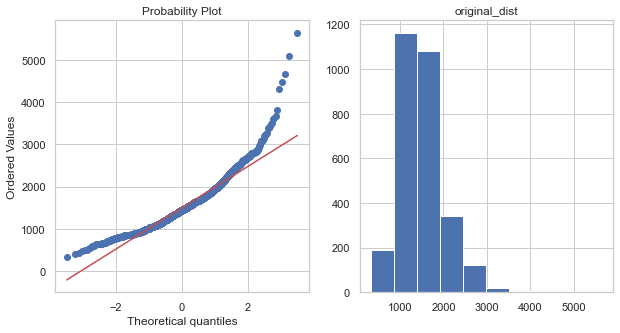

In [193]:
#check distribution by qq-plot
original_dist(df,"GrLivArea")

In [194]:
#GrLivArea distribution seems to normally distributed. so detect outliers (by mean-+3std)

outlier_normally(df,"GrLivArea")

(-17.393286091574055, 3018.912984618467)

In [195]:
# In GrLivArea more than 3018.91 value consider as outliers

df.loc[df["GrLivArea"]>=3018.91,"GrLivArea"]=3018.91

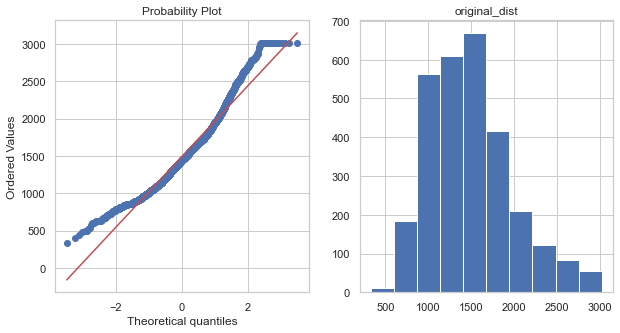

In [196]:
original_dist(df,"GrLivArea")

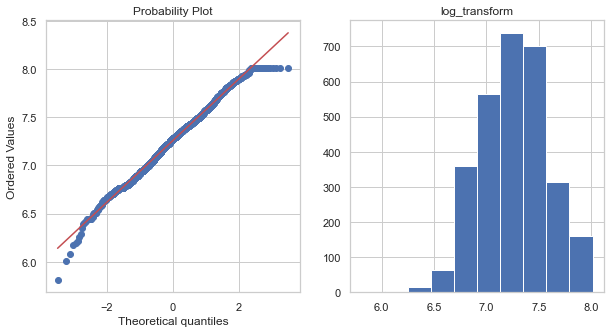

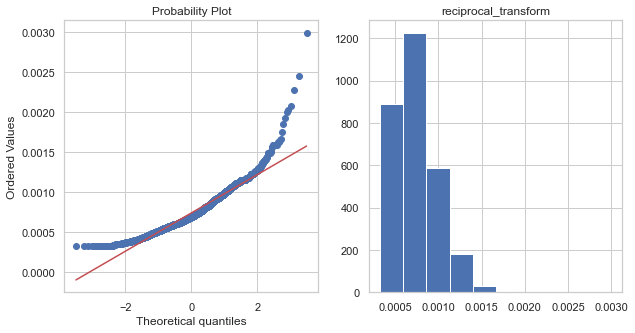

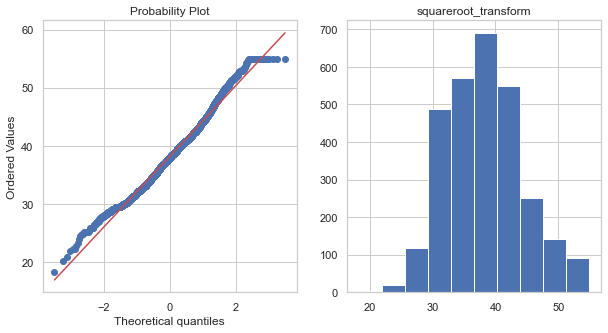

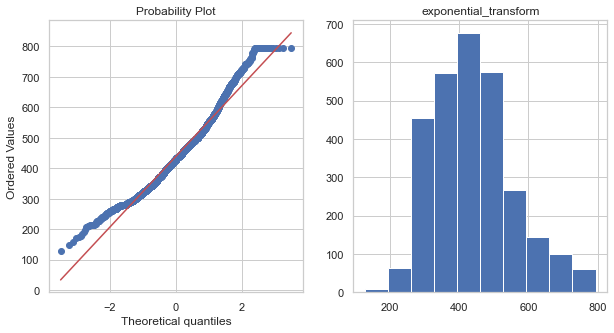

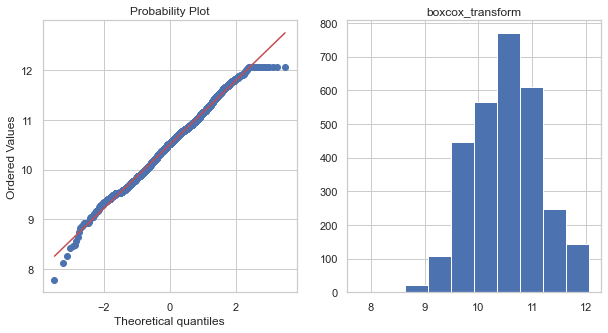

In [197]:
#Apply Some Transformation Techniques on GrLivArea for make distribution as Normally Distributed and check Distribution by QQ plot.

log_transform(df,"GrLivArea")

reciprocal_transform(df,"GrLivArea")

squareroot_transform(df,"GrLivArea")

exponential_transform(df,"GrLivArea")

boxcox_transform(df,"GrLivArea")

After boxcox Transformation GrLivArea feature seems more Normally Distributed so apply boxcox Transformation on Main Dataset.

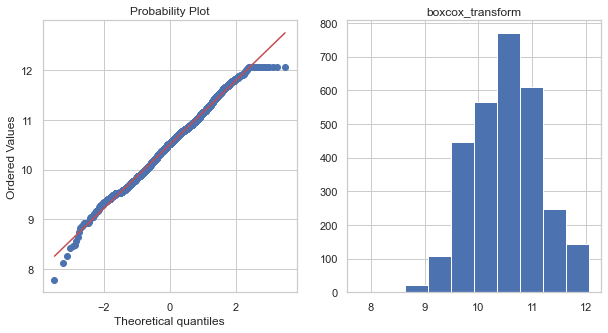

In [198]:
if 0 in df["GrLivArea"].unique():
    pass
else:
    df["GrLivArea"],parameter = stats.boxcox(df["GrLivArea"])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(df["GrLivArea"],dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    df["GrLivArea"].hist()
    plt.title("boxcox_transform")

# GarageArea Feature

In [199]:
df["GarageArea"].describe()

count    2919.000000
mean      472.712573
std       215.535686
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

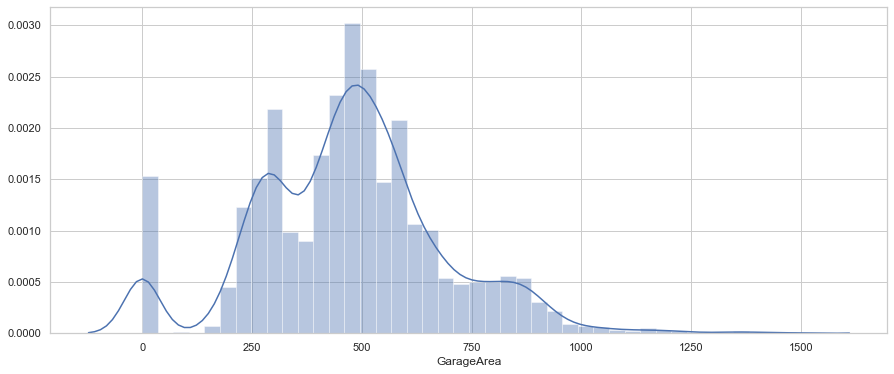

In [200]:
#check Distribution by Histogram.

histogram(df,"GarageArea")

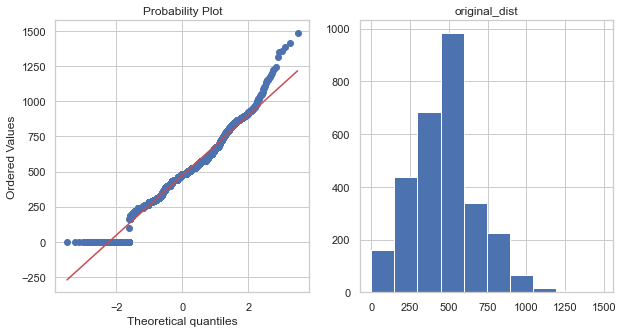

In [201]:
#check distribution by qq-plot
original_dist(df,"GarageArea")

In [202]:
#GarageArea distribution seems to normally distributed. so detect outliers (by mean-+3std)

outlier_normally(df,"GarageArea")

(-173.89448484130838, 1119.3196304391158)

In [203]:
# In GarageArea more than  1119.31 value consider as outliers

df.loc[df["GarageArea"]>= 1119.31,"GarageArea"] =  1119.31

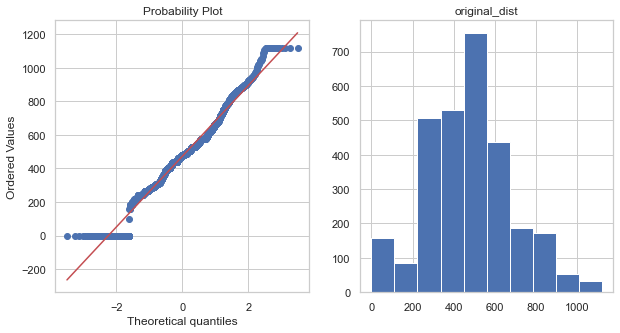

In [204]:
original_dist(df,"GarageArea")

# WoodDeckSF Feature

In [205]:
df['WoodDeckSF'].describe()

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64

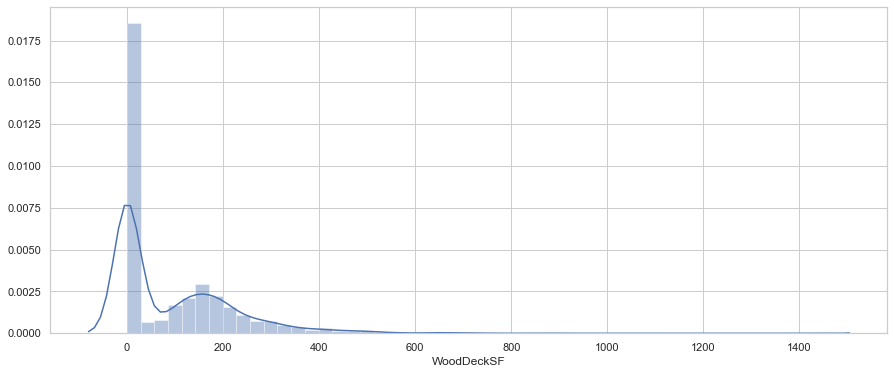

In [206]:
#check Distribution by Histogram.

histogram(df,"WoodDeckSF")

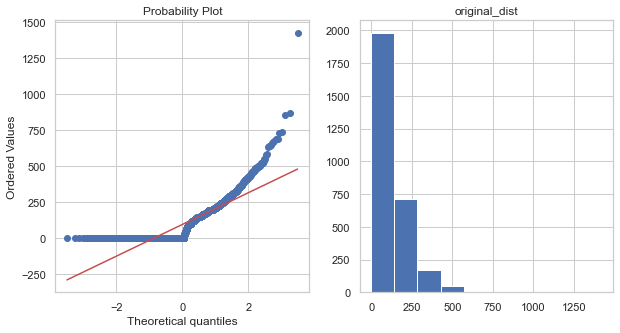

In [207]:
#check Distribution by qq-plot

original_dist(df,"WoodDeckSF")

In [208]:
# WoodDeckSF feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"WoodDeckSF")

(-504.0, 672.0)

In [209]:
# In WoodDeckSF more than 672.0 value consider as outliers

df.loc[df["WoodDeckSF"]>=672.0,"WoodDeckSF"] = 672.0

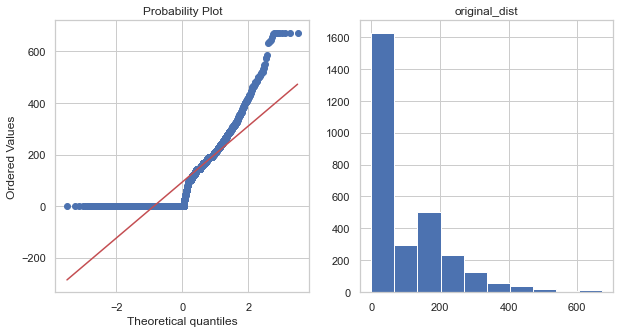

In [210]:
original_dist(df,"WoodDeckSF")

# OpenPorchSF feature

In [211]:
df['OpenPorchSF'].describe()

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: OpenPorchSF, dtype: float64

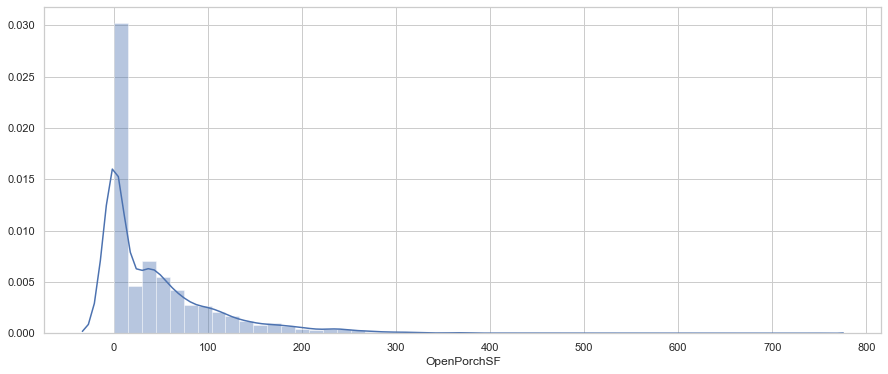

In [212]:
#check Distribution by Histogram.

histogram(df,"OpenPorchSF")

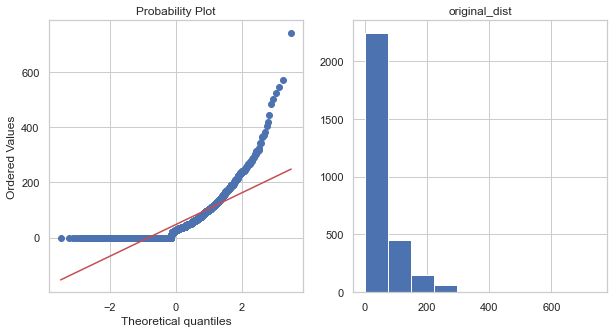

In [213]:
#check Distribution by qq-plot

original_dist(df,"OpenPorchSF")

In [214]:
# OpenPorchSF feature is right skewed so detect ouliers by 3*IQR

outlier_IQR3(df,"OpenPorchSF")

(-210.0, 280.0)

In [215]:
# In OpenPorchSF more than 280.0 value consider as outliers

df.loc[df["OpenPorchSF"]>=280.0,"OpenPorchSF"] = 280.0

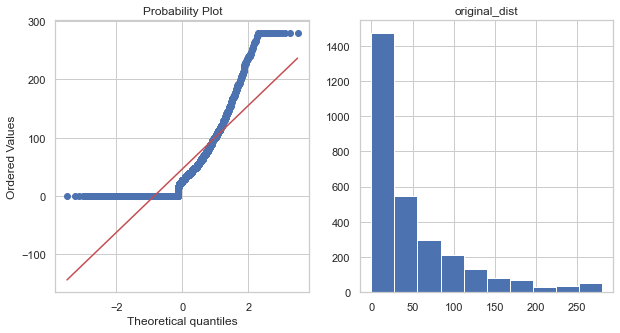

In [216]:
original_dist(df,"OpenPorchSF")

# EnclosedPorch Feature

In [217]:
df['EnclosedPorch'].describe()

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64

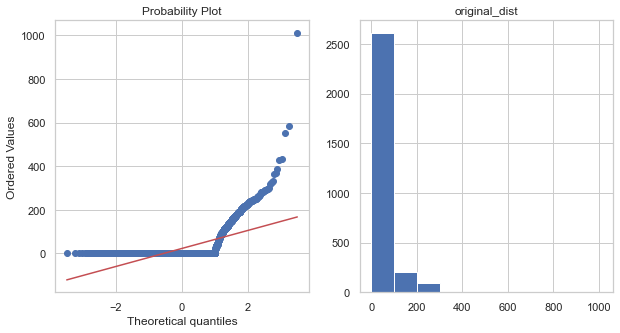

In [218]:
#check Distribution by qq-plot

original_dist(df,"EnclosedPorch")

In [219]:
outlier_normally(df,"EnclosedPorch")

(-169.6344154349743, 215.83105812082562)

In [220]:
# In EnclosedPorch more than215.831 value consider as outliers

df.loc[df["EnclosedPorch"]>=215.831,"EnclosedPorch"] = 215.831

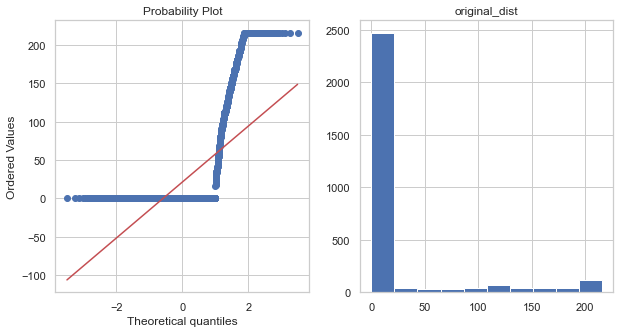

In [221]:
original_dist(df,"EnclosedPorch")

# 3SsnPorch Feature

In [222]:
df['3SsnPorch'].describe()

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

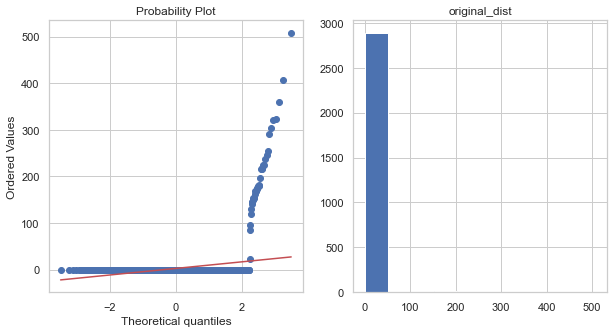

In [223]:
#check Distribution by qq-plot

original_dist(df,"3SsnPorch")

In [224]:
outlier_normally(df,"3SsnPorch")

(-72.96224694518752, 78.16676904179594)

In [225]:
# In 3SsnPorch more than 78.1667 value consider as outliers

df.loc[df["3SsnPorch"] >= 78.1667,"3SsnPorch"] = 78.1667

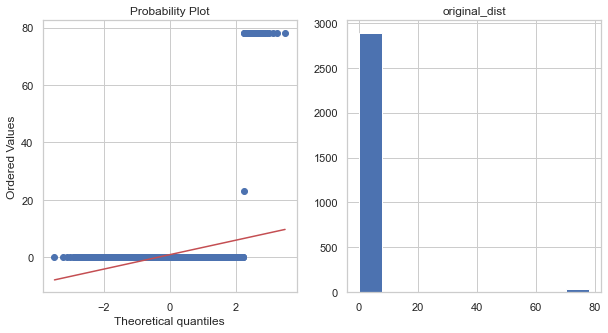

In [226]:
original_dist(df,"3SsnPorch")

# ScreenPorch Feature

In [227]:
df['ScreenPorch'].describe()

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

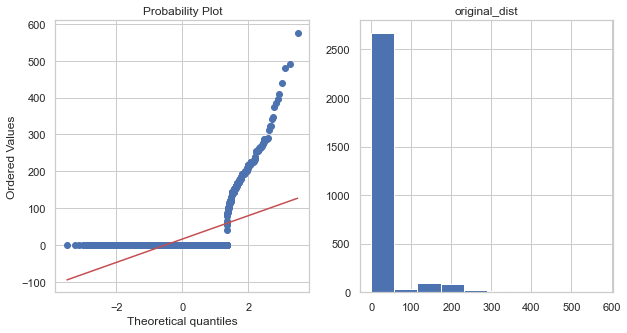

In [228]:
#check Distribution by qq-plot

original_dist(df,"ScreenPorch")

In [229]:
outlier_normally(df,"ScreenPorch")

(-152.49074521217938, 184.6154454519875)

In [230]:
# In ScreenPorch more than 184.61 value consider as outliers

df.loc[df["ScreenPorch"] >= 184.61,"ScreenPorch"] = 184.61

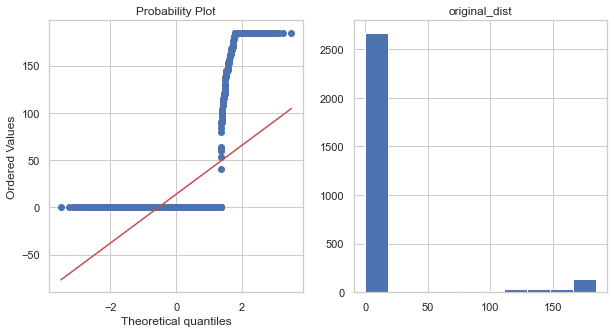

In [231]:
original_dist(df,"ScreenPorch")

# PoolArea feature

In [232]:
df['PoolArea'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

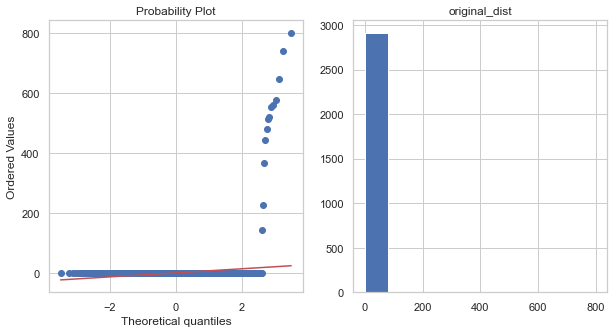

In [233]:
#check Distribution by qq-plot

original_dist(df,"PoolArea")

In [234]:
outlier_normally(df,"PoolArea")

(-104.74003933531296, 109.24363645761511)

In [235]:
# In PoolArea more than 109.243 value consider as outliers

df.loc[df["PoolArea"] >= 109.243,"PoolArea"] = 109.2437

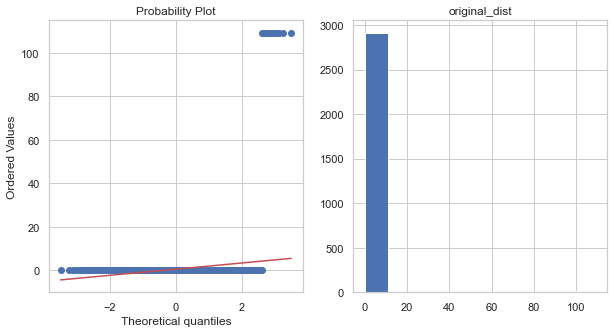

In [236]:
original_dist(df,"PoolArea")

# MiscVal Feature

In [237]:
df['MiscVal'].describe()

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

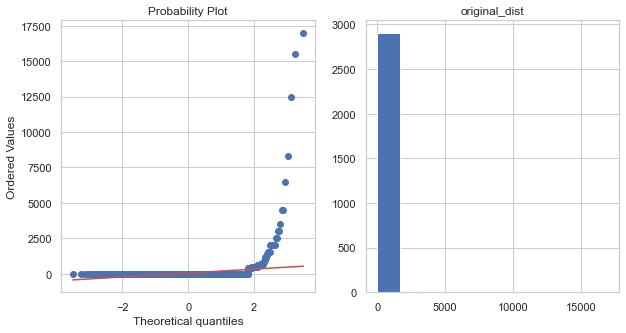

In [238]:
#check Distribution by qq-plot

original_dist(df,"MiscVal")

In [239]:
outlier_normally(df,"MiscVal")

(-1651.380663853399, 1753.0325994477805)

In [240]:
# In MiscVal more than 1753.032 value consider as outliers

df.loc[df["MiscVal"] >= 1753.032,"MiscVal"] = 1753.032

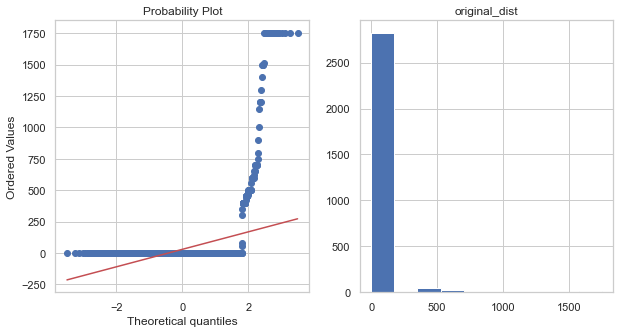

In [241]:
original_dist(df,"MiscVal")

In [242]:
numerical_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Encoding on Categorical Features

In [243]:
categorical_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [244]:
# Assing ordinal and nominal categorical features in different variables.
ordinal_features = ['Alley','Street', 'LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'LandContour', 'ExterCond', 
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
                    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType','GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence']


nominal_features = ['LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'MiscFeature','SaleType', 
                    'SaleCondition', 'MSZoning', 'BldgType','MiscFeature']


# Handle ordinal_features

In [245]:
# Street column has  contain Ordianl values
Street = {'Grvl': 1, 'Pave': 2}
df["Street"] = df["Street"].map(Street)

In [246]:
# LotShape column has  contain Ordianl values
Lot_Shape = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
df["LotShape"] = df["LotShape"].map(Lot_Shape)

In [247]:
# Utilities column has  contain Ordianl values
Utilities = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
df["Utilities"] = df["Utilities"].map(Utilities)

In [248]:
# LandSlope column has  contain Ordianl values
Land_Slope = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
df["LandSlope"] = df["LandSlope"].map(Land_Slope)

In [249]:
# LandContour column has  contain Ordianl values
Land_Contour = {'Low': 1, 'HLS':2 , 'Bnk': 3, 'Lvl': 4}
df["LandContour"] = df["LandContour"].map(Land_Contour)

In [250]:
# CentralAir column has  contain Ordianl values
Central_Air = {'N': 1, 'Y': 2}
df["CentralAir"] = df["CentralAir"].map(Central_Air)

In [251]:
# Electrical column has  contain Ordianl values
Electrical = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}
df["Electrical"] = df["Electrical"].map(Electrical)

In [252]:
# Functional column has  contain Ordianl values
Functional =  {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
df["Functional"] = df["Functional"].map(Functional)

In [253]:
# GarageType column has  contain Ordianl values
Garage_Type =  {'No Garage': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6}
df["GarageType"] = df["GarageType"].map(Garage_Type)

In [254]:
# PavedDrive column has  contain Ordianl values
Paved_Drive =  {'N': 1, 'P': 2, 'Y': 3}
df["PavedDrive"] = df["PavedDrive"].map(Paved_Drive)

In [255]:
# ExterQual column has  contain Ordianl values
Exterior_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'NA':0}
df["ExterQual"] = df["ExterQual"].map(Exterior_Quality)

In [256]:
# ExterCond column has  contain Ordianl values
Exterior_condition = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'NA':0}
df["ExterCond"] = df["ExterCond"].map(Exterior_condition)

In [257]:
# BsmtQual column has  contain Ordianl values
Bsmt_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1, 'No Basement':0}
df["BsmtQual"] = df["BsmtQual"].map(Bsmt_Quality)

In [258]:
# BsmtCond column has  contain Ordianl values
Bsmt_condition = {'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Basement':0}
df["BsmtCond"] = df["BsmtCond"].map(Bsmt_condition)

In [259]:
# BsmtExposure column has  contain Ordianl values
Bsmt_Exposure = {'Gd':4 ,'Av':3,'Mn':2,'No':1, 'No Basement':0}
df["BsmtExposure"] = df["BsmtExposure"].map(Bsmt_Exposure)

In [260]:
# BsmtFinType1 column has  contain Ordianl values
Bsmt_FinType1 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'No Basement':0}
df["BsmtFinType1"] = df["BsmtFinType1"].map(Bsmt_FinType1)

In [261]:
# BsmtFinType2 column has  contain Ordianl values
Bsmt_FinType2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'No Basement':0}
df["BsmtFinType2"] = df["BsmtFinType2"].map(Bsmt_FinType2)

In [262]:
# HeatingQC column has  contain Ordianl values
Heating_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1}
df["HeatingQC"] = df["HeatingQC"].map(Heating_Quality)

In [263]:
# KitchenQual column has  contain Ordianl values
Kitchen_Quality = {'Ex':4 ,'Gd':3,'TA':2 ,'Fa':1}
df["KitchenQual"] = df["KitchenQual"].map(Kitchen_Quality)

In [264]:
# FireplaceQu column has  contain Ordianl values
Fireplace_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Fireplace':0}
df["FireplaceQu"] = df["FireplaceQu"].map(Fireplace_Quality)

In [265]:
# GarageFinish column has  contain Ordianl values
Garage_Finish = {'RFn':2, 'Unf':1 ,'Fin':3, 'No Garage':0}
df["GarageFinish"] = df["GarageFinish"].map(Garage_Finish)

In [266]:
# GarageQual column has  contain Ordianl values
Garage_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Garage':0}
df["GarageQual"] = df["GarageQual"].map(Garage_Quality)

In [267]:
# GarageCond column has  contain Ordianl values
Garage_Cond = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Garage':0}
df["GarageCond"] = df["GarageCond"].map(Garage_Cond)

# Alley column has  contain Ordianl values
Alley = {'No Alley': 0, 'Grvl': 1, 'Pave': 2}
df["Alley"] = df["Alley"].map(Alley)

# PoolQC column has  contain Ordianl values
Pool_Quality = {'Ex':5 ,'Gd':4,'TA':3 ,'Fa':2, "Po":1, 'No Pool':0}
df["PoolQC"] = df["PoolQC"].map(Pool_Quality)

# Fence column has  contain Ordianl values
Fence = {'GdPrv':4 ,'MnPrv':3,'GdWo':2 ,'MnWw':1, 'No Fence':0}
df["Fence"] = df["Fence"].map(Fence)

In [268]:
continuous_features = ['LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','FireplaceQu', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea']

In [269]:
#Rest of Categorical features change into Dummies variables.

df = pd.get_dummies(df)
df

MSSubClass  LotFrontage     LotArea  Street  LotShape  LandContour  \
0             60    32.416127   83.374247       2         4            4   
1             20    38.539699   87.734482       2         4            4   
2             60    33.658190   93.463938       2         3            4   
3             70    30.324434   87.551771       2         3            4   
4             60    40.138956  102.713412       2         3            4   
...          ...          ...         ...     ...       ...          ...   
1454         160    12.642979   45.959162       2         4            4   
1455         160    12.642979   45.548057       2         4            4   
1456          20    60.838075  117.473293       2         4            4   
1457          85    31.164470   90.724159       2         4            4   
1458          60    36.115456   87.832904       2         4            4   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             4          3            7            5       2003          2003   
1             4          3            6            8       1976          1976   
2             4          3            7            5       2001          2002   
3             4          3            7            5       1915          1970   
4             4          3            8            5       2000          2000   
...         ...        ...          ...          ...        ...           ...   
1454          4          3            4            7       1970          1970   
1455          4          3            4            5       1970          1970   
1456          4          3            5            7       1960          1996   
1457          4          3            5            5       1992          1992   
1458          4          2            7            5       1993          1994   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0          3          3         3         3             1   
1            0.0          2          3         3         3             4   
2          162.0          3          3         3         3             2   
3            0.0          2          3         2         4             1   
4          350.0          3          3         3         3             3   
...          ...        ...        ...       ...       ...           ...   
1454         0.0          2          3         2         3             1   
1455         0.0          2          3         2         3             1   
1456         0.0          2          3         2         3             1   
1457         0.0          2          3         3         3             3   
1458        94.0          2          3         3         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0                6       706.0             1         0.0      150.0   
1                5       978.0             1         0.0      284.0   
2                6       486.0             1         0.0      434.0   
3                5       216.0             1         0.0      540.0   
4                6       655.0             1         0.0      490.0   
...            ...         ...           ...         ...        ...   
1454             1         0.0             1         0.0      546.0   
1455             3       252.0             1         0.0      294.0   
1456             5      1224.0             1         0.0        0.0   
1457             6       337.0             1         0.0      575.0   
1458             2       758.0             1         0.0      238.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0           856.0          5           2           5  8.166534       854   
1          1262.0          5           2           5  8.733954         0   
2           920.0          5           2           5  8.271021       866   
3           756.0          4           2          

# Split Train and Test Datasets

In [270]:
train = df.iloc[:1460,:]
train

MSSubClass  LotFrontage     LotArea  Street  LotShape  LandContour  \
0             60    32.416127   83.374247       2         4            4   
1             20    38.539699   87.734482       2         4            4   
2             60    33.658190   93.463938       2         3            4   
3             70    30.324434   87.551771       2         3            4   
4             60    40.138956  102.713412       2         3            4   
...          ...          ...         ...     ...       ...          ...   
1455          60    31.164470   81.229641       2         4            4   
1456          20    40.536767   99.531045       2         4            4   
1457          70    32.831189   85.661289       2         4            4   
1458          20    33.658190   88.159761       2         4            4   
1459          20    36.521706   88.951019       2         4            4   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             4          3            7            5       2003          2003   
1             4          3            6            8       1976          1976   
2             4          3            7            5       2001          2002   
3             4          3            7            5       1915          1970   
4             4          3            8            5       2000          2000   
...         ...        ...          ...          ...        ...           ...   
1455          4          3            6            5       1999          2000   
1456          4          3            6            6       1978          1988   
1457          4          3            7            9       1941          2006   
1458          4          3            5            6       1950          1996   
1459          4          3            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0          196.0          3          3         3         3             1   
1            0.0          2          3         3         3             4   
2          162.0          3          3         3         3             2   
3            0.0          2          3         2         4             1   
4          350.0          3          3         3         3             3   
...          ...        ...        ...       ...       ...           ...   
1455         0.0          2          3         3         3             1   
1456       119.0          2          3         3         3             1   
1457         0.0          4          4         2         4             1   
1458         0.0          2          3         2         3             2   
1459         0.0          3          3         2         3             1   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0                6       706.0             1         0.0      150.0   
1                5       978.0             1         0.0      284.0   
2                6       486.0             1         0.0      434.0   
3                5       216.0             1         0.0      540.0   
4                6       655.0             1         0.0      490.0   
...            ...         ...           ...         ...        ...   
1455             1         0.0             1         0.0      953.0   
1456             5       790.0             3       163.0      589.0   
1457             6       275.0             1         0.0      877.0   
1458             6        49.0             3      1029.0        0.0   
1459             4       830.0             2       290.0      136.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0           856.0          5           2           5  8.166534       854   
1          1262.0          5           2           5  8.733954         0   
2           920.0          5           2           5  8.271021       866   
3           756.0          4           2          

In [271]:
test= df.iloc[1460:,:]
test

MSSubClass  LotFrontage     LotArea  Street  LotShape  LandContour  \
0             20    38.539699   94.683303       2         4            4   
1             20    38.940738  102.733454       2         3            4   
2             60    36.115456  101.470556       2         3            4   
3             60    37.735100   89.097292       2         3            4   
4            120    22.973317   67.575250       2         3            2   
...          ...          ...         ...     ...       ...          ...   
1454         160    12.642979   45.959162       2         4            4   
1455         160    12.642979   45.548057       2         4            4   
1456          20    60.838075  117.473293       2         4            4   
1457          85    31.164470   90.724159       2         4            4   
1458          60    36.115456   87.832904       2         4            4   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             4          3            5            6       1961          1961   
1             4          3            6            6       1958          1958   
2             4          3            5            5       1997          1998   
3             4          3            6            6       1998          1998   
4             4          3            8            5       1992          1992   
...         ...        ...          ...          ...        ...           ...   
1454          4          3            4            7       1970          1970   
1455          4          3            4            5       1970          1970   
1456          4          3            5            7       1960          1996   
1457          4          3            5            5       1992          1992   
1458          4          2            7            5       1993          1994   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0            0.0          2          3         2         3             1   
1          108.0          2          3         2         3             1   
2            0.0          2          3         3         3             1   
3           20.0          2          3         2         3             1   
4            0.0          3          3         3         3             1   
...          ...        ...        ...       ...       ...           ...   
1454         0.0          2          3         2         3             1   
1455         0.0          2          3         2         3             1   
1456         0.0          2          3         2         3             1   
1457         0.0          2          3         3         3             3   
1458        94.0          2          3         3         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0                3       468.0             2       144.0      270.0   
1                5       923.0             1         0.0      406.0   
2                6       791.0             1         0.0      137.0   
3                6       602.0             1         0.0      324.0   
4                5       263.0             1         0.0     1017.0   
...            ...         ...           ...         ...        ...   
1454             1         0.0             1         0.0      546.0   
1455             3       252.0             1         0.0      294.0   
1456             5      1224.0             1         0.0        0.0   
1457             6       337.0             1         0.0      575.0   
1458             2       758.0             1         0.0      238.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0           882.0          3           2           5  8.232668         0   
1          1329.0          3           2           5  8.810481         0   
2           928.0          4           2           5  8.283596       701   
3           926.0          5           2          

In [272]:
#Split Independent features and Dependent features from train dataset.
df_x = train.drop(["SalePrice"],axis=1)
df_y = train["SalePrice"]

In [273]:
test= test.drop(["SalePrice"],axis=1)
test

MSSubClass  LotFrontage     LotArea  Street  LotShape  LandContour  \
0             20    38.539699   94.683303       2         4            4   
1             20    38.940738  102.733454       2         3            4   
2             60    36.115456  101.470556       2         3            4   
3             60    37.735100   89.097292       2         3            4   
4            120    22.973317   67.575250       2         3            2   
...          ...          ...         ...     ...       ...          ...   
1454         160    12.642979   45.959162       2         4            4   
1455         160    12.642979   45.548057       2         4            4   
1456          20    60.838075  117.473293       2         4            4   
1457          85    31.164470   90.724159       2         4            4   
1458          60    36.115456   87.832904       2         4            4   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             4          3            5            6       1961          1961   
1             4          3            6            6       1958          1958   
2             4          3            5            5       1997          1998   
3             4          3            6            6       1998          1998   
4             4          3            8            5       1992          1992   
...         ...        ...          ...          ...        ...           ...   
1454          4          3            4            7       1970          1970   
1455          4          3            4            5       1970          1970   
1456          4          3            5            7       1960          1996   
1457          4          3            5            5       1992          1992   
1458          4          2            7            5       1993          1994   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0            0.0          2          3         2         3             1   
1          108.0          2          3         2         3             1   
2            0.0          2          3         3         3             1   
3           20.0          2          3         2         3             1   
4            0.0          3          3         3         3             1   
...          ...        ...        ...       ...       ...           ...   
1454         0.0          2          3         2         3             1   
1455         0.0          2          3         2         3             1   
1456         0.0          2          3         2         3             1   
1457         0.0          2          3         3         3             3   
1458        94.0          2          3         3         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0                3       468.0             2       144.0      270.0   
1                5       923.0             1         0.0      406.0   
2                6       791.0             1         0.0      137.0   
3                6       602.0             1         0.0      324.0   
4                5       263.0             1         0.0     1017.0   
...            ...         ...           ...         ...        ...   
1454             1         0.0             1         0.0      546.0   
1455             3       252.0             1         0.0      294.0   
1456             5      1224.0             1         0.0        0.0   
1457             6       337.0             1         0.0      575.0   
1458             2       758.0             1         0.0      238.0   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0           882.0          3           2           5  8.232668         0   
1          1329.0          3           2           5  8.810481         0   
2           928.0          4           2           5  8.283596       701   
3           926.0          5           2          

# Feature Scaling

In [274]:
from sklearn.preprocessing import StandardScaler

In [275]:
scaling = StandardScaler()
scale_data = scaling.fit_transform(df_x)

In [276]:
df_x = pd.DataFrame(scale_data,columns=df_x.columns)
df_x

MSSubClass  LotFrontage   LotArea    Street  LotShape  LandContour  \
0       0.073375    -0.175109 -0.222435  0.064238  0.701291     0.306146   
1      -0.872563     0.511378  0.047219  0.064238  0.701291     0.306146   
2       0.073375    -0.035866  0.401551  0.064238 -1.016637     0.306146   
3       0.309859    -0.409599  0.035919  0.064238 -1.016637     0.306146   
4       0.073375     0.690664  0.973576  0.064238 -1.016637     0.306146   
...          ...          ...       ...       ...       ...          ...   
1455    0.073375    -0.315427 -0.355067  0.064238  0.701291     0.306146   
1456   -0.872563     0.735261  0.776766  0.064238  0.701291     0.306146   
1457    0.309859    -0.128578 -0.080996  0.064238  0.701291     0.306146   
1458   -0.872563    -0.035866  0.073520  0.064238  0.701291     0.306146   
1459   -0.872563     0.285150  0.122454  0.064238  0.701291     0.306146   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.02618   0.225716     0.651479    -0.517200   1.050994      0.878668   
1       0.02618   0.225716    -0.071836     2.179628   0.156734     -0.429577   
2       0.02618   0.225716     0.651479    -0.517200   0.984752      0.830215   
3       0.02618   0.225716     0.651479    -0.517200  -1.863632     -0.720298   
4       0.02618   0.225716     1.374795    -0.517200   0.951632      0.733308   
...         ...        ...          ...          ...        ...           ...   
1455    0.02618   0.225716    -0.071836    -0.517200   0.918511      0.733308   
1456    0.02618   0.225716    -0.071836     0.381743   0.222975      0.151865   
1457    0.02618   0.225716     0.651479     3.078570  -1.002492      1.024029   
1458    0.02618   0.225716    -0.795151     0.381743  -0.704406      0.539493   
1459    0.02618   0.225716    -0.795151     0.381743  -0.207594     -0.962566   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       0.609517   1.052302  -0.238112  0.618960  0.117884     -0.590555   
1      -0.616388  -0.689604  -0.238112  0.618960  0.117884      2.220999   
2       0.396860   1.052302  -0.238112  0.618960  0.117884      0.346630   
3      -0.616388  -0.689604  -0.238112 -0.655627  1.929579     -0.590555   
4       1.572728   1.052302  -0.238112  0.618960  0.117884      1.283814   
...          ...        ...        ...       ...       ...           ...   
1455   -0.616388  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
1456    0.127911  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
1457   -0.616388   2.794208   2.611429 -0.655627  1.929579     -0.590555   
1458   -0.616388  -0.689604  -0.238112 -0.655627  0.117884      0.346630   
1459   -0.616388   1.052302  -0.238112 -0.655627  0.117884     -0.590555   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0         1.164712    0.612645     -0.277189   -0.288653  -0.958996   
1         0.690115    1.239654     -0.277189   -0.288653  -0.648385   
2         1.164712    0.105506     -0.277189   -0.288653  -0.300686   
3         0.690115   -0.516892     -0.277189   -0.288653  -0.054979   
4         1.164712    0.495081     -0.277189   -0.288653  -0.170878   
...            ...         ...           ...         ...        ...   
1455     -1.208270   -1.014810     -0.277189   -0.288653   0.902353   
1456      0.690115    0.806280      1.964896    0.722112   0.058603   
1457      1.164712   -0.380886     -0.277189   -0.288653   0.726185   
1458      1.164712   -0.901857      1.964896    6.092188  -1.306695   
1459      0.215519    0.898487      0.843853    1.509640  -0.991448   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0       -0.479580   0.891179    0.263813    0.279513 -0.812498  1.165918   
1        0.511973   0.891179    0.263813    0.279513  0.421130 -0.796591   
2       -0.323276   0.891179    0.263813    0.279513 -0.585331  1.193494   
3       -0.723805  -0.151386    0.263813    0.2795

In [277]:
#similarly apply scaling on test data
test_data = scaling.transform(test)

test = pd.DataFrame(test_data,columns=test.columns)
test

MSSubClass  LotFrontage   LotArea    Street  LotShape  LandContour  \
0      -0.872563     0.511378  0.476962  0.064238  0.701291     0.306146   
1      -0.872563     0.556337  0.974816  0.064238 -1.016637     0.306146   
2       0.073375     0.239607  0.896713  0.064238 -1.016637     0.306146   
3       0.073375     0.421178  0.131501  0.064238 -1.016637     0.306146   
4       1.492282    -1.233701 -1.199509  0.064238 -1.016637    -2.992544   
...          ...          ...       ...       ...       ...          ...   
1454    2.438219    -2.391790 -2.536334  0.064238  0.701291     0.306146   
1455    2.438219    -2.391790 -2.561759  0.064238  0.701291     0.306146   
1456   -0.872563     3.011151  1.886386  0.064238  0.701291     0.306146   
1457    0.664586    -0.315427  0.232113  0.064238  0.701291     0.306146   
1458    0.073375     0.239607  0.053306  0.064238  0.701291     0.306146   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.02618   0.225716    -0.795151     0.381743  -0.340077     -1.156380   
1       0.02618   0.225716    -0.071836     0.381743  -0.439440     -1.301740   
2       0.02618   0.225716    -0.795151    -0.517200   0.852269      0.636400   
3       0.02618   0.225716    -0.071836     0.381743   0.885390      0.636400   
4       0.02618   0.225716     1.374795    -0.517200   0.686666      0.345679   
...         ...        ...          ...          ...        ...           ...   
1454    0.02618   0.225716    -1.518467     1.280685  -0.041991     -0.720298   
1455    0.02618   0.225716    -1.518467    -0.517200  -0.041991     -0.720298   
1456    0.02618   0.225716    -0.795151     1.280685  -0.373198      0.539493   
1457    0.02618   0.225716    -0.795151    -0.517200   0.686666      0.345679   
1458    0.02618  -3.395664     0.651479    -0.517200   0.719786      0.442586   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0      -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1       0.059110  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
2      -0.616388  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
3      -0.491296  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
4      -0.616388   1.052302  -0.238112  0.618960  0.117884     -0.590555   
...          ...        ...        ...       ...       ...           ...   
1454   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1455   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1456   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1457   -0.616388  -0.689604  -0.238112  0.618960  0.117884      1.283814   
1458   -0.028454  -0.689604  -0.238112  0.618960  0.117884      1.283814   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0        -0.259078    0.064013      0.843853    0.604293  -0.680837   
1         0.690115    1.112869     -0.277189   -0.288653  -0.365590   
2         1.164712    0.808585     -0.277189   -0.288653  -0.989130   
3         1.164712    0.372907     -0.277189   -0.288653  -0.555665   
4         0.690115   -0.408549     -0.277189   -0.288653   1.050704   
...            ...         ...           ...         ...        ...   
1454     -1.208270   -1.014810     -0.277189   -0.288653  -0.041071   
1455     -0.259078   -0.433905     -0.277189   -0.288653  -0.625205   
1456      0.690115    1.806727     -0.277189   -0.288653  -1.306695   
1457      1.164712   -0.237965     -0.277189   -0.288653   0.026151   
1458     -0.733674    0.732514     -0.277189   -0.288653  -0.755012   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0       -0.416082  -1.193952    0.263813    0.279513 -0.668715 -0.796591   
1        0.675603  -1.193952    0.263813    0.279513  0.587507 -0.796591   
2       -0.303738  -0.151386    0.263813    0.279513 -0.557993  0.814321   
3       -0.308623   0.891179    0.263813    0.2795

# Feature Selection

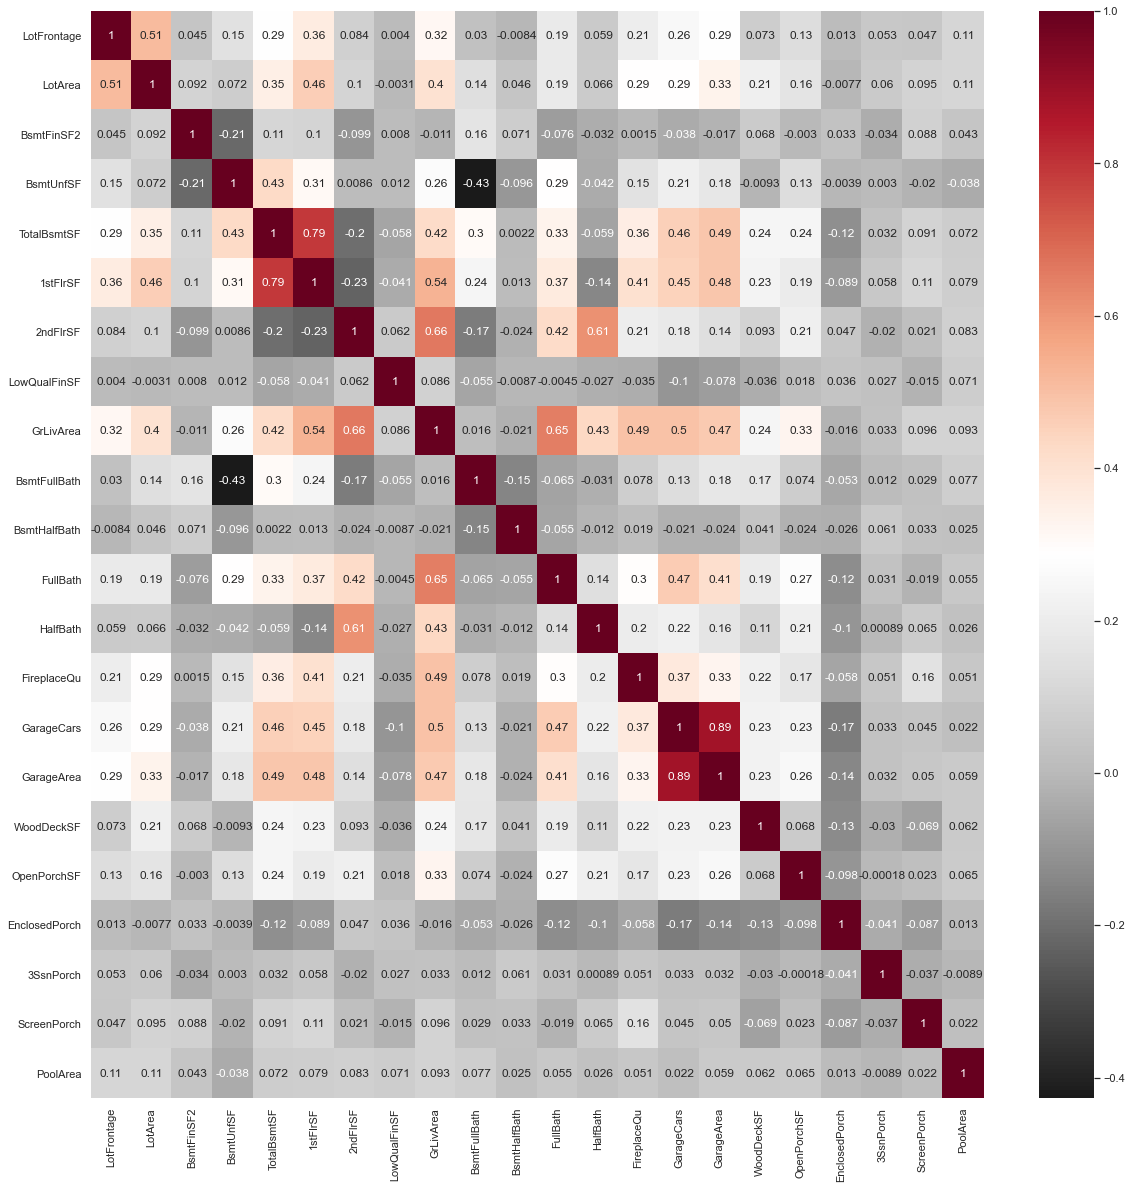

In [278]:
#check correlation between continuous features.
plt.figure(figsize=(20,20))

sns.heatmap(df_x[continuous_features].corr(),annot=True,cmap="RdGy_r")

In [279]:
# GarageArea and GarageCars both are 89% correlated with each other so can drop one.

df_x = df_x.drop("GarageArea",axis=1)
test = test.drop("GarageArea",axis=1)

In [280]:
#feature Selection by Lasso Rigression

In [281]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [282]:
selection = SelectFromModel(Lasso(max_iter=10000))
selection.fit(df_x,df_y)

SelectFromModel(estimator=Lasso(max_iter=10000))

In [283]:
#Important Feature Selected by Lasso Regression 
feature_name = df_x.columns[selection.get_support()]
feature_name

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=187)

In [284]:
#Apply Transformation on train Independent Datasets.

selection_df_x = selection.transform(df_x)
df_x = pd.DataFrame(selection_df_x,columns=feature_name)
df_x

MSSubClass  LotFrontage   LotArea    Street  LotShape  LandContour  \
0       0.073375    -0.175109 -0.222435  0.064238  0.701291     0.306146   
1      -0.872563     0.511378  0.047219  0.064238  0.701291     0.306146   
2       0.073375    -0.035866  0.401551  0.064238 -1.016637     0.306146   
3       0.309859    -0.409599  0.035919  0.064238 -1.016637     0.306146   
4       0.073375     0.690664  0.973576  0.064238 -1.016637     0.306146   
...          ...          ...       ...       ...       ...          ...   
1455    0.073375    -0.315427 -0.355067  0.064238  0.701291     0.306146   
1456   -0.872563     0.735261  0.776766  0.064238  0.701291     0.306146   
1457    0.309859    -0.128578 -0.080996  0.064238  0.701291     0.306146   
1458   -0.872563    -0.035866  0.073520  0.064238  0.701291     0.306146   
1459   -0.872563     0.285150  0.122454  0.064238  0.701291     0.306146   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.02618   0.225716     0.651479    -0.517200   1.050994      0.878668   
1       0.02618   0.225716    -0.071836     2.179628   0.156734     -0.429577   
2       0.02618   0.225716     0.651479    -0.517200   0.984752      0.830215   
3       0.02618   0.225716     0.651479    -0.517200  -1.863632     -0.720298   
4       0.02618   0.225716     1.374795    -0.517200   0.951632      0.733308   
...         ...        ...          ...          ...        ...           ...   
1455    0.02618   0.225716    -0.071836    -0.517200   0.918511      0.733308   
1456    0.02618   0.225716    -0.071836     0.381743   0.222975      0.151865   
1457    0.02618   0.225716     0.651479     3.078570  -1.002492      1.024029   
1458    0.02618   0.225716    -0.795151     0.381743  -0.704406      0.539493   
1459    0.02618   0.225716    -0.795151     0.381743  -0.207594     -0.962566   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       0.609517   1.052302  -0.238112  0.618960  0.117884     -0.590555   
1      -0.616388  -0.689604  -0.238112  0.618960  0.117884      2.220999   
2       0.396860   1.052302  -0.238112  0.618960  0.117884      0.346630   
3      -0.616388  -0.689604  -0.238112 -0.655627  1.929579     -0.590555   
4       1.572728   1.052302  -0.238112  0.618960  0.117884      1.283814   
...          ...        ...        ...       ...       ...           ...   
1455   -0.616388  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
1456    0.127911  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
1457   -0.616388   2.794208   2.611429 -0.655627  1.929579     -0.590555   
1458   -0.616388  -0.689604  -0.238112 -0.655627  0.117884      0.346630   
1459   -0.616388   1.052302  -0.238112 -0.655627  0.117884     -0.590555   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0         1.164712    0.612645     -0.277189   -0.288653  -0.958996   
1         0.690115    1.239654     -0.277189   -0.288653  -0.648385   
2         1.164712    0.105506     -0.277189   -0.288653  -0.300686   
3         0.690115   -0.516892     -0.277189   -0.288653  -0.054979   
4         1.164712    0.495081     -0.277189   -0.288653  -0.170878   
...            ...         ...           ...         ...        ...   
1455     -1.208270   -1.014810     -0.277189   -0.288653   0.902353   
1456      0.690115    0.806280      1.964896    0.722112   0.058603   
1457      1.164712   -0.380886     -0.277189   -0.288653   0.726185   
1458      1.164712   -0.901857      1.964896    6.092188  -1.306695   
1459      0.215519    0.898487      0.843853    1.509640  -0.991448   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0       -0.479580   0.891179    0.263813    0.279513 -0.812498  1.165918   
1        0.511973   0.891179    0.263813    0.279513  0.421130 -0.796591   
2       -0.323276   0.891179    0.263813    0.279513 -0.585331  1.193494   
3       -0.723805  -0.151386    0.263813    0.2795

In [285]:
#Similarly Apply Transformation on Test Datasets.

test = test[df_x.columns]
test

MSSubClass  LotFrontage   LotArea    Street  LotShape  LandContour  \
0      -0.872563     0.511378  0.476962  0.064238  0.701291     0.306146   
1      -0.872563     0.556337  0.974816  0.064238 -1.016637     0.306146   
2       0.073375     0.239607  0.896713  0.064238 -1.016637     0.306146   
3       0.073375     0.421178  0.131501  0.064238 -1.016637     0.306146   
4       1.492282    -1.233701 -1.199509  0.064238 -1.016637    -2.992544   
...          ...          ...       ...       ...       ...          ...   
1454    2.438219    -2.391790 -2.536334  0.064238  0.701291     0.306146   
1455    2.438219    -2.391790 -2.561759  0.064238  0.701291     0.306146   
1456   -0.872563     3.011151  1.886386  0.064238  0.701291     0.306146   
1457    0.664586    -0.315427  0.232113  0.064238  0.701291     0.306146   
1458    0.073375     0.239607  0.053306  0.064238  0.701291     0.306146   

      Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.02618   0.225716    -0.795151     0.381743  -0.340077     -1.156380   
1       0.02618   0.225716    -0.071836     0.381743  -0.439440     -1.301740   
2       0.02618   0.225716    -0.795151    -0.517200   0.852269      0.636400   
3       0.02618   0.225716    -0.071836     0.381743   0.885390      0.636400   
4       0.02618   0.225716     1.374795    -0.517200   0.686666      0.345679   
...         ...        ...          ...          ...        ...           ...   
1454    0.02618   0.225716    -1.518467     1.280685  -0.041991     -0.720298   
1455    0.02618   0.225716    -1.518467    -0.517200  -0.041991     -0.720298   
1456    0.02618   0.225716    -0.795151     1.280685  -0.373198      0.539493   
1457    0.02618   0.225716    -0.795151    -0.517200   0.686666      0.345679   
1458    0.02618  -3.395664     0.651479    -0.517200   0.719786      0.442586   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0      -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1       0.059110  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
2      -0.616388  -0.689604  -0.238112  0.618960  0.117884     -0.590555   
3      -0.491296  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
4      -0.616388   1.052302  -0.238112  0.618960  0.117884     -0.590555   
...          ...        ...        ...       ...       ...           ...   
1454   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1455   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1456   -0.616388  -0.689604  -0.238112 -0.655627  0.117884     -0.590555   
1457   -0.616388  -0.689604  -0.238112  0.618960  0.117884      1.283814   
1458   -0.028454  -0.689604  -0.238112  0.618960  0.117884      1.283814   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0        -0.259078    0.064013      0.843853    0.604293  -0.680837   
1         0.690115    1.112869     -0.277189   -0.288653  -0.365590   
2         1.164712    0.808585     -0.277189   -0.288653  -0.989130   
3         1.164712    0.372907     -0.277189   -0.288653  -0.555665   
4         0.690115   -0.408549     -0.277189   -0.288653   1.050704   
...            ...         ...           ...         ...        ...   
1454     -1.208270   -1.014810     -0.277189   -0.288653  -0.041071   
1455     -0.259078   -0.433905     -0.277189   -0.288653  -0.625205   
1456      0.690115    1.806727     -0.277189   -0.288653  -1.306695   
1457      1.164712   -0.237965     -0.277189   -0.288653   0.026151   
1458     -0.733674    0.732514     -0.277189   -0.288653  -0.755012   

      TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0       -0.416082  -1.193952    0.263813    0.279513 -0.668715 -0.796591   
1        0.675603  -1.193952    0.263813    0.279513  0.587507 -0.796591   
2       -0.303738  -0.151386    0.263813    0.279513 -0.557993  0.814321   
3       -0.308623   0.891179    0.263813    0.2795

# Model Building

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

In [287]:
x_train,x_valid,y_train,y_valid = train_test_split(df_x,df_y,test_size=0.25,random_state=5)

Apply Linear Regression

In [288]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_model.score(x_train,y_train)

0.9148559992062967

In [289]:
linear_prediction = linear_model.predict(x_valid)
r2_score(y_valid,linear_prediction)

-11599503457477.725

In [290]:
print("MAE:",mean_absolute_error(y_valid,linear_prediction))
print("MSE:",mean_squared_error(y_valid,linear_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,linear_prediction)))

MAE: 14023179062.373684
MSE: 7.1770442058679875e+22
RMSE: 267900059833.2891


Apply Lasso 

In [291]:
lasso_model = Lasso(max_iter=10000)
lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)

0.9148559228036099

In [292]:
# prediction on validation data
lasso_prediction = lasso_model.predict(x_valid)
r2_score(y_valid,lasso_prediction)

0.8841155980449198

In [293]:
print("MAE:",mean_absolute_error(y_valid,linear_prediction))
print("MSE:",mean_squared_error(y_valid,linear_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,linear_prediction)))

MAE: 14023179062.373684
MSE: 7.1770442058679875e+22
RMSE: 267900059833.2891


In [294]:
#Apply Randomized Searchcv on Lasso model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_lasso = RandomizedSearchCV(lasso_model,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=5,verbose=2)

rdm_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


RandomizedSearchCV(cv=5, estimator=Lasso(max_iter=10000), n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [295]:
rdm_lasso.best_estimator_

Lasso(alpha=700, max_iter=10000)

In [296]:
rdm_lasso.best_params_

{'alpha': 700}

In [297]:
rdm_lasso.best_score_

0.8218777349454027

In [298]:
# prediction on validation data
rdm_lasso_prediction = rdm_lasso.predict(x_valid)
r2_score(y_valid,rdm_lasso_prediction)

0.8852668418571803

In [299]:
print("MAE:",mean_absolute_error(y_valid,rdm_lasso_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_lasso_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_lasso_prediction)))

MAE: 17516.318584750916
MSE: 709896721.7764375
RMSE: 26643.88713713593


Apply Ridge 

In [300]:
ridge_model = Ridge()
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)

0.9148387238396892

In [301]:
# prediction on validation data
ridge_prediction = ridge_model.predict(x_valid)
r2_score(y_valid,ridge_prediction)

0.8837256792583306

In [302]:
print("MAE:",mean_absolute_error(y_valid,ridge_prediction))
print("MSE:",mean_squared_error(y_valid,ridge_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,ridge_prediction)))

MAE: 18349.813749972123
MSE: 719432467.9753348
RMSE: 26822.238310315093


In [303]:
#Apply Randomized Searchcv on Ridge model.

parameters = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000,500000,1000000]}

rdm_ridge = RandomizedSearchCV(ridge_model,param_distributions=parameters,n_iter=15,n_jobs=-1,cv=5,verbose=2)

rdm_ridge.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000, 500000,
                                                  1000000]},
                   verbose=2)

In [304]:
rdm_ridge.best_estimator_

Ridge(alpha=400)

In [305]:
rdm_ridge.best_params_

{'alpha': 400}

In [306]:
rdm_ridge.best_score_

0.8317026734644501

In [307]:
# prediction on validation data
rdm_ridge_prediction = rdm_ridge.predict(x_valid)
r2_score(y_valid,rdm_ridge_prediction)

0.8649549260028718

In [308]:
print("MAE:",mean_absolute_error(y_valid,rdm_ridge_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_ridge_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_ridge_prediction)))

MAE: 17988.52439895632
MSE: 835574099.7147595
RMSE: 28906.298616646847


Apply Gradient Boosting Regressor

In [309]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.9682698849117827

In [310]:
# prediction on validation data

gb_prediction = gb_model.predict(x_valid)
r2_score(y_valid,gb_prediction)

0.9203050272235203

In [311]:
print("MAE:",mean_absolute_error(y_valid,gb_prediction))
print("MSE:",mean_squared_error(y_valid,gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,gb_prediction)))

MAE: 15557.494893709358
MSE: 493102437.27153975
RMSE: 22205.909962700014


In [312]:
#Apply Randomized Searchcv on GB model.

parameters = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]
              ,"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8]}

rdm_gb = RandomizedSearchCV(gb_model,param_distributions=parameters,n_iter=80,n_jobs=-1,cv=10,verbose=2)

rdm_gb.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 11.3min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5, 0.6, 0.7],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              15, 18, 20, 22],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   verbose=2)

In [313]:
rdm_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=18,
                          n_estimators=600)

In [314]:
rdm_gb.best_params_

{'n_estimators': 600,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.05}

In [315]:
rdm_gb.best_score_

0.8573306575487468

In [316]:
#Prediction Validation Data

rdm_gb_prediction = rdm_gb.predict(x_valid)

In [317]:
# Validation Accuracy

r2_score(y_valid,rdm_gb_prediction)

0.9048089932504355

In [318]:
print("MAE:",mean_absolute_error(y_valid,rdm_gb_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_gb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_gb_prediction)))

MAE: 14741.37140834925
MSE: 588982162.8547543
RMSE: 24268.954712858038


In [319]:
import pickle

pickle_out = open("gb_new_lasso_model.pickle","wb")
pickle.dump(rdm_gb,pickle_out)
pickle_out.close

<function BufferedWriter.close>

Apply XGB Regressor

In [320]:
xgb_model  = XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.9997865943138452

In [321]:
#do Prediction on Test Dataset

xgb_prediction = xgb_model.predict(x_valid)
r2_score(y_valid,xgb_prediction)

0.8719736455985009

In [322]:
# Apply RandomizedSearchCV with XGB
param_dist = {"n_estimators":[100,200,300,400,500,600,700,800],"learning_rate":[0.001,0.01,0.1,0.3,0.5,0.7],
              "max_depth":[3,5,7,10,12,15],"gamma":[0.001,0.01,0.1,1,10],"reg_alpha":[0,1,10,50],
              "reg_lambda":[1,10,50,80,100,120,150]}

rdm_xgb = RandomizedSearchCV(xgb_model,param_distributions=param_dist,n_jobs=-1,n_iter=50,cv=10,verbose=5)
rdm_xgb.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.5min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_pa...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [323]:
rdm_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [324]:
rdm_xgb.best_params_

{'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.01}

In [325]:
rdm_xgb.best_score_

0.859466502556178

In [326]:
#Prediction Validation Data

rdm_xgb_prediction = rdm_xgb.predict(x_valid)

In [327]:
# Validation Accuracy

r2_score(y_valid,rdm_xgb_prediction)

0.8882284716717431

In [328]:
print("MAE:",mean_absolute_error(y_valid,rdm_xgb_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_xgb_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_xgb_prediction)))

MAE: 15439.0668557363
MSE: 691572016.6039679
RMSE: 26297.75687399912


Apply Decision Tree Regressor

In [329]:
dt_model  = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
dt_model.score(x_train,y_train)

1.0

In [330]:
#do Prediction on Test Dataset

dt_prediction = dt_model.predict(x_valid)
r2_score(y_valid,dt_prediction)

0.7895915338767463

In [331]:
print("MAE:",mean_absolute_error(y_valid,dt_prediction))
print("MSE:",mean_squared_error(y_valid,dt_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,dt_prediction)))

MAE: 25510.28493150685
MSE: 1301875436.471233
RMSE: 36081.51100593257


In [332]:
#Apply Randomized Searchcv on DecisionTree model.

parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

rdm_dt = RandomizedSearchCV(dt_model,param_distributions=parameters,n_iter=40,n_jobs=-1,cv=10,verbose=2)

rdm_dt.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.9s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 25]},
                   verbose=2)

In [333]:
rdm_dt.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=25, max_features='auto',
                      min_samples_leaf=7, min_samples_split=10)

In [334]:
rdm_dt.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 25,
 'criterion': 'mae'}

In [335]:
rdm_dt.best_score_

0.7328550234210774

In [336]:
#Prediction Validation Data

rdm_dt_prediction = rdm_dt.predict(x_valid)

In [337]:
# Validation Accuracy

r2_score(y_valid,rdm_dt_prediction)

0.7510195457146559

In [338]:
print("MAE:",mean_absolute_error(y_valid,rdm_dt_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_dt_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_dt_prediction)))

MAE: 23596.228767123288
MSE: 1540534673.189726
RMSE: 39249.645516739714


Apply RandomForest Regressor

In [339]:
rf_model  = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.9765174187035206

In [340]:
#do Prediction on Test Dataset

rf_prediction = rf_model.predict(x_valid)
r2_score(y_valid,rf_prediction)

0.8980295356578692

In [341]:
print("MAE:",mean_absolute_error(y_valid,rf_prediction))
print("MSE:",mean_squared_error(y_valid,rf_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rf_prediction)))

MAE: 16135.04783561644
MSE: 630929188.4425479
RMSE: 25118.30385281912


In [342]:
#Apply Randomized Searchcv on Random Forest model.

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

rdm_rf = RandomizedSearchCV(rf_model,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_rf.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 23.7min finished


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=2)

In [343]:
rdm_rf.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=10, max_features='sqrt',
                      min_samples_split=10, n_estimators=600)

In [344]:
rdm_rf.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'mae'}

In [345]:
rdm_rf.best_score_

0.8246965744862111

In [346]:
#Prediction Validation Data

rdm_rf_prediction = rdm_rf.predict(x_valid)

In [347]:
# Validation Accuracy.

r2_score(y_valid,rdm_rf_prediction)

0.8453159683739113

In [348]:
print("MAE:",mean_absolute_error(y_valid,rdm_rf_prediction))
print("MSE:",mean_squared_error(y_valid,rdm_rf_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,rdm_rf_prediction)))

MAE: 16887.20338584475
MSE: 957087634.821593
RMSE: 30936.832979825085


Apply KNN Regressor

In [349]:
knn_model  = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.8192220655793668

In [350]:
#do Prediction on Test Dataset.

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.6694133355155194

In [351]:
print("MAE:",mean_absolute_error(y_valid,knn_prediction))
print("MSE:",mean_squared_error(y_valid,knn_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,knn_prediction)))

MAE: 26158.53095890411
MSE: 2045462647.2358358
RMSE: 45226.791255138094


In [352]:
rmse_val = []

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_valid)
    error = sqrt(mean_squared_error(y_valid,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

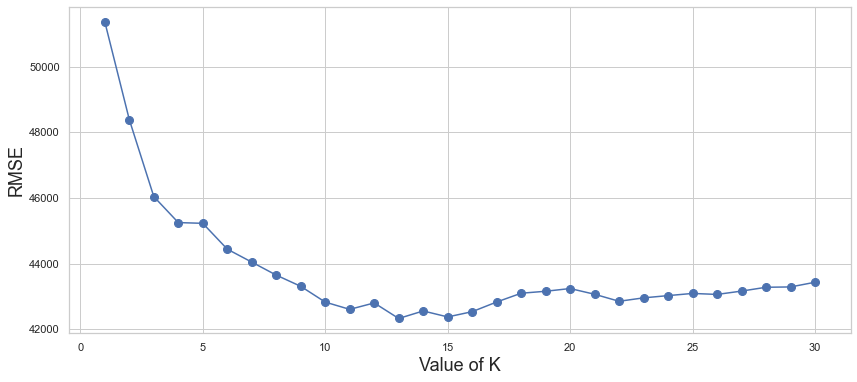

In [358]:
plt.figure(figsize=(14,6))
plt.plot(range(1,31),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

at n=10, rmse is very less so try n_neighbors=10 

In [354]:
knn_model  = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.7853984090385716

In [355]:
#do Prediction on Test Dataset

knn_prediction = knn_model.predict(x_valid)
r2_score(y_valid,knn_prediction)

0.7035879395211915

In [356]:
print("MAE:",mean_absolute_error(y_valid,knn_prediction))
print("MSE:",mean_squared_error(y_valid,knn_prediction))
print("RMSE:",sqrt(mean_squared_error(y_valid,knn_prediction)))

MAE: 24849.81205479452
MSE: 1834011661.7985203
RMSE: 42825.36236622546


# Conclusion

after using eight M/L algorithm it's clear that Gradient Boosting giving the best accuracy so use it to predict the test data.

# New Future Prediction

Prediction Test Dataset

In [359]:
test_prediction = rdm_gb.predict(test)

In [360]:
pred = pd.DataFrame(test_prediction)
sub_df = pd.read_csv("sample_submission.csv")
datasets=pd.concat([sub_df["Id"],pred],axis=1)
datasets.columns=["Id","SalePrice"]
datasets.to_csv("House_price_output_rdm_xgb.csv",index=False)